In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math

## Carregar Dataset e Setup

In [2]:
# Carregar dataset
df = pd.read_csv("Data/group_22.csv")

# Mostrar tipo de dados para cada coluna
print("Tipos de dados por coluna:\n")
for col, dtype in df.dtypes.items():
    print(f"{col}: {dtype}")

Tipos de dados por coluna:

duration_1: float64
duration_2: float64
duration_3: float64
duration_4: float64
duration_5: float64
loudness_level: float64
popularity_level: float64
tempo_class: float64
time_signature: float64
key_mode: float64
artist_song_count: float64
album_freq: float64
movement_index: float64
intensity_level: float64
verbal_density: float64
purity_score: float64
positivity_index: float64
activity_rate: float64
loudness_intensity: float64
happy_dance: float64
acoustics_instrumental: float64
artists_avg_popularity: float64
tempo_vs_genre: float64
energy_rank_pct: float64
loud_energy_ratio: float64
mood_pca: float64
mood_cluster: float64
acoustic_valence_mood_cluster: float64
explicit: float64
signal_strength: float64
mode_indicator: float64
focus_factor: object
ambient_level: float64
key_sin: float64
key_cos: float64
duration_log: float64
duration_log_z: float64
time_signature_class_boolean: float64
loudness_yeo: float64
is_instrumental: float64
is_dance_hit: float64
te

Após verificar o ``conjunto de tipo de dados obtidos``, observou-se que as variáveis ``"focus_factor"`` e ``"target_class"`` eram do tipo ``object``. 
Com o objetivo de ``alargar o conjunto de dados utilizados``, foi então possível observar que, para a variável ``"focus_factor"``, existiam dados mal formatados no dataset, possuindo ``vírgulas`` em vez de ``pontos`` para referenciar as casas décimais.
Assim sendo, foi possível tratar essa coluna de dados, de modo a torná-los ``numéricos``.

In [3]:
# Substituir vírgulas por pontos e converter para float
df['focus_factor'] = df['focus_factor'].astype(str).str.replace(',', '.', regex=False)
df['focus_factor'] = df['focus_factor'].astype(float)

# Confirmar a conversão
print("focus_factor é do tipo:", df['focus_factor'].dtype)


focus_factor é do tipo: float64


In [4]:
df.info

<bound method DataFrame.info of       duration_1  duration_2  duration_3  duration_4  duration_5  \
0            0.0         0.0         1.0         0.0         0.0   
1            0.0         0.0         0.0         1.0         0.0   
2            0.0         0.0         1.0         0.0         0.0   
3            0.0         0.0         1.0         0.0         0.0   
4            0.0         0.0         1.0         0.0         0.0   
...          ...         ...         ...         ...         ...   
2995         0.0         0.0         1.0         0.0         0.0   
2996         0.0         0.0         1.0         0.0         0.0   
2997         1.0         0.0         0.0         0.0         0.0   
2998         1.0         0.0         0.0         0.0         0.0   
2999         0.0         1.0         0.0         0.0         0.0   

      loudness_level  popularity_level  tempo_class  time_signature  key_mode  \
0                1.0               0.0          1.0        0.221824 -1

In [5]:
cont_cols = [
    "duration_log_z", "loudness_yeo", "temp_zscore", "energy_rank_pct", "mood_pca",
    "artists_avg_popularity", "movement_index", "intensity_level", "verbal_density",
    "positivity_index", "signal_power", "tempo_vs_genre", "time_signature",
    "focus_factor", "mood_cluster", "acoustic_valence_mood_cluster", "key_mode"
]

cat_cols = [
    'duration_1', 'duration_2', 'duration_3', 'duration_4', 'duration_5',
    'loudness_level', 'popularity_level', 'tempo_class', 'explicit',
    'mode_indicator', 'time_signature_class_boolean', 'is_instrumental',
    'is_dance_hit', 'echo_constant', 'target_class'
]


# snapshot das colunas numéricas
num_df   = df.select_dtypes(include=[np.number]).copy()
num_cols = num_df.columns

#colunas alvo
targets   = ["target_class", "target_regression"]

# Dataframe para tendência central
central_tendency = pd.DataFrame(index=num_cols)

# DataFrame de para disperção
disp = pd.DataFrame(index=num_cols)

# 1. Análise Exploratória de Dados

``Objetivo.`` Resumir o dataset em três frentes:


## 1.1 Análise Descritiva

### 1.1.1 Tendência central
`média`, `mediana`, `moda` 

In [6]:
# media e mediana e moda por coluna
central_tendency["mean"] = df[num_cols].mean()
central_tendency["median"] = df[num_cols].median()
central_tendency["mode"] = df[num_cols].mode(dropna=True).iloc[0]
central_tendency


mean        median      mode
duration_1                     6.733333e-02  0.000000e+00  0.000000
duration_2                     1.713333e-01  0.000000e+00  0.000000
duration_3                     3.190000e-01  0.000000e+00  0.000000
duration_4                     4.263333e-01  0.000000e+00  0.000000
duration_5                     1.600000e-02  0.000000e+00  0.000000
loudness_level                 1.714000e+00  2.000000e+00  2.000000
popularity_level               2.043000e+00  2.000000e+00  3.000000
tempo_class                    1.018000e+00  1.000000e+00  1.000000
time_signature                 7.697062e-02  2.218242e-01  0.221824
key_mode                      -1.977656e-02 -7.678645e-02  0.485996
artist_song_count             -2.735772e-01 -5.031739e-01 -0.575306
album_freq                    -3.403051e-01 -4.722922e-01 -0.514901
movement_index                 3.130714e-01  3.958657e-01  0.243165
intensity_level                9.654626e-02  2.296426e-01 -0.044549
verbal_density                -1.780486e-01 -3.863749e-01 -0.499869
purity_score                  -1.173470e-01 -6.432883e-01 -0.908836
positivity_index              -2.348731e-01 -3.512535e-01 -1.049395
activity_rate                 -3.620668e-02 -4.993462e-03  0.095280
loudness_intensity             9.271961e-03  3.468726e-02 -1.305784
happy_dance                   -1.180952e-01 -2.883574e-01 -0.843663
acoustics_instrumental        -1.601900e-01 -3.060505e-01 -0.306318
artists_avg_popularity         3.527690e-01  4.588376e-01  0.293433
tempo_vs_genre                 9.118632e-17  3.859216e-02  0.144001
energy_rank_pct               -5.186829e-02  2.680147e-02  0.026801
loud_energy_ratio             -9.135624e-03 -9.339154e-03 -0.009422
mood_pca                      -1.097981e-01 -1.128173e-01 -0.339210
mood_cluster                   4.953127e-02 -1.077846e-01 -0.775793
acoustic_valence_mood_cluster -8.625562e-03  6.651210e-02 -1.581244
explicit                       5.400000e-02  0.000000e+00  0.000000
signal_strength                6.329856e-01  6.900000e-01  0.690000
mode_indicator                 6.460000e-01  1.000000e+00  1.000000
focus_factor                   2.079242e-01  8.525000e-04  0.000000
ambient_level                  1.744735e-01  1.195000e-01  0.111000
key_sin                       -2.323056e-02  0.000000e+00  0.500000
key_cos                        5.118739e-02  6.123234e-17  0.500000
duration_log                   1.487715e+00  1.474095e+00  1.427984
duration_log_z                -1.249985e-01 -1.720102e-01 -0.331171
time_signature_class_boolean   9.846667e-01  1.000000e+00  1.000000
loudness_yeo                   2.258455e-02  4.041088e-02 -0.282183
is_instrumental                1.320000e-01  0.000000e+00  0.000000
is_dance_hit                   5.333333e-03  0.000000e+00  0.000000
temp_zscore                   -3.620652e-02 -4.993440e-03  0.095279
resonance_factor               1.331661e-02  2.648844e-02 -3.241267
timbre_index                   4.988853e-01  4.954867e-01  0.001081
echo_constant                  1.000000e+00  1.000000e+00  1.000000
distorted_movement             1.445523e-02  9.910771e-02  0.087583
signal_power                   6.329856e-01  6.900000e-01  0.690000
target_regression              3.125256e-01  4.824587e-01 -1.490205

### 1.1.2 Disperção

#### 1.1.2.1 Min e Max
  
Valores mínimo e máximo observados por coluna. Úteis para perceber limites mas sensíveis a outliers.


In [7]:
disp["min"]=df[num_cols].min()
disp["max"]=df[num_cols].max()
disp

min        max
duration_1                     0.000000   1.000000
duration_2                     0.000000   1.000000
duration_3                     0.000000   1.000000
duration_4                     0.000000   1.000000
duration_5                     0.000000   1.000000
loudness_level                 0.000000   4.000000
popularity_level               0.000000   4.000000
tempo_class                    0.000000   3.000000
time_signature                -6.712656   2.533318
key_mode                      -1.511882   1.611562
artist_song_count             -0.575306   2.742775
album_freq                    -0.514901   7.751164
movement_index                -2.919757   2.254205
intensity_level               -3.980059   2.543268
verbal_density                -0.581207   7.323660
purity_score                  -0.947020   2.042258
positivity_index              -1.733264   1.966883
activity_rate                 -2.278415   3.056569
loudness_intensity            -3.519257   4.701548
happy_dance                   -1.453257   2.945268
acoustics_instrumental        -0.306318   4.527130
artists_avg_popularity        -1.740774   2.710821
tempo_vs_genre                -2.272629   3.155343
energy_rank_pct               -1.715735   1.729682
loud_energy_ratio             -0.009502   0.012464
mood_pca                      -2.485740   2.111314
mood_cluster                  -1.443801   1.896240
acoustic_valence_mood_cluster -1.581244   1.714268
explicit                       0.000000   1.000000
signal_strength                0.011900   0.999000
mode_indicator                 0.000000   1.000000
focus_factor                   0.000000   0.983000
ambient_level                  0.018200   0.981000
key_sin                       -1.000000   1.000000
key_cos                       -1.000000   1.000000
duration_log                   0.584643   2.632358
duration_log_z                -3.242104   3.825925
time_signature_class_boolean   0.000000   1.000000
loudness_yeo                  -2.688960  28.711253
is_instrumental                0.000000   1.000000
is_dance_hit                   0.000000   1.000000
temp_zscore                   -2.278405   3.056555
resonance_factor              -3.241267   3.852731
timbre_index                   0.001081   0.999666
echo_constant                  1.000000   1.000000
distorted_movement            -3.266071   2.352164
signal_power                   0.011900   0.999000
target_regression             -1.490205   2.544789

#### 1.1.2.2 Amplitude

Amplitude total dos dados. Muito simples e muito sensível a outliers. `Amplitude = max - min` 


In [8]:
disp["range"]= disp["max"] - disp["min"]
disp

min        max      range
duration_1                     0.000000   1.000000   1.000000
duration_2                     0.000000   1.000000   1.000000
duration_3                     0.000000   1.000000   1.000000
duration_4                     0.000000   1.000000   1.000000
duration_5                     0.000000   1.000000   1.000000
loudness_level                 0.000000   4.000000   4.000000
popularity_level               0.000000   4.000000   4.000000
tempo_class                    0.000000   3.000000   3.000000
time_signature                -6.712656   2.533318   9.245973
key_mode                      -1.511882   1.611562   3.123444
artist_song_count             -0.575306   2.742775   3.318081
album_freq                    -0.514901   7.751164   8.266065
movement_index                -2.919757   2.254205   5.173962
intensity_level               -3.980059   2.543268   6.523327
verbal_density                -0.581207   7.323660   7.904866
purity_score                  -0.947020   2.042258   2.989277
positivity_index              -1.733264   1.966883   3.700148
activity_rate                 -2.278415   3.056569   5.334984
loudness_intensity            -3.519257   4.701548   8.220805
happy_dance                   -1.453257   2.945268   4.398525
acoustics_instrumental        -0.306318   4.527130   4.833448
artists_avg_popularity        -1.740774   2.710821   4.451595
tempo_vs_genre                -2.272629   3.155343   5.427972
energy_rank_pct               -1.715735   1.729682   3.445417
loud_energy_ratio             -0.009502   0.012464   0.021966
mood_pca                      -2.485740   2.111314   4.597054
mood_cluster                  -1.443801   1.896240   3.340041
acoustic_valence_mood_cluster -1.581244   1.714268   3.295511
explicit                       0.000000   1.000000   1.000000
signal_strength                0.011900   0.999000   0.987100
mode_indicator                 0.000000   1.000000   1.000000
focus_factor                   0.000000   0.983000   0.983000
ambient_level                  0.018200   0.981000   0.962800
key_sin                       -1.000000   1.000000   2.000000
key_cos                       -1.000000   1.000000   2.000000
duration_log                   0.584643   2.632358   2.047715
duration_log_z                -3.242104   3.825925   7.068029
time_signature_class_boolean   0.000000   1.000000   1.000000
loudness_yeo                  -2.688960  28.711253  31.400213
is_instrumental                0.000000   1.000000   1.000000
is_dance_hit                   0.000000   1.000000   1.000000
temp_zscore                   -2.278405   3.056555   5.334961
resonance_factor              -3.241267   3.852731   7.093999
timbre_index                   0.001081   0.999666   0.998585
echo_constant                  1.000000   1.000000   0.000000
distorted_movement            -3.266071   2.352164   5.618234
signal_power                   0.011900   0.999000   0.987100
target_regression             -1.490205   2.544789   4.034995

#### 1.1.2.3 Variancia

Média do quadrado dos desvios à média; mede dispersão em unidades ao quadrado.  

Exemplo  
Dados: [2, 4, 4, 4, 5, 5, 7, 9]

Média \\(\bar{x}=5\\).  
Desvios: \\([-3,-1,-1,-1,0,0,2,4]\\).  
Quadrados: \\([9,1,1,1,0,0,4,16]\\). Soma \\(=32\\).

``Variância amostral:`` \\(\frac{32}{7}\approx 4.5714\\) (correção de Bessel \\({N-1})\\)

In [9]:
disp["variance"]= df[num_cols].var()
disp

min        max      range      variance
duration_1                     0.000000   1.000000   1.000000  6.282050e-02
duration_2                     0.000000   1.000000   1.000000  1.420256e-01
duration_3                     0.000000   1.000000   1.000000  2.173114e-01
duration_4                     0.000000   1.000000   1.000000  2.446548e-01
duration_5                     0.000000   1.000000   1.000000  1.574925e-02
loudness_level                 0.000000   4.000000   4.000000  1.816143e+00
popularity_level               0.000000   4.000000   4.000000  9.534688e-01
tempo_class                    0.000000   3.000000   3.000000  6.102968e-02
time_signature                -6.712656   2.533318   9.245973  6.132580e-01
key_mode                      -1.511882   1.611562   3.123444  1.010088e+00
artist_song_count             -0.575306   2.742775   3.318081  4.927999e-01
album_freq                    -0.514901   7.751164   8.266065  1.988749e-01
movement_index                -2.919757   2.254205   5.173962  6.908957e-01
intensity_level               -3.980059   2.543268   6.523327  4.450210e-01
verbal_density                -0.581207   7.323660   7.904866  4.273905e-01
purity_score                  -0.947020   2.042258   2.989277  9.615258e-01
positivity_index              -1.733264   1.966883   3.700148  8.319179e-01
activity_rate                 -2.278415   3.056569   5.334984  6.374159e-01
loudness_intensity            -3.519257   4.701548   8.220805  6.711724e-01
happy_dance                   -1.453257   2.945268   4.398525  8.051638e-01
acoustics_instrumental        -0.306318   4.527130   4.833448  3.318813e-01
artists_avg_popularity        -1.740774   2.710821   4.451595  6.038032e-01
tempo_vs_genre                -2.272629   3.155343   5.427972  6.929566e-01
energy_rank_pct               -1.715735   1.729682   3.445417  8.905641e-01
loud_energy_ratio             -0.009502   0.012464   0.021966  5.247306e-07
mood_pca                      -2.485740   2.111314   4.597054  7.863561e-01
mood_cluster                  -1.443801   1.896240   3.340041  9.716835e-01
acoustic_valence_mood_cluster -1.581244   1.714268   3.295511  1.103786e+00
explicit                       0.000000   1.000000   1.000000  5.110103e-02
signal_strength                0.011900   0.999000   0.987100  5.769754e-02
mode_indicator                 0.000000   1.000000   1.000000  2.287603e-01
focus_factor                   0.000000   0.983000   0.983000  1.093215e-01
ambient_level                  0.018200   0.981000   0.962800  1.937587e-02
key_sin                       -1.000000   1.000000   2.000000  4.421077e-01
key_cos                       -1.000000   1.000000   2.000000  5.550649e-01
duration_log                   0.584643   2.632358   2.047715  5.689166e-02
duration_log_z                -3.242104   3.825925   7.068029  6.778074e-01
time_signature_class_boolean   0.000000   1.000000   1.000000  1.510326e-02
loudness_yeo                  -2.688960  28.711253  31.400213  9.185216e-01
is_instrumental                0.000000   1.000000   1.000000  1.146142e-01
is_dance_hit                   0.000000   1.000000   1.000000  5.306658e-03
temp_zscore                   -2.278405   3.056555   5.334961  6.374103e-01
resonance_factor              -3.241267   3.852731   7.093999  9.666655e-01
timbre_index                   0.001081   0.999666   0.998585  8.227914e-02
echo_constant                  1.000000   1.000000   0.000000  0.000000e+00
distorted_movement            -3.266071   2.352164   5.618234  9.727766e-01
signal_power                   0.011900   0.999000   0.987100  5.769754e-02
target_regression             -1.490205   2.544789   4.034995  5.964178e-01

#### 1.1.2.4 Desvio-Padrão

Mede a disperção média da média do dados.
Raiz quadrada da variância volta às mesmas unidades da variável.

Dados: `[2, 4, 4, 4, 5, 5, 7, 9]`  
Média \\(\bar{x}=5\\). Quadrados dos desvios somam ``32``.
- ``Variância amostral:`` \\(32/7 \approx 4{,}5714\\)  
- ``Desvio-padrão amostral:`` \\(\sqrt{4{,}5714}\approx 2{,}138\\)


In [10]:
disp["std"]= df[num_cols].std()
disp

min        max      range      variance  \
duration_1                     0.000000   1.000000   1.000000  6.282050e-02   
duration_2                     0.000000   1.000000   1.000000  1.420256e-01   
duration_3                     0.000000   1.000000   1.000000  2.173114e-01   
duration_4                     0.000000   1.000000   1.000000  2.446548e-01   
duration_5                     0.000000   1.000000   1.000000  1.574925e-02   
loudness_level                 0.000000   4.000000   4.000000  1.816143e+00   
popularity_level               0.000000   4.000000   4.000000  9.534688e-01   
tempo_class                    0.000000   3.000000   3.000000  6.102968e-02   
time_signature                -6.712656   2.533318   9.245973  6.132580e-01   
key_mode                      -1.511882   1.611562   3.123444  1.010088e+00   
artist_song_count             -0.575306   2.742775   3.318081  4.927999e-01   
album_freq                    -0.514901   7.751164   8.266065  1.988749e-01   
movement_index                -2.919757   2.254205   5.173962  6.908957e-01   
intensity_level               -3.980059   2.543268   6.523327  4.450210e-01   
verbal_density                -0.581207   7.323660   7.904866  4.273905e-01   
purity_score                  -0.947020   2.042258   2.989277  9.615258e-01   
positivity_index              -1.733264   1.966883   3.700148  8.319179e-01   
activity_rate                 -2.278415   3.056569   5.334984  6.374159e-01   
loudness_intensity            -3.519257   4.701548   8.220805  6.711724e-01   
happy_dance                   -1.453257   2.945268   4.398525  8.051638e-01   
acoustics_instrumental        -0.306318   4.527130   4.833448  3.318813e-01   
artists_avg_popularity        -1.740774   2.710821   4.451595  6.038032e-01   
tempo_vs_genre                -2.272629   3.155343   5.427972  6.929566e-01   
energy_rank_pct               -1.715735   1.729682   3.445417  8.905641e-01   
loud_energy_ratio             -0.009502   0.012464   0.021966  5.247306e-07   
mood_pca                      -2.485740   2.111314   4.597054  7.863561e-01   
mood_cluster                  -1.443801   1.896240   3.340041  9.716835e-01   
acoustic_valence_mood_cluster -1.581244   1.714268   3.295511  1.103786e+00   
explicit                       0.000000   1.000000   1.000000  5.110103e-02   
signal_strength                0.011900   0.999000   0.987100  5.769754e-02   
mode_indicator                 0.000000   1.000000   1.000000  2.287603e-01   
focus_factor                   0.000000   0.983000   0.983000  1.093215e-01   
ambient_level                  0.018200   0.981000   0.962800  1.937587e-02   
key_sin                       -1.000000   1.000000   2.000000  4.421077e-01   
key_cos                       -1.000000   1.000000   2.000000  5.550649e-01   
duration_log                   0.584643   2.632358   2.047715  5.689166e-02   
duration_log_z                -3.242104   3.825925   7.068029  6.778074e-01   
time_signature_class_boolean   0.000000   1.000000   1.000000  1.510326e-02   
loudness_yeo                  -2.688960  28.711253  31.400213  9.185216e-01   
is_instrumental                0.000000   1.000000   1.000000  1.146142e-01   
is_dance_hit                   0.000000   1.000000   1.000000  5.306658e-03   
temp_zscore                   -2.278405   3.056555   5.334961  6.374103e-01   
resonance_factor              -3.241267   3.852731   7.093999  9.666655e-01   
timbre_index                   0.001081   0.999666   0.998585  8.227914e-02   
echo_constant                  1.000000   1.000000   0.000000  0.000000e+00   
distorted_movement            -3.266071   2.352164   5.618234  9.727766e-01   
signal_power                   0.011900   0.999000   0.987100  5.769754e-02   
target_regression             -1.490205   2.544789   4.034995  5.964178e-01   

                                    std  
duration_1                     0.250640  
duration_2                     0.376863  
duration_3                     0.46616

#### 1.1.2.5 Quantis e Quartis

quantis dividem a distribuição em ``frações``.  
O quantil de ordem \\(p\\) (com \\(0 \le p \le 1\\)) é o valor abaixo do qual está ``p·100%`` dos dados.

- ``Mediana`` = quantil ``0.5`` (50.º percentil).
- ``Quartis:``  
  - \\(Q_1\\) = quantil ``0.25`` (25.º percentil)  
  - \\(Q_3\\) = quantil ``0.75`` (75.º percentil)

O intervalo entre \\(Q_1\\) e \\(Q_3\\) capta o “``miolo``” dos dados (50% central).

Os dados são colocados por ordem (do mais pequeno para o maior).  
No quantil 0.25 (25%), cerca de um quarto dos valores fica abaixo deste ponto.


In [11]:
disp["q1"]= df[num_cols].quantile(0.25)
disp["q2 (median)"]= df[num_cols].quantile(0.50)
disp["q3"] = df[num_cols].quantile(0.75)
disp

min        max      range      variance  \
duration_1                     0.000000   1.000000   1.000000  6.282050e-02   
duration_2                     0.000000   1.000000   1.000000  1.420256e-01   
duration_3                     0.000000   1.000000   1.000000  2.173114e-01   
duration_4                     0.000000   1.000000   1.000000  2.446548e-01   
duration_5                     0.000000   1.000000   1.000000  1.574925e-02   
loudness_level                 0.000000   4.000000   4.000000  1.816143e+00   
popularity_level               0.000000   4.000000   4.000000  9.534688e-01   
tempo_class                    0.000000   3.000000   3.000000  6.102968e-02   
time_signature                -6.712656   2.533318   9.245973  6.132580e-01   
key_mode                      -1.511882   1.611562   3.123444  1.010088e+00   
artist_song_count             -0.575306   2.742775   3.318081  4.927999e-01   
album_freq                    -0.514901   7.751164   8.266065  1.988749e-01   
movement_index                -2.919757   2.254205   5.173962  6.908957e-01   
intensity_level               -3.980059   2.543268   6.523327  4.450210e-01   
verbal_density                -0.581207   7.323660   7.904866  4.273905e-01   
purity_score                  -0.947020   2.042258   2.989277  9.615258e-01   
positivity_index              -1.733264   1.966883   3.700148  8.319179e-01   
activity_rate                 -2.278415   3.056569   5.334984  6.374159e-01   
loudness_intensity            -3.519257   4.701548   8.220805  6.711724e-01   
happy_dance                   -1.453257   2.945268   4.398525  8.051638e-01   
acoustics_instrumental        -0.306318   4.527130   4.833448  3.318813e-01   
artists_avg_popularity        -1.740774   2.710821   4.451595  6.038032e-01   
tempo_vs_genre                -2.272629   3.155343   5.427972  6.929566e-01   
energy_rank_pct               -1.715735   1.729682   3.445417  8.905641e-01   
loud_energy_ratio             -0.009502   0.012464   0.021966  5.247306e-07   
mood_pca                      -2.485740   2.111314   4.597054  7.863561e-01   
mood_cluster                  -1.443801   1.896240   3.340041  9.716835e-01   
acoustic_valence_mood_cluster -1.581244   1.714268   3.295511  1.103786e+00   
explicit                       0.000000   1.000000   1.000000  5.110103e-02   
signal_strength                0.011900   0.999000   0.987100  5.769754e-02   
mode_indicator                 0.000000   1.000000   1.000000  2.287603e-01   
focus_factor                   0.000000   0.983000   0.983000  1.093215e-01   
ambient_level                  0.018200   0.981000   0.962800  1.937587e-02   
key_sin                       -1.000000   1.000000   2.000000  4.421077e-01   
key_cos                       -1.000000   1.000000   2.000000  5.550649e-01   
duration_log                   0.584643   2.632358   2.047715  5.689166e-02   
duration_log_z                -3.242104   3.825925   7.068029  6.778074e-01   
time_signature_class_boolean   0.000000   1.000000   1.000000  1.510326e-02   
loudness_yeo                  -2.688960  28.711253  31.400213  9.185216e-01   
is_instrumental                0.000000   1.000000   1.000000  1.146142e-01   
is_dance_hit                   0.000000   1.000000   1.000000  5.306658e-03   
temp_zscore                   -2.278405   3.056555   5.334961  6.374103e-01   
resonance_factor              -3.241267   3.852731   7.093999  9.666655e-01   
timbre_index                   0.001081   0.999666   0.998585  8.227914e-02   
echo_constant                  1.000000   1.000000   0.000000  0.000000e+00   
distorted_movement            -3.266071   2.352164   5.618234  9.727766e-01   
signal_power                   0.011900   0.999000   0.987100  5.769754e-02   
target_regression             -1.490205   2.544789   4.034995  5.964178e-01   

                                    std        q1   q2 (median)        q3  
duration_1                     0.250640  0.000000  0.000000e+00  0.000000  
duration_2  

#### 1.1.2.6 Intervalo Interquartil (Quartil Range)

``Definição:`` \\( \mathrm{IQR} = Q_3 - Q_1 \\). Mede a ``largura do miolo central (50%)`` dos dados.  
É ``robusto a outliers`` (não depende de mínimos/máximos).

IQR ``grande`` ⇒ dados mais espalhados na parte central.
IQR ``pequeno`` ⇒ dados concentrados perto da mediana.

``Limites e Outliers:``
- Limite inferior: \\( \text{LI} = Q_1 - 1.5 \times \mathrm{IQR} \\)
- Limite superior: \\( \text{LS} = Q_3 + 1.5 \times \mathrm{IQR} \\)

Valores fora de \\([ \text{LI}, \text{LS} ]\\) são marcados como outliers.

In [12]:
# intervalo
disp["IQR"] = disp["q3"] - disp["q1"]

# limites
disp["LI"] = disp["q1"] - 1.5 ` disp["IQR"]   # limite inferior
disp["LS"] = disp["q3"] + 1.5 ` disp["IQR"]   # limite superior

# ouliers
mask_lower = num_df.lt(disp["LI"], axis=1)  # cada coluna compara com o seu LI
mask_upper = num_df.gt(disp["LS"], axis=1)  # idem para LS
disp["outlier %"] = (mask_lower | mask_upper).mean(axis=0) ` 100  # % por coluna
disp

min        max      range      variance  \
duration_1                     0.000000   1.000000   1.000000  6.282050e-02   
duration_2                     0.000000   1.000000   1.000000  1.420256e-01   
duration_3                     0.000000   1.000000   1.000000  2.173114e-01   
duration_4                     0.000000   1.000000   1.000000  2.446548e-01   
duration_5                     0.000000   1.000000   1.000000  1.574925e-02   
loudness_level                 0.000000   4.000000   4.000000  1.816143e+00   
popularity_level               0.000000   4.000000   4.000000  9.534688e-01   
tempo_class                    0.000000   3.000000   3.000000  6.102968e-02   
time_signature                -6.712656   2.533318   9.245973  6.132580e-01   
key_mode                      -1.511882   1.611562   3.123444  1.010088e+00   
artist_song_count             -0.575306   2.742775   3.318081  4.927999e-01   
album_freq                    -0.514901   7.751164   8.266065  1.988749e-01   
movement_index                -2.919757   2.254205   5.173962  6.908957e-01   
intensity_level               -3.980059   2.543268   6.523327  4.450210e-01   
verbal_density                -0.581207   7.323660   7.904866  4.273905e-01   
purity_score                  -0.947020   2.042258   2.989277  9.615258e-01   
positivity_index              -1.733264   1.966883   3.700148  8.319179e-01   
activity_rate                 -2.278415   3.056569   5.334984  6.374159e-01   
loudness_intensity            -3.519257   4.701548   8.220805  6.711724e-01   
happy_dance                   -1.453257   2.945268   4.398525  8.051638e-01   
acoustics_instrumental        -0.306318   4.527130   4.833448  3.318813e-01   
artists_avg_popularity        -1.740774   2.710821   4.451595  6.038032e-01   
tempo_vs_genre                -2.272629   3.155343   5.427972  6.929566e-01   
energy_rank_pct               -1.715735   1.729682   3.445417  8.905641e-01   
loud_energy_ratio             -0.009502   0.012464   0.021966  5.247306e-07   
mood_pca                      -2.485740   2.111314   4.597054  7.863561e-01   
mood_cluster                  -1.443801   1.896240   3.340041  9.716835e-01   
acoustic_valence_mood_cluster -1.581244   1.714268   3.295511  1.103786e+00   
explicit                       0.000000   1.000000   1.000000  5.110103e-02   
signal_strength                0.011900   0.999000   0.987100  5.769754e-02   
mode_indicator                 0.000000   1.000000   1.000000  2.287603e-01   
focus_factor                   0.000000   0.983000   0.983000  1.093215e-01   
ambient_level                  0.018200   0.981000   0.962800  1.937587e-02   
key_sin                       -1.000000   1.000000   2.000000  4.421077e-01   
key_cos                       -1.000000   1.000000   2.000000  5.550649e-01   
duration_log                   0.584643   2.632358   2.047715  5.689166e-02   
duration_log_z                -3.242104   3.825925   7.068029  6.778074e-01   
time_signature_class_boolean   0.000000   1.000000   1.000000  1.510326e-02   
loudness_yeo                  -2.688960  28.711253  31.400213  9.185216e-01   
is_instrumental                0.000000   1.000000   1.000000  1.146142e-01   
is_dance_hit                   0.000000   1.000000   1.000000  5.306658e-03   
temp_zscore                   -2.278405   3.056555   5.334961  6.374103e-01   
resonance_factor              -3.241267   3.852731   7.093999  9.666655e-01   
timbre_index                   0.001081   0.999666   0.998585  8.227914e-02   
echo_constant                  1.000000   1.000000   0.000000  0.000000e+00   
distorted_movement            -3.266071   2.352164   5.618234  9.727766e-01   
signal_power                   0.011900   0.999000   0.987100  5.769754e-02   
target_regression             -1.490205   2.544789   4.034995  5.964178e-01   

                                    std        q1   q2 (median)        q3  \
duration_1                     0.250640  0.000000  0.000000e+00  0.000000   
duration_2

#### 1.1.2.7 Função MAD (Median Absolute Deviation)
Dispersão robusta, útil por ser pouco influenciada por valores extremos (`median(|x − median(x)|)`)  
Boa alternativa ao desvio padrão quando a distribuição é assimétrica ou com outliers.

In [13]:
disp["MAD"]= (num_df - num_df.median()).abs().median() # ou num_df.sub(num_df.median(), axis=1).abs().median() com axis para ficar explicito
disp

min        max      range      variance  \
duration_1                     0.000000   1.000000   1.000000  6.282050e-02   
duration_2                     0.000000   1.000000   1.000000  1.420256e-01   
duration_3                     0.000000   1.000000   1.000000  2.173114e-01   
duration_4                     0.000000   1.000000   1.000000  2.446548e-01   
duration_5                     0.000000   1.000000   1.000000  1.574925e-02   
loudness_level                 0.000000   4.000000   4.000000  1.816143e+00   
popularity_level               0.000000   4.000000   4.000000  9.534688e-01   
tempo_class                    0.000000   3.000000   3.000000  6.102968e-02   
time_signature                -6.712656   2.533318   9.245973  6.132580e-01   
key_mode                      -1.511882   1.611562   3.123444  1.010088e+00   
artist_song_count             -0.575306   2.742775   3.318081  4.927999e-01   
album_freq                    -0.514901   7.751164   8.266065  1.988749e-01   
movement_index                -2.919757   2.254205   5.173962  6.908957e-01   
intensity_level               -3.980059   2.543268   6.523327  4.450210e-01   
verbal_density                -0.581207   7.323660   7.904866  4.273905e-01   
purity_score                  -0.947020   2.042258   2.989277  9.615258e-01   
positivity_index              -1.733264   1.966883   3.700148  8.319179e-01   
activity_rate                 -2.278415   3.056569   5.334984  6.374159e-01   
loudness_intensity            -3.519257   4.701548   8.220805  6.711724e-01   
happy_dance                   -1.453257   2.945268   4.398525  8.051638e-01   
acoustics_instrumental        -0.306318   4.527130   4.833448  3.318813e-01   
artists_avg_popularity        -1.740774   2.710821   4.451595  6.038032e-01   
tempo_vs_genre                -2.272629   3.155343   5.427972  6.929566e-01   
energy_rank_pct               -1.715735   1.729682   3.445417  8.905641e-01   
loud_energy_ratio             -0.009502   0.012464   0.021966  5.247306e-07   
mood_pca                      -2.485740   2.111314   4.597054  7.863561e-01   
mood_cluster                  -1.443801   1.896240   3.340041  9.716835e-01   
acoustic_valence_mood_cluster -1.581244   1.714268   3.295511  1.103786e+00   
explicit                       0.000000   1.000000   1.000000  5.110103e-02   
signal_strength                0.011900   0.999000   0.987100  5.769754e-02   
mode_indicator                 0.000000   1.000000   1.000000  2.287603e-01   
focus_factor                   0.000000   0.983000   0.983000  1.093215e-01   
ambient_level                  0.018200   0.981000   0.962800  1.937587e-02   
key_sin                       -1.000000   1.000000   2.000000  4.421077e-01   
key_cos                       -1.000000   1.000000   2.000000  5.550649e-01   
duration_log                   0.584643   2.632358   2.047715  5.689166e-02   
duration_log_z                -3.242104   3.825925   7.068029  6.778074e-01   
time_signature_class_boolean   0.000000   1.000000   1.000000  1.510326e-02   
loudness_yeo                  -2.688960  28.711253  31.400213  9.185216e-01   
is_instrumental                0.000000   1.000000   1.000000  1.146142e-01   
is_dance_hit                   0.000000   1.000000   1.000000  5.306658e-03   
temp_zscore                   -2.278405   3.056555   5.334961  6.374103e-01   
resonance_factor              -3.241267   3.852731   7.093999  9.666655e-01   
timbre_index                   0.001081   0.999666   0.998585  8.227914e-02   
echo_constant                  1.000000   1.000000   0.000000  0.000000e+00   
distorted_movement            -3.266071   2.352164   5.618234  9.727766e-01   
signal_power                   0.011900   0.999000   0.987100  5.769754e-02   
target_regression             -1.490205   2.544789   4.034995  5.964178e-01   

                                    std        q1   q2 (median)        q3  \
duration_1                     0.250640  0.000000  0.000000e+00  0.000000   
duration_2

#### 1.1.2.8 Coeficiente de Variação

\\( \mathrm{CV} = \dfrac{\text{desvio-padrão}}{|\text{média}|} \\).

Mede variabilidade relativa, sem unidades. Isto permite comparar colunas em escalas diferentes.

In [14]:
disp["CV"] = disp["std"] / num_df.mean().abs()
disp

min        max      range      variance  \
duration_1                     0.000000   1.000000   1.000000  6.282050e-02   
duration_2                     0.000000   1.000000   1.000000  1.420256e-01   
duration_3                     0.000000   1.000000   1.000000  2.173114e-01   
duration_4                     0.000000   1.000000   1.000000  2.446548e-01   
duration_5                     0.000000   1.000000   1.000000  1.574925e-02   
loudness_level                 0.000000   4.000000   4.000000  1.816143e+00   
popularity_level               0.000000   4.000000   4.000000  9.534688e-01   
tempo_class                    0.000000   3.000000   3.000000  6.102968e-02   
time_signature                -6.712656   2.533318   9.245973  6.132580e-01   
key_mode                      -1.511882   1.611562   3.123444  1.010088e+00   
artist_song_count             -0.575306   2.742775   3.318081  4.927999e-01   
album_freq                    -0.514901   7.751164   8.266065  1.988749e-01   
movement_index                -2.919757   2.254205   5.173962  6.908957e-01   
intensity_level               -3.980059   2.543268   6.523327  4.450210e-01   
verbal_density                -0.581207   7.323660   7.904866  4.273905e-01   
purity_score                  -0.947020   2.042258   2.989277  9.615258e-01   
positivity_index              -1.733264   1.966883   3.700148  8.319179e-01   
activity_rate                 -2.278415   3.056569   5.334984  6.374159e-01   
loudness_intensity            -3.519257   4.701548   8.220805  6.711724e-01   
happy_dance                   -1.453257   2.945268   4.398525  8.051638e-01   
acoustics_instrumental        -0.306318   4.527130   4.833448  3.318813e-01   
artists_avg_popularity        -1.740774   2.710821   4.451595  6.038032e-01   
tempo_vs_genre                -2.272629   3.155343   5.427972  6.929566e-01   
energy_rank_pct               -1.715735   1.729682   3.445417  8.905641e-01   
loud_energy_ratio             -0.009502   0.012464   0.021966  5.247306e-07   
mood_pca                      -2.485740   2.111314   4.597054  7.863561e-01   
mood_cluster                  -1.443801   1.896240   3.340041  9.716835e-01   
acoustic_valence_mood_cluster -1.581244   1.714268   3.295511  1.103786e+00   
explicit                       0.000000   1.000000   1.000000  5.110103e-02   
signal_strength                0.011900   0.999000   0.987100  5.769754e-02   
mode_indicator                 0.000000   1.000000   1.000000  2.287603e-01   
focus_factor                   0.000000   0.983000   0.983000  1.093215e-01   
ambient_level                  0.018200   0.981000   0.962800  1.937587e-02   
key_sin                       -1.000000   1.000000   2.000000  4.421077e-01   
key_cos                       -1.000000   1.000000   2.000000  5.550649e-01   
duration_log                   0.584643   2.632358   2.047715  5.689166e-02   
duration_log_z                -3.242104   3.825925   7.068029  6.778074e-01   
time_signature_class_boolean   0.000000   1.000000   1.000000  1.510326e-02   
loudness_yeo                  -2.688960  28.711253  31.400213  9.185216e-01   
is_instrumental                0.000000   1.000000   1.000000  1.146142e-01   
is_dance_hit                   0.000000   1.000000   1.000000  5.306658e-03   
temp_zscore                   -2.278405   3.056555   5.334961  6.374103e-01   
resonance_factor              -3.241267   3.852731   7.093999  9.666655e-01   
timbre_index                   0.001081   0.999666   0.998585  8.227914e-02   
echo_constant                  1.000000   1.000000   0.000000  0.000000e+00   
distorted_movement            -3.266071   2.352164   5.618234  9.727766e-01   
signal_power                   0.011900   0.999000   0.987100  5.769754e-02   
target_regression             -1.490205   2.544789   4.034995  5.964178e-01   

                                    std        q1   q2 (median)        q3  \
duration_1                     0.250640  0.000000  0.000000e+00  0.000000   
duration_2

## 1.2 Análise Univariate

Distribuição de cada variável de forma isolada:
- Numéricas: histograma + KDE, boxplot, quantis (Q1/Mediana/Q3).
- Categóricas: barras (Top-N) com contagens e percentagens.

Isto ajuda a detetar enviesamentos (skew), outliers, zeros estruturais, classes raras e necessidade de transformações/normalização.

### 1.2.1 Análise de colunas continuas

Para a análise de colunas continuas podemos usar Histogramas com KDE e Boxplot para visualizarmos o IQR e outliers.


In [15]:
def plot_univariate(df, col, bins=30, kde=True):
    s = df[col].copy()

    x = s.dropna().astype(float)

    # estatísticas
    count  = x.size
    mean   = x.mean()
    std    = x.std(ddof=1)
    q1, median, q3 = x.quantile([0.25,0.5,0.75])
    skew   = x.skew()
    kurt   = x.kurtosis()
    miss_p = 100 ` (1 - len(x)/len(s)) if len(s) else 0.0

    stats_txt = (
        f"count: {count}\n"
        f"mean: {mean:.3f}\n"
        f"std: {std:.3f}\n"
        f"Q1: {q1:.3f}\n"
        f"median: {median:.3f}\n"
        f"Q3: {q3:.3f}\n"
        f"skew: {skew:.2f}\n"
        f"kurt: {kurt:.2f}\n"
    )

    # figura
    fig, (ax1, ax2) = plt.subplots(
        2, 1, figsize=(9, 5.5), gridspec_kw={"height_ratios": [3, 1]}, sharex=False
    )

    # hist + KDE
    sns.histplot(x, bins=bins, kde=kde, ax=ax1)
    ax1.set(title=f"{col} — hist/KDE", ylabel="count")
    ax1.text(1.15, 0.98, stats_txt, transform=ax1.transAxes,
             ha="right", va="top", fontsize=9)

    # boxplot
    sns.boxplot(x=x, ax=ax2)
    ax2.set(title=f"{col} — boxplot", xlabel=col, ylabel="")

    plt.tight_layout()
    plt.show()


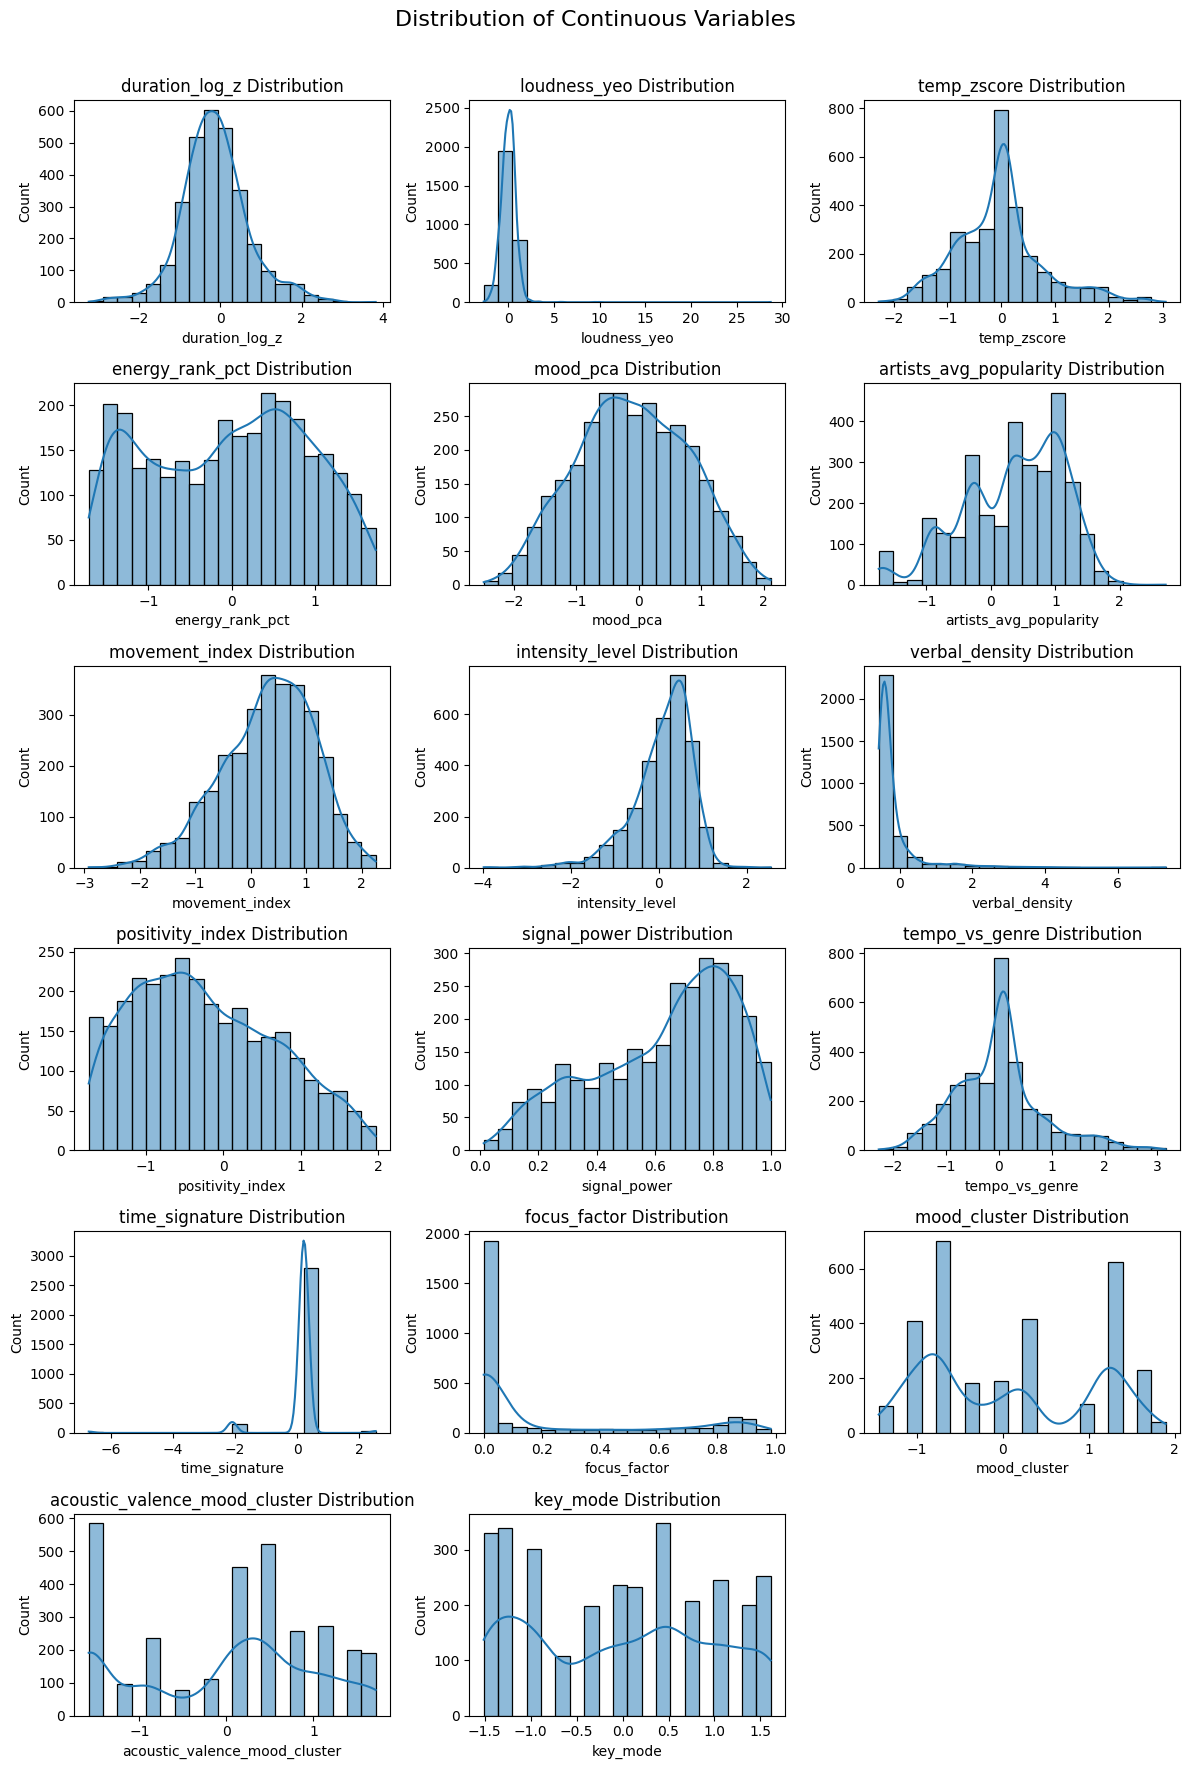

In [16]:
# Grid setup
n = len(cont_cols)
ncols = 3
nrows = math.ceil(n / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(4 ` ncols, 3 ` nrows))
fig.suptitle('Distribution of Continuous Variables', fontsize=16)

# Flatten axes
axes_flat = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

# Generate histograms
for i, col in enumerate(cont_cols):
    ax = axes_flat[i]
    sns.histplot(df[col], kde=True, bins=20, ax=ax)
    ax.set_title(f'{col} Distribution')

# Hide unused axes if any
for j in range(len(cont_cols), len(axes_flat)):
    axes_flat[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

#### 1.2.1.1 duration_log_z

Uma vez que a duração já em log e normalizada (z-score); espera-se forma ~normal.  
``Observar:`` simetria, caudas, outliers residuais.

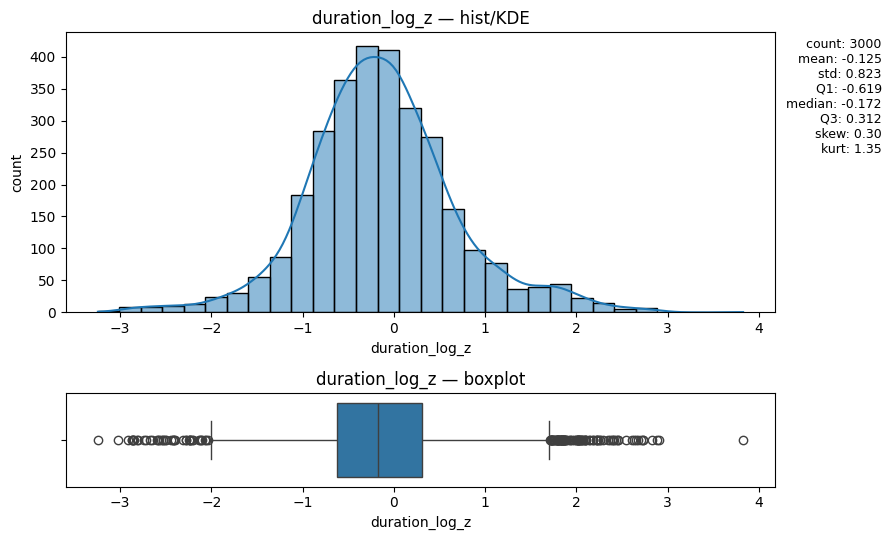

In [17]:
plot_univariate(df,"duration_log_z")

``skew`` (assimetria) de 0.30 mostra uma ligeira cauda à direita mas é praticamente simétrico.
``kurt`` (curtose) de 1.35 revela uma leptocúrtica moderada com caudas um ligeiramente mais pesadas que Normal (> 0).

``Média`` de -0.125 maior que a mediana mediana mais uma vez mostrando-se consistente com a leve assimetria à direita.

O ``histograma`` está muito próximo de forma normal.  
O ``Boxplot`` revela um numero considerável de outliers em ambas as caudas.

#### 1.2.1.2 loudness_yeo

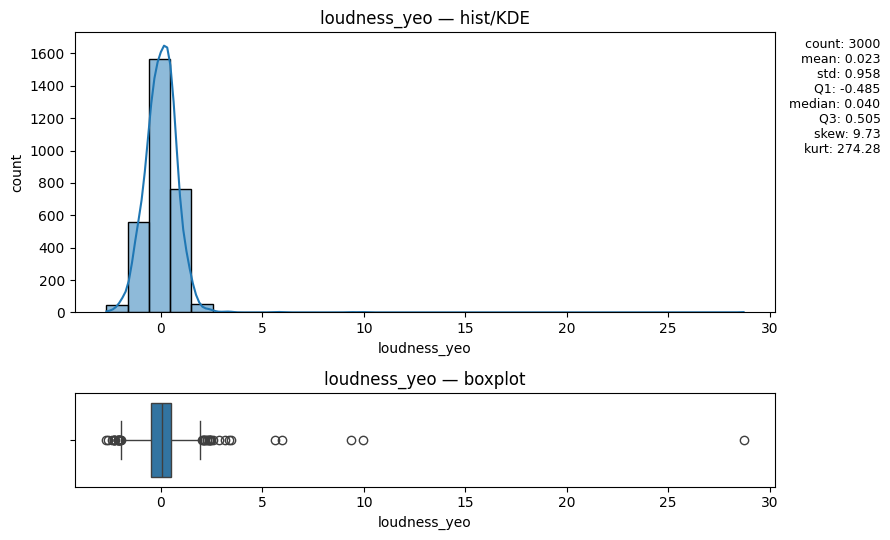

In [18]:
plot_univariate(df,"loudness_yeo")

``skew`` (assimetria)  9,7 indica forte cauda à direita.
``kurt`` (curtose) 274 indica caudas longas.

O ``histograma`` mostra que o miolo anda perto de 0, mas o eixo chega a ~30 por causa de outliers grandes.  
O ``boxplot`` confirma que há muitos pontos fora do intervalo interquartil, sobretudo à direita, confirmando assim o skew e o kurt.

#### 1.2.1.3 temp_zscore

`temp_zscore` é o tempo (BPM) normalizado:  
\\[
z = \frac{x - \text{média original}}{\text{desvio-padrão original}}
\\]
Depois desta conta, esperamos média ≈ 0 e desvio-padrão ≈ 1.

- O ``histograma`` espera-se estar centrado em 0 e sem caudas muito compridas.
- O ``boxplot`` não deve ter muitos pontos fora (outliers).
- A percentagem de valores extremos temos de analisar quantos têm |z| > 3 pois não é suposto estar muito longe do centro.

- A média deve andar perto de 0 e o desvio padrão perto de 1 (normalização).
- `skew` perto de 0 ou seja com uma distribuição simétrica.  
- Se `skew` estiver grande (>|1|) veremos uma cauda longa para um dos lados.
- ``|z| > 3``:  
  - ≤ ``1–2%`` → normal, ignoro.  
  - > ``2–3%`` → muitos extremos; considerar tratar.


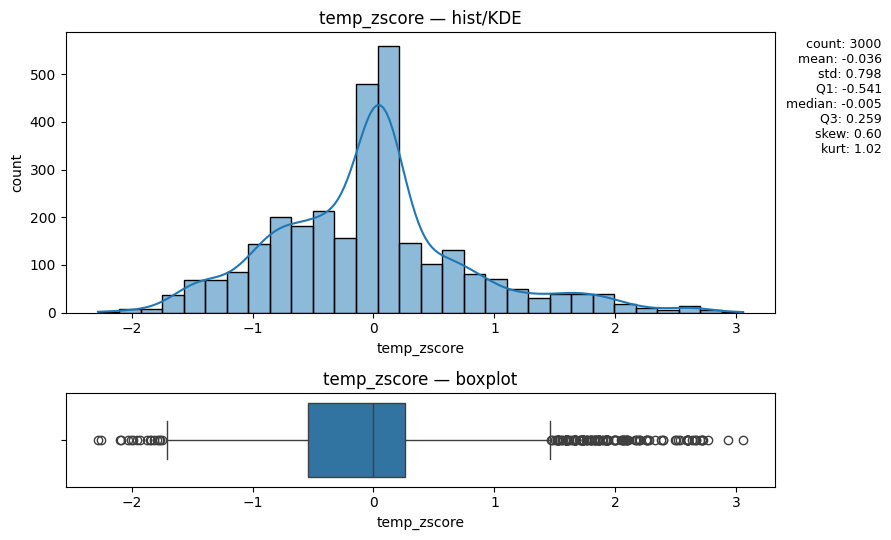

In [19]:
plot_univariate(df,"temp_zscore")

``Média`` ≈ −0,036, centrado muito perto de 0 (ok para z-score).  
``Std`` ≈ 0,798 (não exatamente 1), podemos considerar normal pode acontecer se o z-score foi calculado noutro conjunto (e aqui é um subconjunto), ou a diferença de definição (ddof=0 na normalização vs ddof=1 que o pandas usa para std amostral) ou até arredondamentos e transformações feitas à postriori.  
``Skew`` ≈ 0,60, ligeira cauda à direita.  
``Kurt`` ≈ 1,02, caudas mais pesadas do que a Normal o que revela alguns pontos extremos.  
``Boxplot`` confirma a existencia de outliers em ambas as caudas, mais pronunciados à direita.  

A distribuição está centrada próximo de 0 (mean −0,036) com std ≈ 0,80, o que é compatível com um z-score.
bserva-se uma assimetria moderada à direita (skew 0,60) e caudas algo pesadas (kurt 1,02), refletidas em alguns outliers no boxplot.  

#### 1.2.1.3 energy_rank_pct

É o percentil do nível de energia da faixa em relação a um conjunto de músicas.  
Valores ~0 indicam energia mediana, negativos = abaixo da média e positivos = acima da média.  

Nesta analise espera se verificar se a distribuição é proxima de 0, se há poucos outliers e se o IQR dá a variabilidade central.


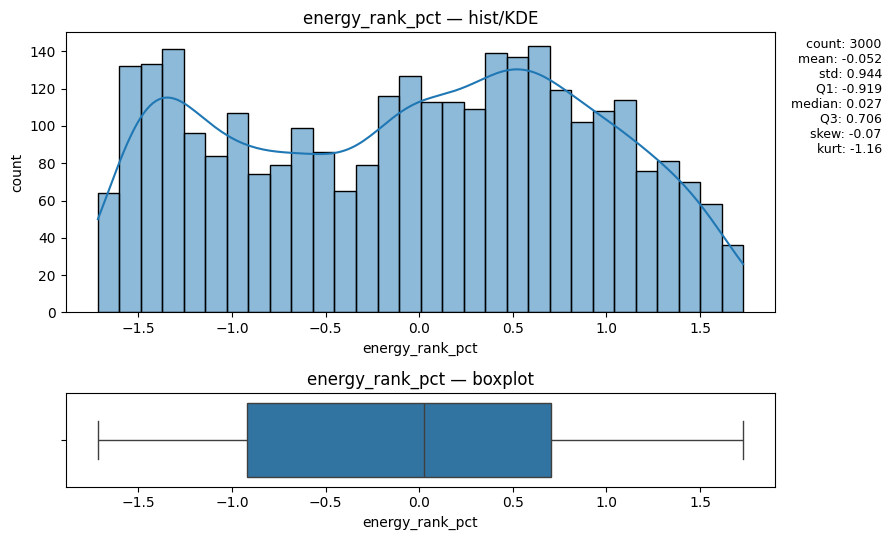

In [20]:
col = "energy_rank_pct"
plot_univariate(df,col)

A distribuição está próxima de simétrica (``skew`` ≈ −0,07) e apresenta kurtose negativa (``kurt`` ≈ −1,16), o que significa uma forma mais achatada e caudas mais leves do que a normal. O histograma sugere algo próximo de uniforme, sem picos acentuados. O boxplot mostra um ``IQR`` largo com uma variabilidade central elevada. As medidas centrais são coerentes com a ``média`` ≈ −0,05, o ``desvio-padrão`` ≈ 0,94, o ``Q1`` ≈ −0,92, a ``mediana`` ≈ 0,03 e o ``Q3`` ≈ 0,71.

Podemos então concluir que a a variável tem boa dispersão ao longo da faixa e não é dominada por extremos.
A uniformidade indica que os valores estão bem distribuídos e podem refletir diferentes perfis de energia sem concentração num intervalo estreito.
O facto de estar já centrada e escalada facilita o uso em modelos sensíveis à escala como regressões e SVM.

#### 1.2.1.5 mood_pca
Componente principal (PCA) que resume variação relacionada com “mood”. Por definição espera-se estar centrada (≈ média 0) e em escala contínua.
  
Espera-se que o ``Histogram`` seja aproximadamente simétrico se a projeção combinar vários fatores.  
É possível haver multimodalidade (picos múltiplos) se caso hajam subgrupos (géneros/estilos) distintos.  
O ``Boxplot`` pode ter alguns extremos, mas sem dominar a distribuição.

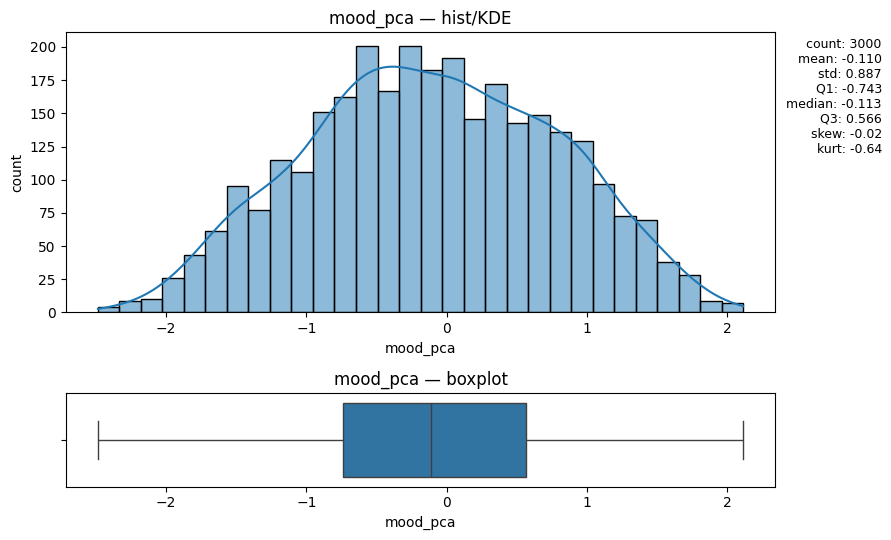

In [21]:
col = "mood_pca"
plot_univariate(df,col)

``Média`` ≈ −0,11, ``std`` ≈ 0,89, centrada perto de 0 revelando uma dispersão moderada.  
``Q1`` ≈ −0,743, ``Med`` ≈ −0,113, ``Q3`` ≈ 0,566, com ``IQR`` ≈ 1,309 (um miolo relativamente largo).  
``Skew`` ≈ −0,02, distribuição praticamente simétrica.  
``Kurt`` ≈ −0,64, um pouco mais “achatada” que a distribuição Normal com caudas ligeiramente leves.  
``Histograma`` com perfil unimodal.  
``Boxplot`` sem outliers e caudas equilibradas.

Com esta informação podemos ver que a projeção PCA captou uma dimensão de “estado de humor” com distribuição muito próxima de normal, sem assimetrias relevantes, com boa variabilidade no centro (IQR amplo) e ausência de extremos dominantes.

#### 1.2.1.6 artists_avg_popularity

Representa a popularidade média dos artistas da faixa. Espera-se ser assimétrica uma vez que por norma há muitos artistas pouco populares e poucos muito populares.

O ``Histograma`` vai ter muito provavelmente uma cauda à direita (skew>0).  
O ``Boxplot`` espera-se com alguns extremos altos.

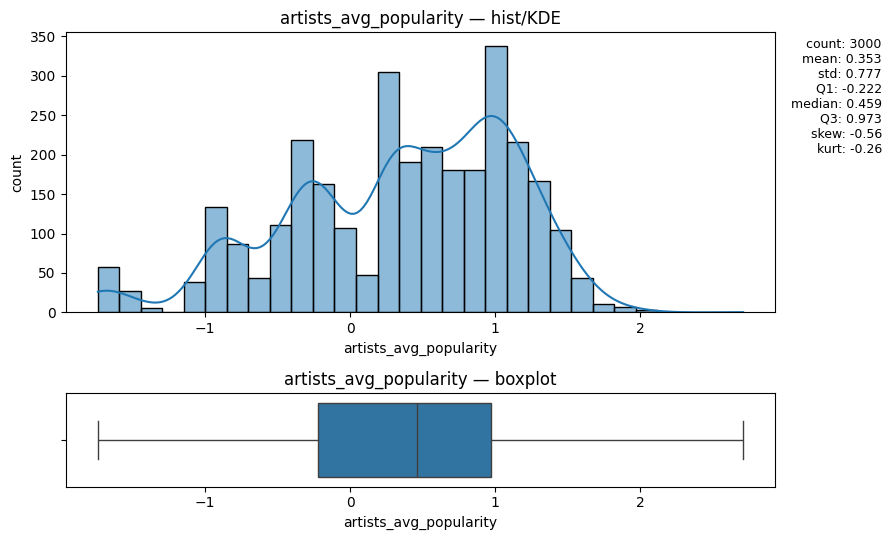

In [22]:
col = "artists_avg_popularity"
plot_univariate(df,col)

``mean`` = 0,353 < ``median`` = 0,459 revela coerencia com assimetria à esquerda.  
``skew`` ≈ −0,56, cauda mais longa para valores baixos revela artistas pouco populares.  
``kurt`` ≈ −0,26, ligeiramente achatada.  
``Q1`` = −0,222, ``Q3`` = 0,973 → ``IQR`` ≈ 1,195 (boa dispersão no miolo).  
``Boxplot``: alguns outliers em ambas as caudas, mais na esquerda.

A distribuição sugere muitos artistas com popularidade baixa e um grupo razoável com valores médios/altos; a densidade tem pequenas ondulações mostrando que pode haver subgrupos (género/época).

#### 1.2.1.7 movement_index

Feature derivada que mede a quantidade de mudança no padrão rítmico ao longo da faixa (maior = mais variação).

No ``Histograma`` espera se ver possivelmente uma cauda à direita uma vez que faixas com muita variação são menos comuns.  
No ``Boxplot`` espera-se evidenciar o IQR e eventuais extremos.

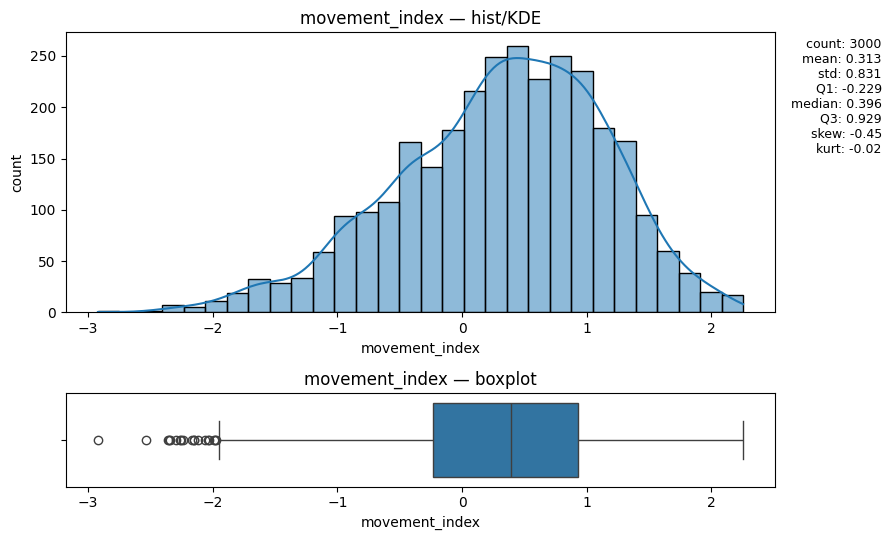

In [23]:
col="movement_index"
plot_univariate(df,col)

``mean`` = 0,313 > ``median`` = 0,396, são próximos mas com ligeira assimetria à esquerda que é confirmada pelo ``skew``≈ −0,45.  
``kurt`` ≈ −0,02, muito perto da distribuição Normal sem caudas pesadas nem leves.  
``Q1`` = −0,229, ``Q3`` = 0,929 → ``IQR`` ≈ 1,158 (boa dispersão central).  
``Boxplot``: vários outliers na cauda esquerda até cerca de −3, poucos na direita, até ≈ 2,3.  

Distribuição quase simétrica, com uma cauda à esquerda um pouco mais longa mostrando que há algumas faixas com pouca variação rítmica (valores negativos) e muitas com variação moderada/alta (miolo entre ~0 e ~1).

#### 1.2.1.8 intensity_level
  
Esta feature mede a intensidade/perceção de potência da faixa.  
É importante observar o ``Boxplot`` a mostrar IQR e eventuais extremos.  

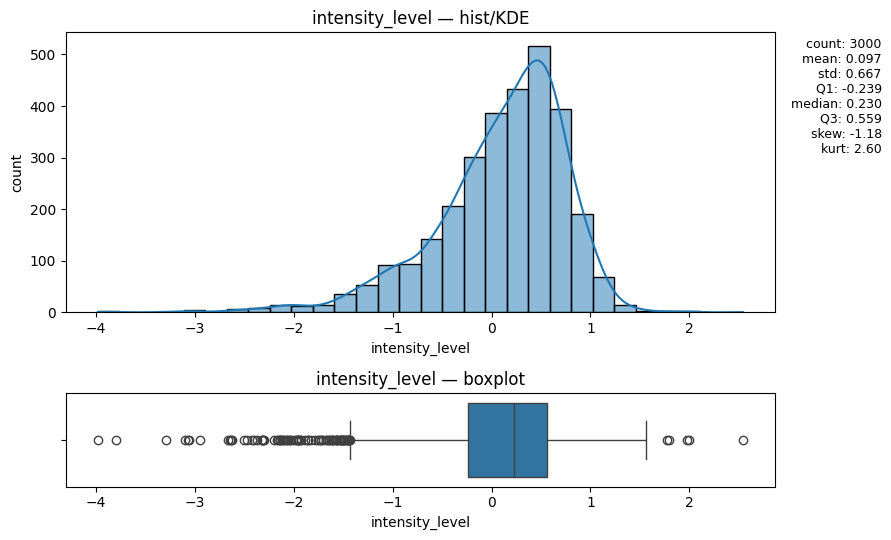

In [24]:
col = "intensity_level"
plot_univariate(df,col)

``mean`` 0,97 < ``median`` 0,230, consistente com assimetria à esquerda.  
``Assimetria``: ``skew`` ≈ −1,18 → cauda longa à esquerda (muitos valores baixos/extremos negativos).  
``Caudas``: ``kurt`` ≈ 2,60, leptocúrtica (caudas pesadas), sendo que há mais pontos muito afastados do centro.  
``IQR``: ``Q1`` −0,239, ``Q3`` 0,559, ``IQR`` ≈ 0,798 mostando uma dispersão moderada no miolo.  
``Boxplot``: muitos outliers à esquerda (até ~−4) e alguns à direita (até ~2,3).

#### 1.2.1.9 verbal_density

Densidade de vocais/letras na faixa  quanto maior, mais presença vocal.
Se existirem faixas instrumentais, pode haver massa em valores mais baixos/negativos.  



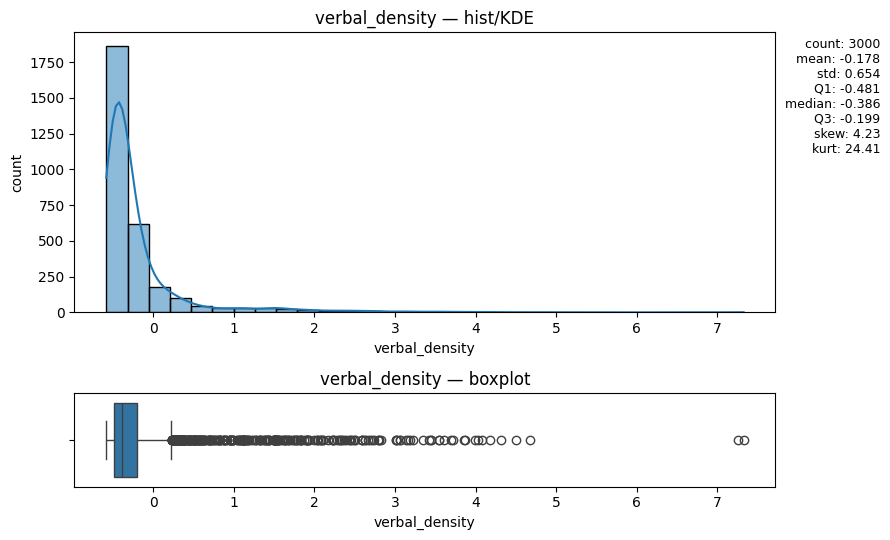

In [25]:
col = "verbal_density"
plot_univariate(df,col)

``Skew`` = 4,23, forte cauda à direita (poucas faixas com densidade vocal muito alta).  
``Kurt`` = 24,41, caudas extremamente pesadas (muitos pontos muito afastados do centro).  
``Mediana`` = −0,386, ``Q3`` = −0,199, mais de 75% dos valores são negativos, isto pode indicar que esta feature foi estandardizada.  
O ``histograma`` concentra-se perto de valores pequenos e negativos, com outliers enormes até ~7,5.  
O ``boxplot`` confirma uma enxurrada de outliers à direita.

A maior parte das faixas tem baixa presença vocal.  
Um subconjunto muito pequeno tem densidade vocal excecionalmente alta, puxando a média e a dispersão.  

#### 1.2.1.10 positivity_index

Medida contínua que representa uma valência emocional positiva (quão “feliz/positiva” soa a faixa).  
Espera-se próxima de centrada (pode já estar normalizada).

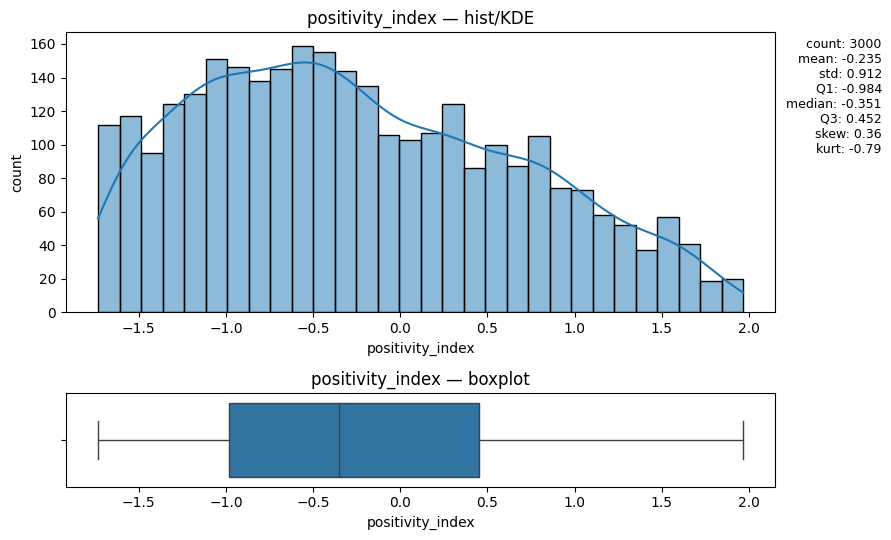

In [26]:
col = "positivity_index"
plot_univariate(df,col)

Distribuição com ``leve cauda à direita``: ``skew`` = 0,36 e ``kurtose negativa`` = −0,79, que indica uma forma achatada e caudas relativamente leves. O centro está ligeiramente abaixo de zero (``mean`` = −0,24 e ``median`` = −0,35) e o ``IQR`` é largo (~1,44), mostrando grande diversidade de valência emocional. 

#### 1.2.1.11 signal_power

Esta feature mede a potência do sinal de áudio. Em regra geral não deve ser negativa e tende a apresentar uma assimetria à direita (algumas faixas com potência muito alta).

Esperamos observar no Histograma uma cauda à direita mas com concentração perto de 0.

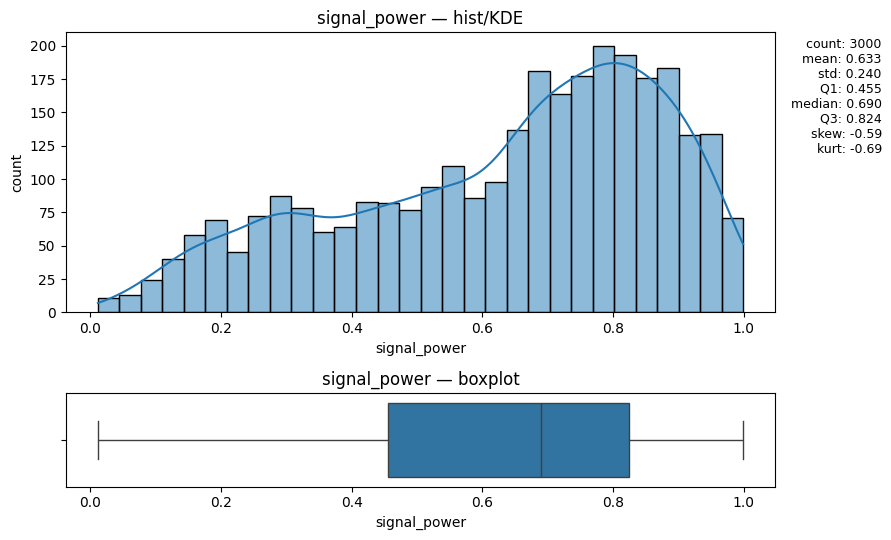

In [27]:
col = "signal_power"
plot_univariate(df,col)

Distribuição concentrada em valores médios/altos (``Med`` = 0,69 e ``IQR`` = ~0,37), com ``assimetria à esquerda`` moderada (``skew`` −0,59 e ``kurtose negativa`` = −0,69), o que indica uma forma achatada e caudas leves. Há poucas observações com potência muito baixa e quase não há extremos altos problemáticos.

#### 1.2.1.12 temp_vs_genre

Esta feature representa a relação entre tempo (BPM) e género/categoria é portanto uma feature derivada e contínua.  
Aqui pretendentos observar a forma geral (simétrica vs. cauda) o IQR (Q1–Q3) e outliers no boxplot.

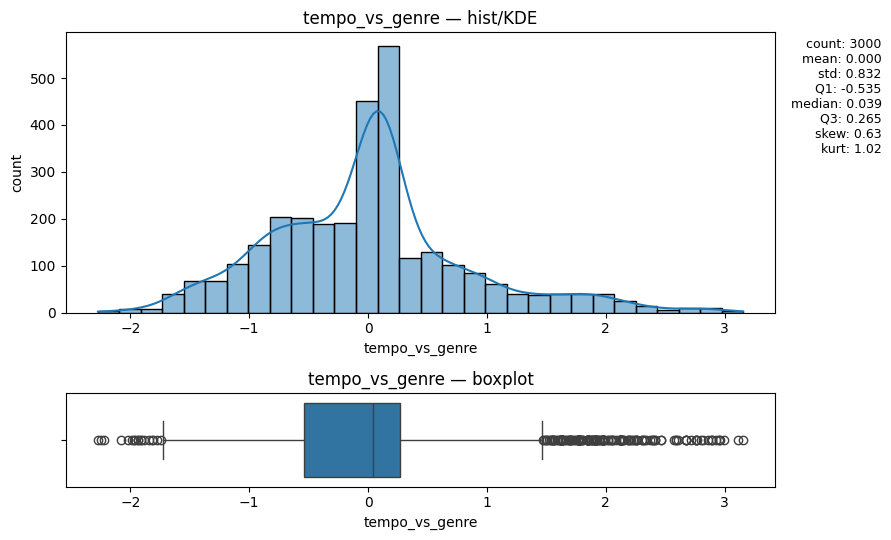

In [28]:
col = "tempo_vs_genre"
plot_univariate(df,col)

``mean`` = 0, ``median`` = 0,039 e ``IQR`` ≈ 0,8 (``Q1`` −0,535, ``Q3`` 0,265) revela boa dispersão no miolo.  
``skew`` ≈ 0,63 com cauda à direita moderada, ``kurt`` ≈ 1,02, leptocúrtica (caudas um pouco pesadas comparado à Normal).  
``Outliers``: presentes em ambas as caudas, mais extensos à direita (até ~3,2), mas não dominam a distribuição.

A feature parece estar estandardizada (média ~0), a cauda direita sugere géneros com tempo bem acima do esperado para o seu género. A cauda à esquerda, abaixo do esperado.

#### 1.2.2.13 time_signature

Esta feature representa o número de tempos por compasso.
Aqui queremos observar a forma da distribuição contínua (assimetria/caudas) e presença de outliers.

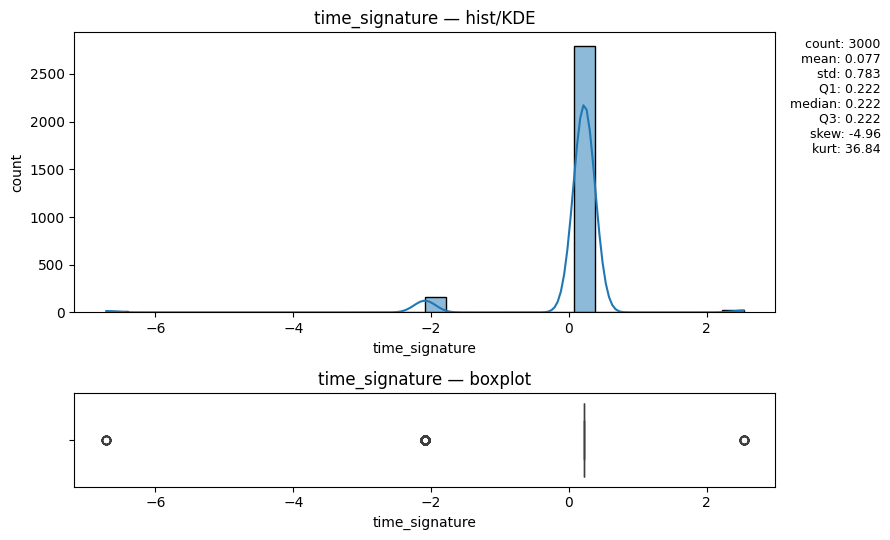

In [29]:
col = "time_signature"
plot_univariate(df,col)

Massa concentrada perto de 0,22:  ``Q1`` = ``Q3`` = 0,222, logo ``IQR`` = 0, a grande maioria das linhas partilha o mesmo valor transformado.
Caudas extremas: ``Outiliers`` fortes em −6,7, −2,1 e 2,3.
Assimetria: skew perto de −4,96 (cauda longa à esquerda).
Kurtose: kurt perto de 36,8, caudas muito pesadas.

Este gráfico demonstra uma variável que foi muito provavelmente estanderizada a partir de poucos níveis, o que resulta num valor dominante e alguns casos transformados para valores extremos (compassos raros).

#### 1.2.1.14 focus_factor

Caracteristica contínua que quantifica o grau de foco/presença instrumental.


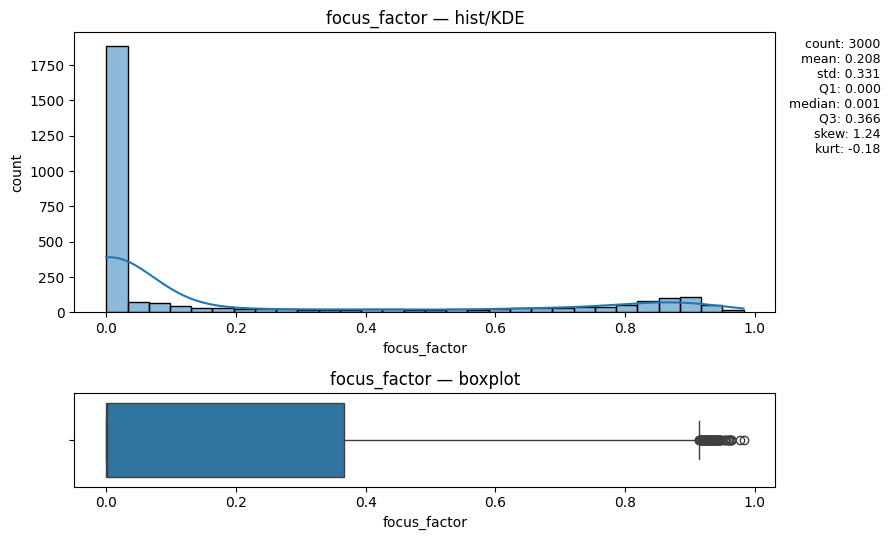

In [30]:
col = "focus_factor"
plot_univariate(df,col)

``Forma:`` distribuição extremamente ``concentrada perto de 0`` (``Q1`` = 0, mediana ≈ 0.001) com cauda direita longa (``skew`` ≈ 1,24).  
``Dispersão:`` ``IQR`` ≈ 0,369 e ``desvio-padrão`` ≈ 0,331.  
``Qualidade dos dados:`` count = 2986, ``14 faltas`` (é aceitavel)

Podemos ver que a maioria das faixas tem pouca presença/foco instrumental e um subconjunto menor é muito focado (quase 1).


#### 1.2.2.15 key_mode

É a representação numérica estandardizada que resume tonalidade + modo.

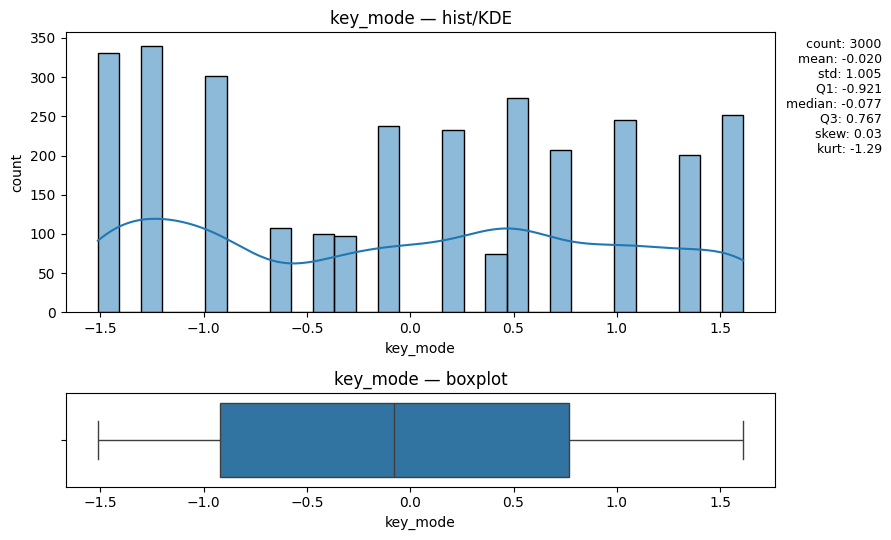

In [31]:
col = "key_mode"
plot_univariate(df,col)

``Skew`` ≈ 0,02 praticamente simétrica.
``Kurt`` ≈ −1,29, platocúrtica.


#### 1.2.2.16 acoustic_valence_mood_cluster
É a caracteristica que combina ``acústica`` e ``valência`` (humor positivo/negativo) oriundo de um processo de clustering/combinação.

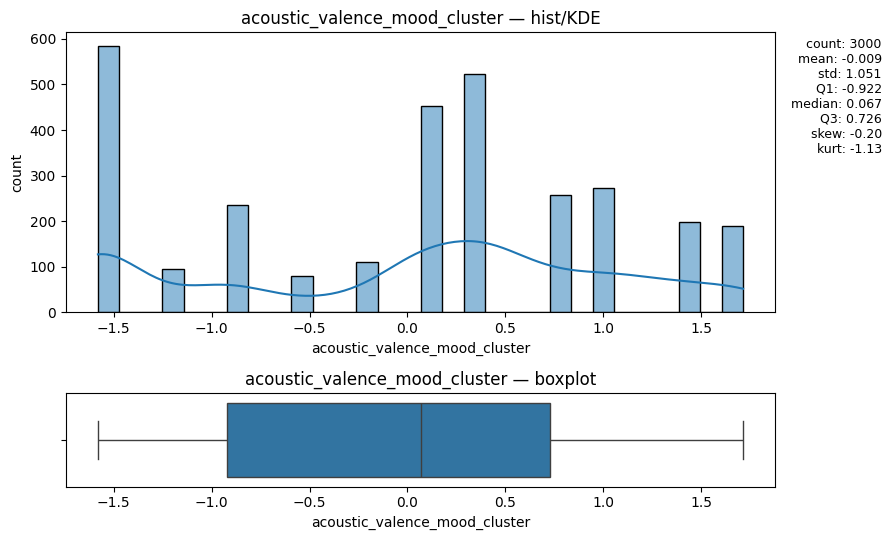

In [32]:
col = "acoustic_valence_mood_cluster"
plot_univariate(df,col)

``Skew`` ≈ −0,20 (ligeira assimetria à esquerda).
``Kurt`` ≈ −1.13, platocúrtica (caudas leves, poucos extremos).

#### 1.2.2.17 mood_cluster

É a projeção contínua de grupos de humor (resultado de clustering)

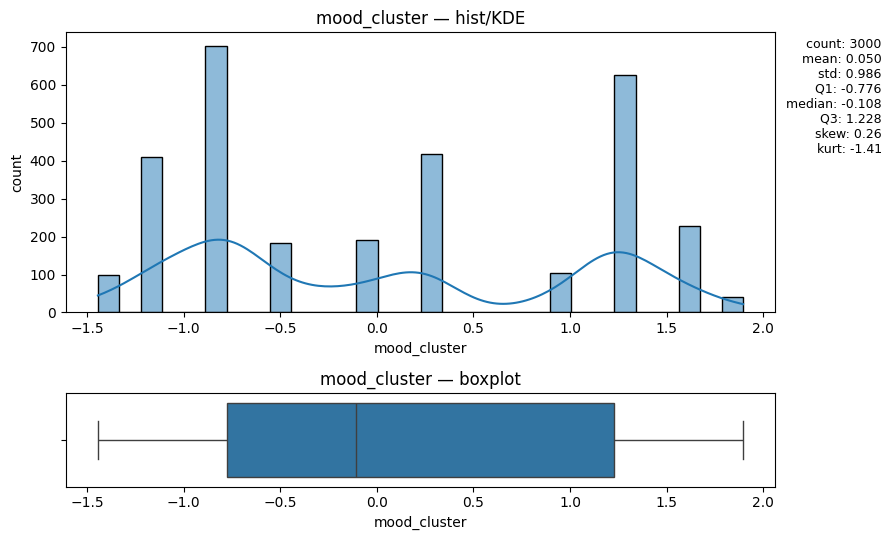

In [33]:
col = "mood_cluster"
plot_univariate(df,col)

``Skew`` ≈ 0,26 ligeira assimetria à direita.
``Kurt`` ≈ −1,42, platocúrtica (menos outliers que Normal).

### 1.2.2 Análise de Colunas Discretas e Categoricas

Aqui tentamos entender a distribuição das classes (frequências absolutas e percentuais), se há classes raras/desiquilibradas e a presença de valores em falta.  
Barras altas/baixas significam classes dominantes/raras.
% por classe serve para perceber o desiquilibrio(pode afetar modelos e métricas).

#### 1.2.2.1 Ordinais: popularity_level, tempo_class

As caracteristicas ordinais representam categorias com ordem natural sendo que neste dataset apenas duas se enquadram aqui:  
- `popularity_level`: 0 < 1 < 2 < 3 < 4.  
- `tempo_class`: classes de BPM do mais lento para o mais rápido.  
- `loudness_level`: faixas crescentes de intensidade.  
- `_duration_band`: reconstruída a partir de `duration_1` … `duration_5` como patamares 1 a 5.

Diferem das nominais por terem ordem e das contínuas por não serem valores reais.


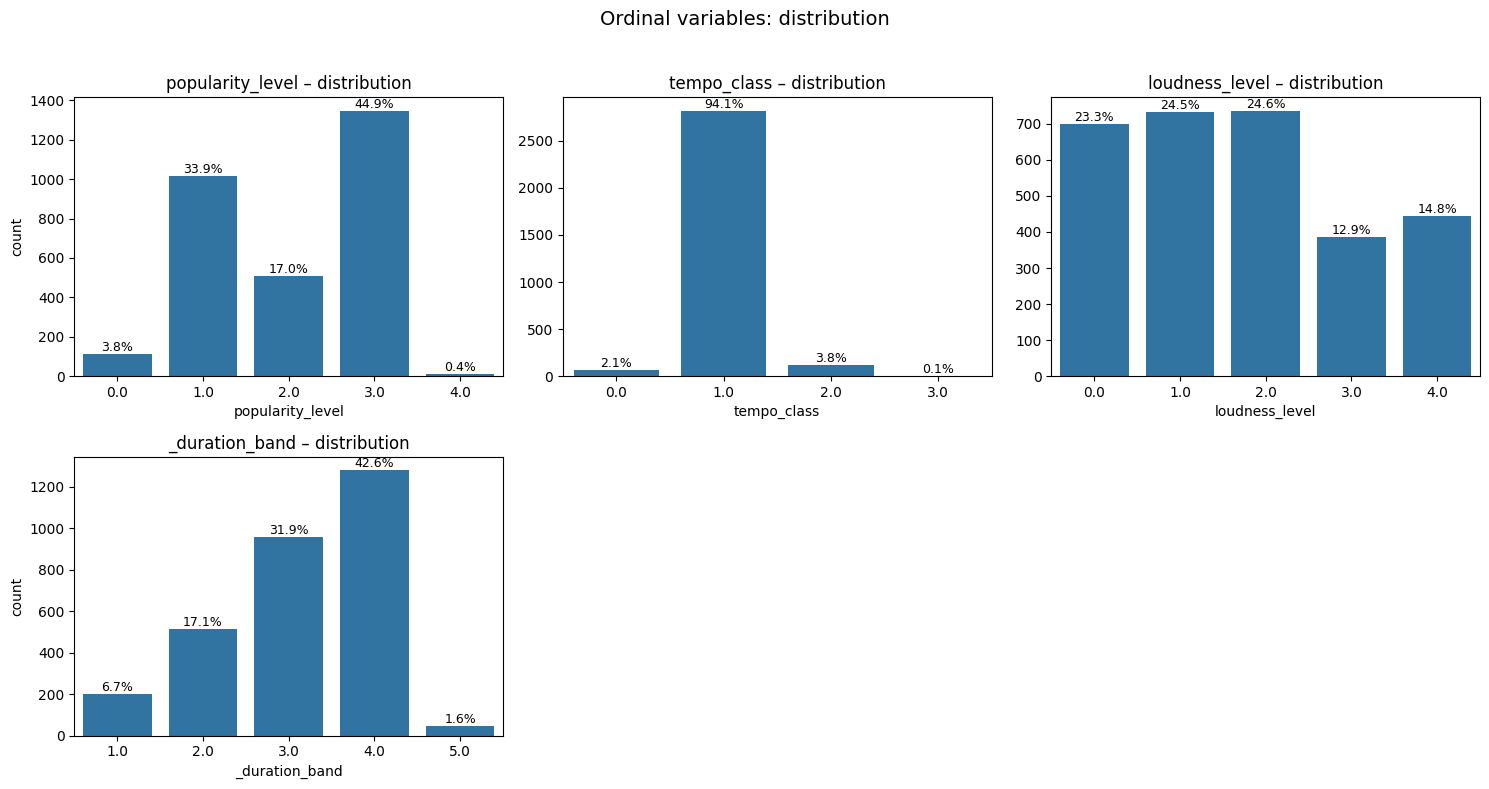

In [34]:
N = len(df)
duration_cols = ["duration_1", "duration_2", "duration_3", "duration_4", "duration_5"]
has_all = all(c in df.columns for c in duration_cols)
if has_all:
    # idxmax retorna o primeiro nível com 1. Se todos 0, resultado é o primeiro índice, por isso mascarar zeros.
    dur_vals = df[duration_cols].values
    all_zero = (dur_vals.sum(axis=1) == 0)
    duration_band = pd.Series(np.argmax(dur_vals, axis=1) + 1, index=df.index).astype("Float64")
    duration_band[all_zero] = pd.NA
    df["_duration_band"] = duration_band
else:
    df["_duration_band"] = pd.NA  # marcador ausente se não existir o conjunto

ordinal_cols = []
if "popularity_level" in df.columns:
    ordinal_cols.append("popularity_level")
if "tempo_class" in df.columns:
    ordinal_cols.append("tempo_class")
if "loudness_level" in df.columns:
    ordinal_cols.append("loudness_level")
# adicionar banda de duração derivada se existir
if "_duration_band" in df.columns and df["_duration_band"].notna().any():
    ordinal_cols.append("_duration_band")

# Layout
n_cols = 3
n_rows = math.ceil(len(ordinal_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols ` 5, n_rows ` 4))
fig.suptitle("Ordinal variables: distribution", fontsize=14)
axes = np.array(axes).reshape(-1)  # flatten robusto

for i, col in enumerate(ordinal_cols):
    ax = axes[i]
    # Ordem crescente numérica se possível, senão ordem natural dos níveis únicos
    levels = df[col].dropna().unique().tolist()
    try:
        order = sorted(levels, key=lambda x: float(x))
    except Exception:
        order = sorted(levels)
    sns.countplot(data=df, x=col, order=order, ax=ax)
    ax.set_title(f"{col} – distribution")
    ax.set_xlabel(col)
    ax.set_ylabel("count" if i % n_cols == 0 else "")
    ax.tick_params(axis="x", rotation=0)
    # Anotar percentagens
    for p in ax.patches:
        h = p.get_height()
        if h > 0:
            ax.annotate(f"{100`h/N:.1f}%", (p.get_x() + p.get_width() / 2.0, h),
                        ha="center", va="bottom", fontsize=9)

# Esconder eixos não usados
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

`popularity_level`  
Distribuição concentrada em níveis altos: 3 ≈ 44,9%, 1 ≈ 33,9%, 2 ≈ 17,0%, extremos quase nulos.  
A amostra mostra predominância de popularidade média e alta.  

`tempo_class`  
Concentração extrema na classe 1 ≈ 94,1% com 0 ≈ 2,1%, 2 ≈ 3,8%, 3 ≈ 0,1%.  
Quase constante, informação limitada.  

`loudness_level`  
Distribuição mais repartida: 0 ≈ 23,3%, 1 ≈ 24,5%, 2 ≈ 24,6%, 3 ≈ 12,9%, 4 ≈ 14,8%.  
Entropia moderada, sem dominância severa.  

`_duration_band`  
Distribuição assimétrica para patamares altos: 1 ≈ 6,7%, 2 ≈ 17,1%, 3 ≈ 31,9%, 4 ≈ 42,6%, 5 ≈ 1,6%.  
Predomínio de durações médias e longas, cauda rara no patamar 5.  

#### 1.2.2.2 Binárias: explicit, mode_indicator, time_signature_class_boolean, is_instrumental, is_dance_hit e durations

As caracteristicas binárias assumem dois estados (0/1, False/True) e nestas variaveis interessam-nos as ``proporções`` e o ``desequilíbrio`` (ex.: 95/5).


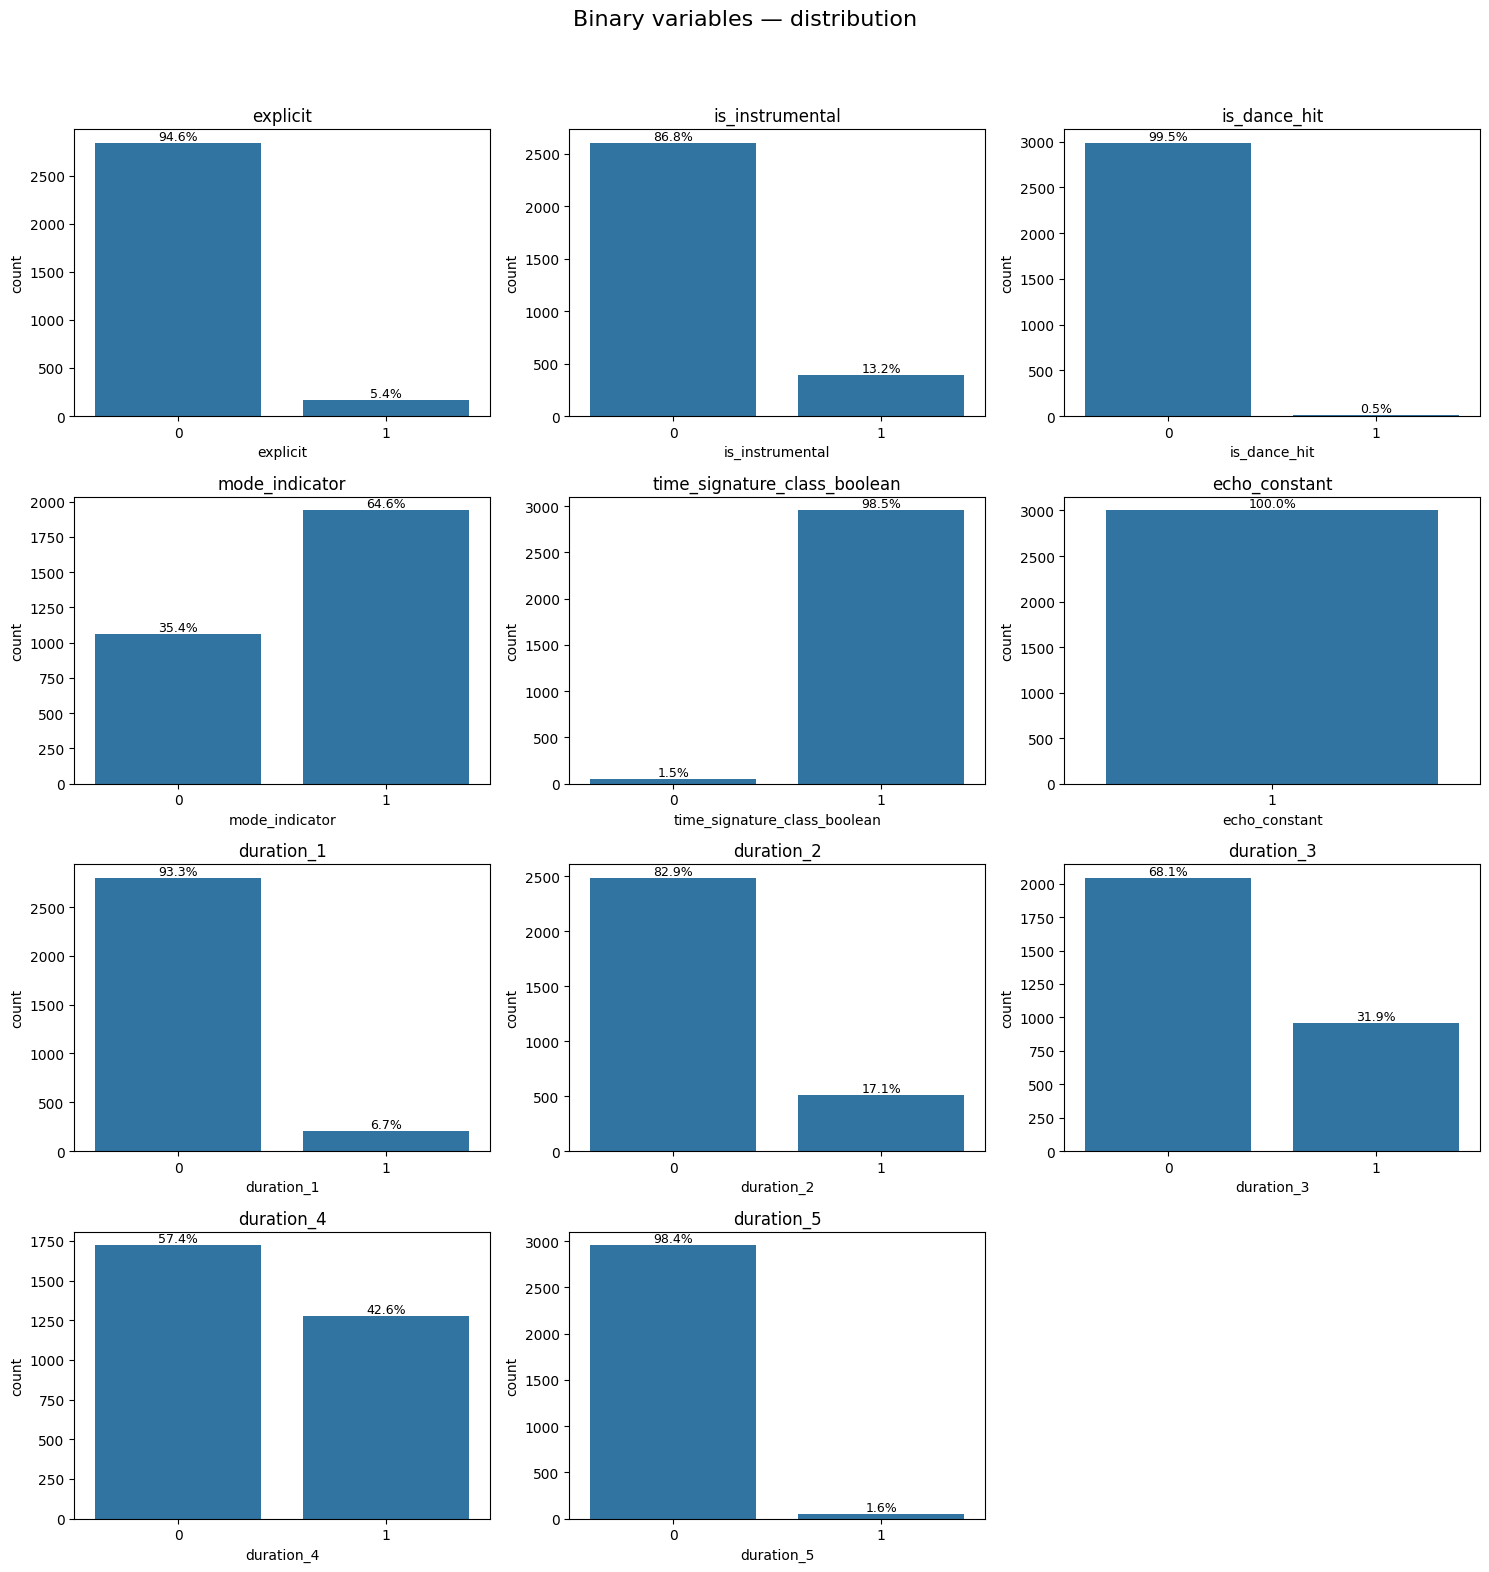

In [35]:
# Colunas binária
bin_cols = [
    "explicit", "is_instrumental", "is_dance_hit", "mode_indicator",
    "time_signature_class_boolean", "echo_constant",
    "duration_1", "duration_2", "duration_3", "duration_4", "duration_5",
]
bin_cols_plot = [c for c in bin_cols if c in df.columns]
n_cols = 3
n_rows = math.ceil(len(bin_cols_plot) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols`5, n_rows`4))
axes = axes.flatten() if hasattr(axes, "flatten") else [axes]
fig.suptitle("Binary variables — distribution", fontsize=16)
N = len(df)

for i, col in enumerate(bin_cols_plot):
    s = df[col]

    # 1) Normalizar para 0/1 inteiros (suporta bool, 0/1 como float/str)
    s_num = pd.to_numeric(s, errors="coerce")        # tenta converter
    if set(s_num.dropna().unique()).issubset({0.0, 1.0}):
        s_plot = s_num.astype("Int64")               # 0/1 inteiros com NA (se houver)
    else:
        # fallback: tratar como bool → int
        s_plot = s.astype(bool).astype("Int64")

    # 2) Ordem a partir dos valores existentes (evita mismatch de tipos)
    order = sorted(v for v in s_plot.dropna().unique().tolist())

    ax = axes[i]
    # 3) Passar a SÉRIE diretamente (não o nome da coluna)
    sns.countplot(x=s_plot, order=order, ax=ax)
    ax.set_title(col)
    ax.set_xlabel(col); ax.set_ylabel("count")

    # 4) Percentagens
    for p in ax.patches:
        h = p.get_height()
        if h > 0:
            ax.annotate(f"{100`h/N:.1f}%", (p.get_x()+p.get_width()/2, h),
                        ha="center", va="bottom", fontsize=9)
# esconder eixos vazios
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0,0,1,0.95]); plt.show()

`explicit`: ~5,4% = 1 (conteúdo explícito), 94,6% = 0 mostra desequilíbrio forte.  
`is_instrumental`: ~13,2% = 1, 86,8% = 0 revela um desequilíbrio, mas menos extremo que explicit.  
`is_dance_hit`: ~0,5% = 1, 99,5% = 0, quase constante o que revela um risco de sobreajuste.  
`mode_indicator`: ~64,6% = 1, 35,4% = 0 é relativamente equilibrada.  
`time_signature_class_boolean`: ~98,5% = 1, 1,5% = 0 mais uma vez quase constante ou seja tem baixo poder descriminativo.  
`echo_constant`:100% = 1. Variável constante.  
`duration_1`:- 1 ≈ 6,7%, 0 ≈ 93,3%. Desequilíbrio acentuado.  
`duration_2`: 1 ≈ 17,1%, 0 ≈ 82,9%. Desequilíbrio moderado.  
`duration_3`:- 1 ≈ 31,9%, 0 ≈ 68,1%. Mais frequente que as anteriores.  
`duration_4`:- 1 ≈ 42,6%, 0 ≈ 57,4%.  
`duration_5`:- 1 ≈ 1,6%, 0 ≈ 98,4%. Extremamente raro.

#### 1.2.2.3 Nominais: target_class

São categorias sem ordem natural. Aqui interessa medir proporções por classe e verificar desequilíbrio.


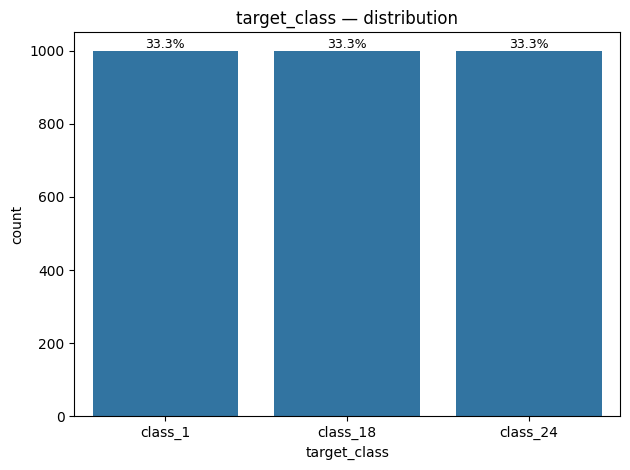

In [36]:
col = "target_class"
N = len(df)
order = df[col].value_counts().index  # mais frequentes primeiro

ax = sns.countplot(data=df, x=col, order=order)
ax.set(title=f"{col} — distribution", xlabel=col, ylabel="count")
#ax.tick_params(axis="x", rotation=25, ha="right")

# anotar percentagens no topo
for p in ax.patches:
    h = p.get_height()
    if h > 0:
        ax.annotate(f"{100`h/N:.1f}%", (p.get_x()+p.get_width()/2, h),
                    ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


``Distribuição``: perfeitamente equilibrada class_1, class_18 e class_24 com 33,3% cada (1000 registos por classe).  


## 1.3 Análise Bivariate

### 1.3.1 Caracteristicas Continuas x target_regression (continua x continua)

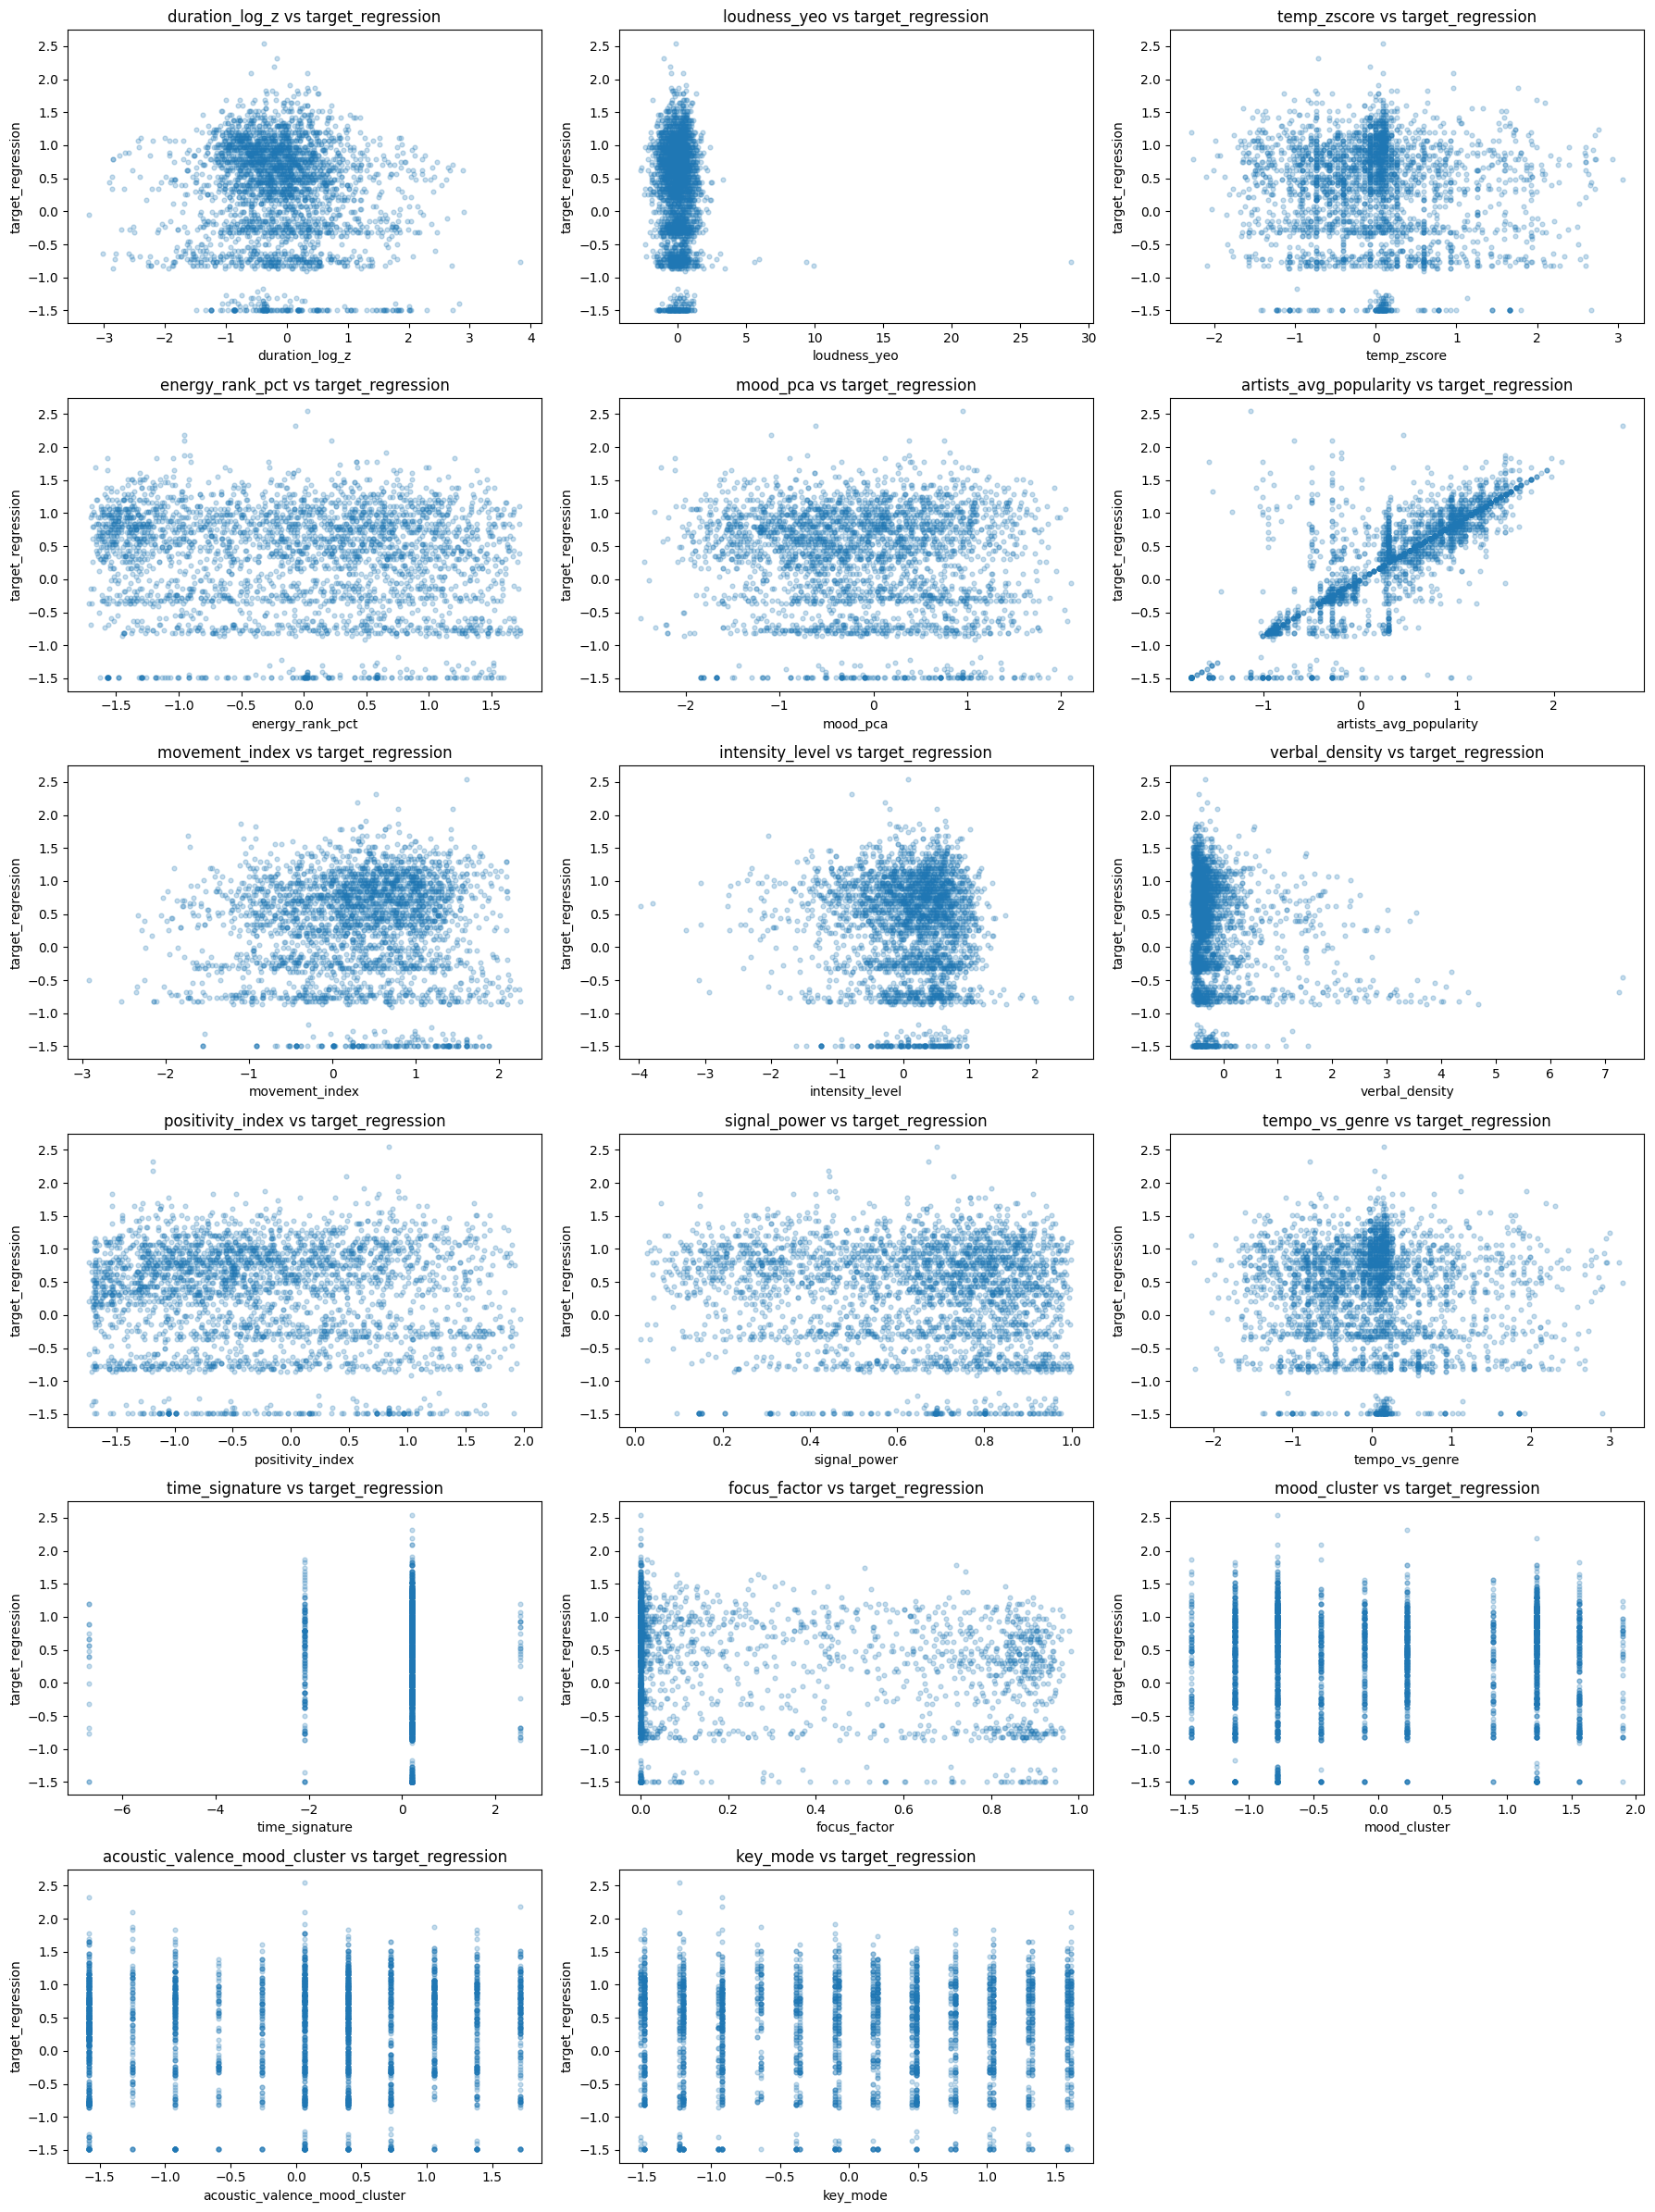

In [37]:
TARGET_REG = "target_regression"

n_cols = 3
n_rows = math.ceil(len(cont_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols`6, n_rows`4))
axes = axes.flatten()

for i, col in enumerate(cont_cols):
    ax = axes[i]
    # remover NaN de ambos os lados
    x = df[col]
    y = df[TARGET_REG]
    m = x.notna() & y.notna()
    # pontos com transparência para reduzir ruído visual
    ax.scatter(x[m], y[m], s=12, alpha=0.25)  # pontos transparentes
    ax.set_title(f"{col} vs {TARGET_REG}")
    ax.set_xlabel(col); ax.set_ylabel(TARGET_REG)

# esconder subplots vazios
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### 1.3.2 Caracteristicas Continuas x target_class (continua x categórica)

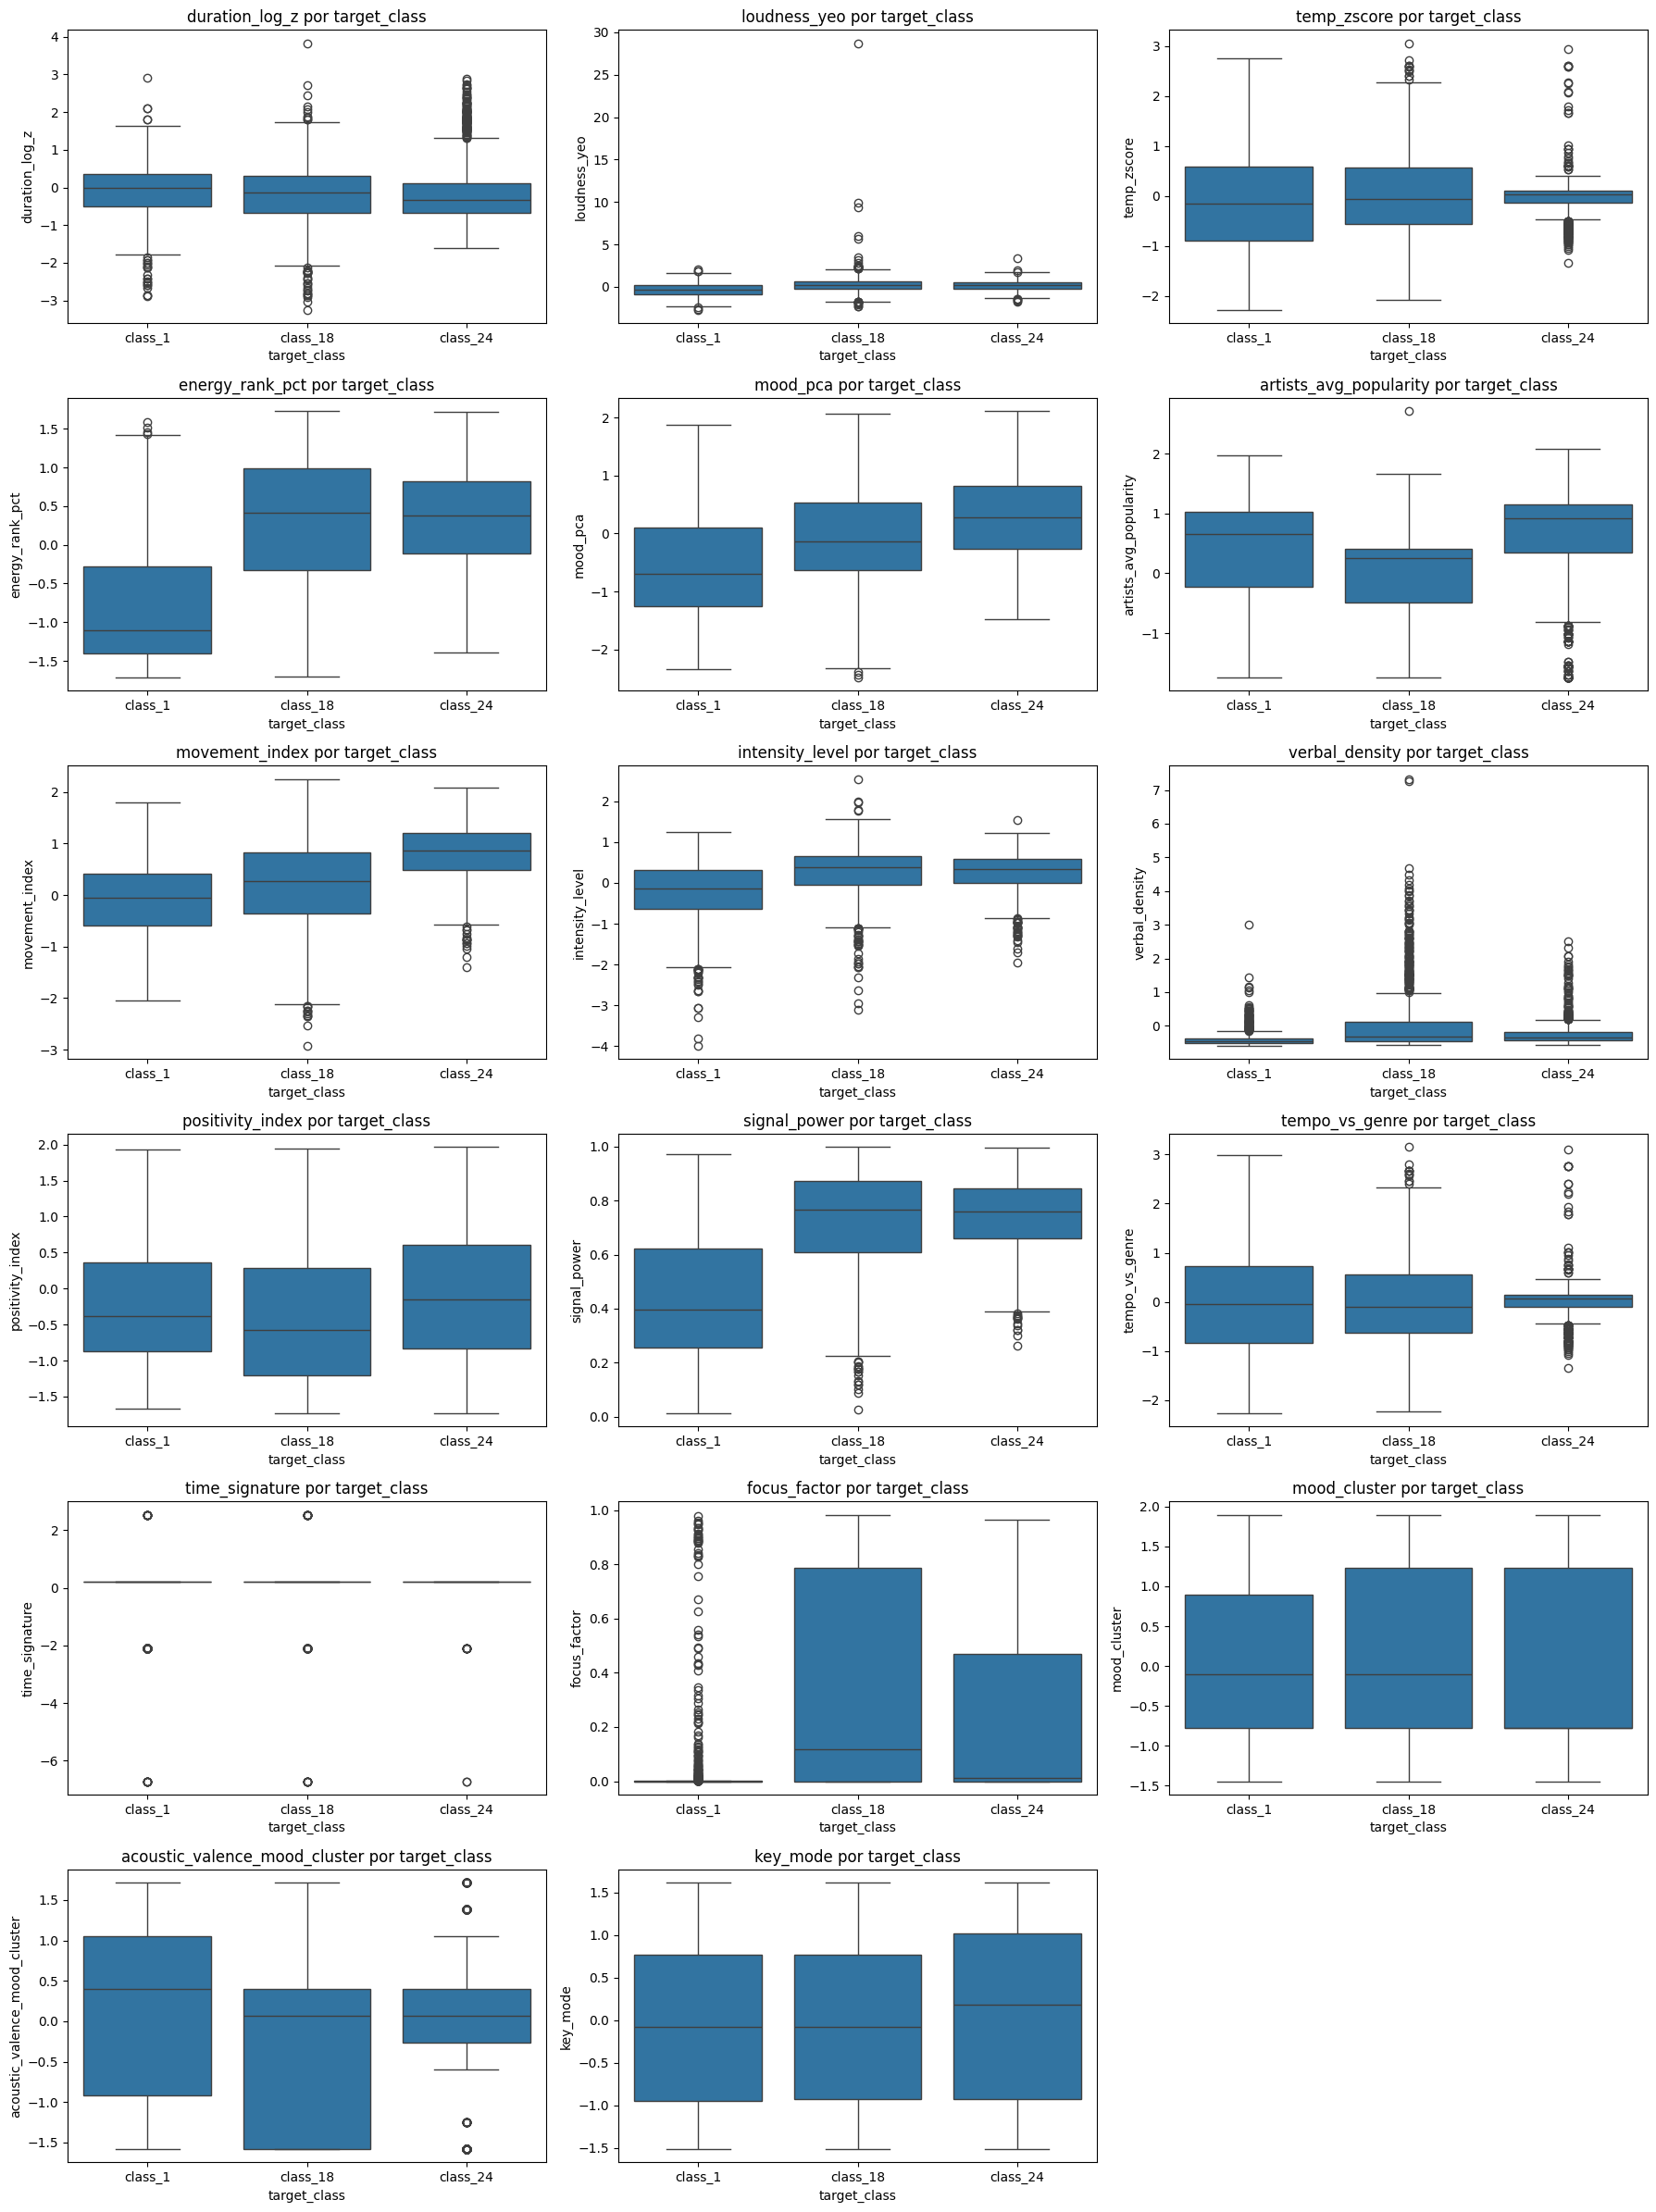

In [38]:
TARGET_CLS = "target_class"

n_cols = 3
n_rows = math.ceil(len(cont_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols`6, n_rows`4))
axes = axes.flatten()
for i, col in enumerate(cont_cols):
    ax = axes[i]
    # boxplot do valor contínuo por cada classe do alvo
    sns.boxplot(x=TARGET_CLS, y=col, data=df, ax=ax)
    ax.set_title(f"{col} por {TARGET_CLS}")
    ax.set_xlabel(TARGET_CLS); ax.set_ylabel(col)
    
# esconder subplots vazios
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


### 1.3.3 Caracteristicas Categóricas x target_regression (categoric x categórica)

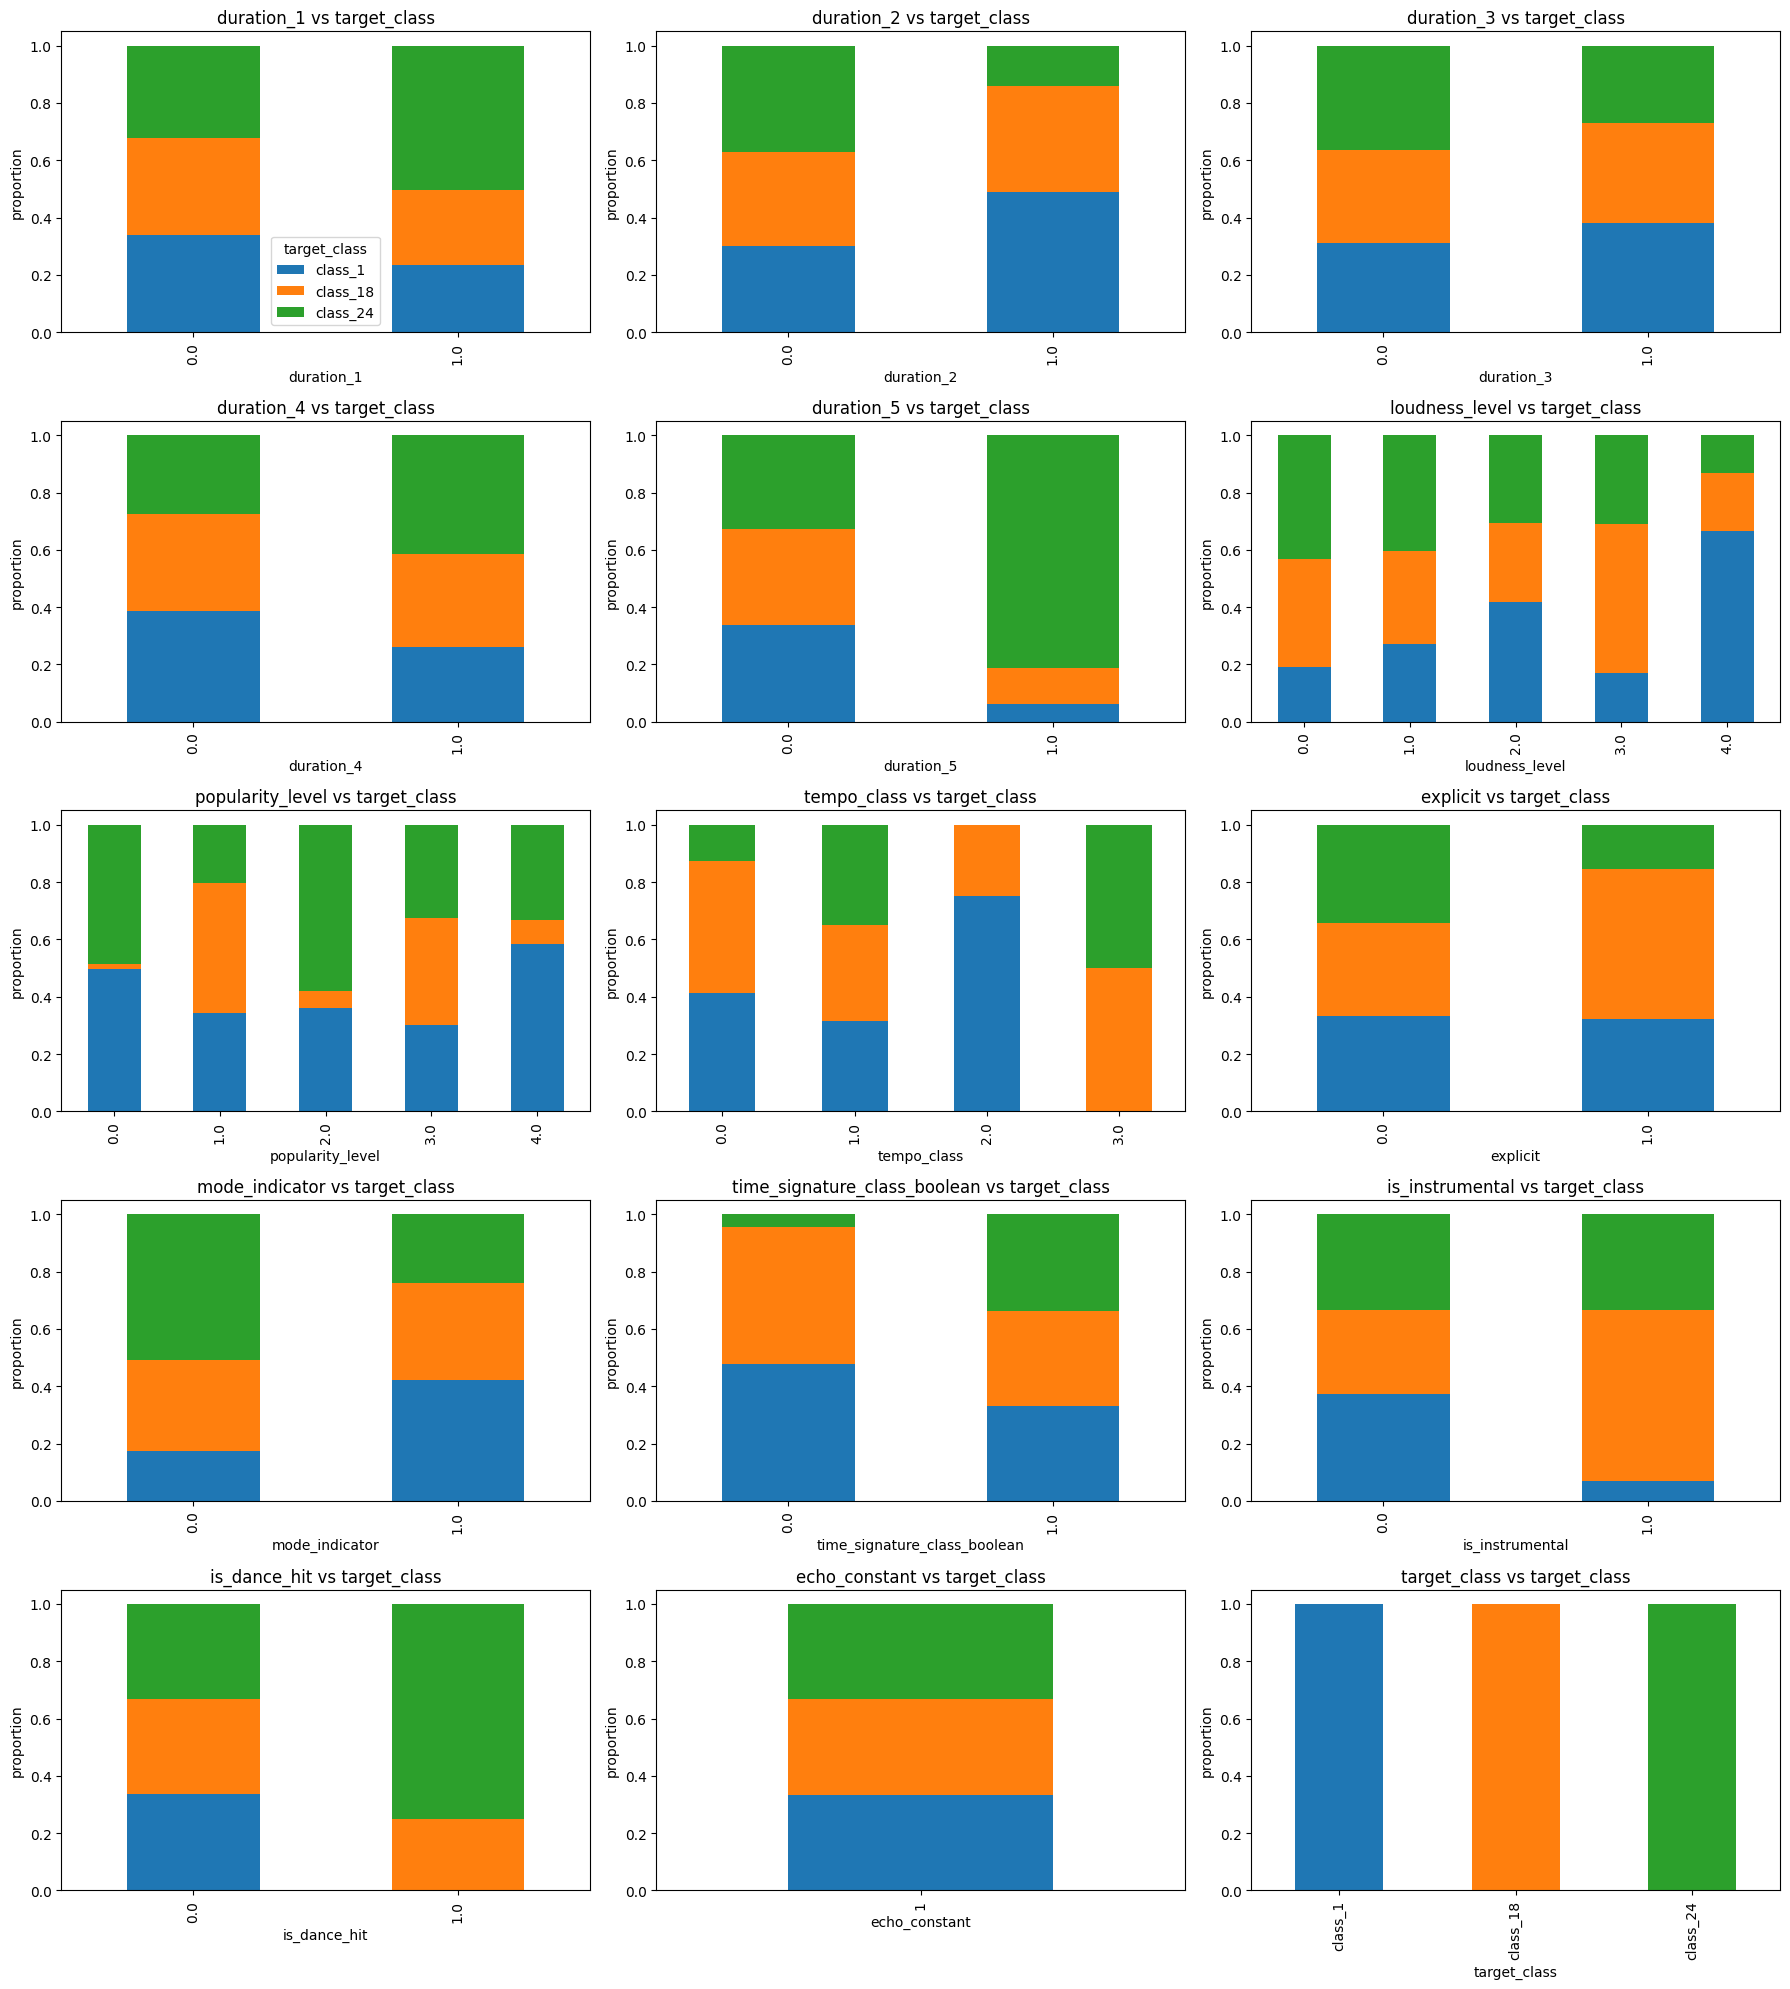

In [39]:
TARGET_CLS = "target_class"

n_cols = 3
n_rows = math.ceil(len(cat_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols`6, n_rows`4))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    # tabela de contingência: linhas = categorias de X; colunas = classes do alvo
    conf = pd.crosstab(df[col], df[TARGET_CLS]) # linhas=cat de X, colunas=classes
    prop = conf.div(conf.sum(1), axis=0) # normaliza por linha (proporções)
    prop.plot(kind="bar", stacked=True, ax=ax, legend=(i==0)) # barras empilhadas; só mostra legenda no primeiro gráfico
    ax.set_title(f"{col} vs {TARGET_CLS}")
    ax.set_xlabel(col); ax.set_ylabel("proportion")
    
# esconder subplots vazios    
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()



### 1.3.4 Caracteristicas Categóricas x target_regression (categórica x continua)

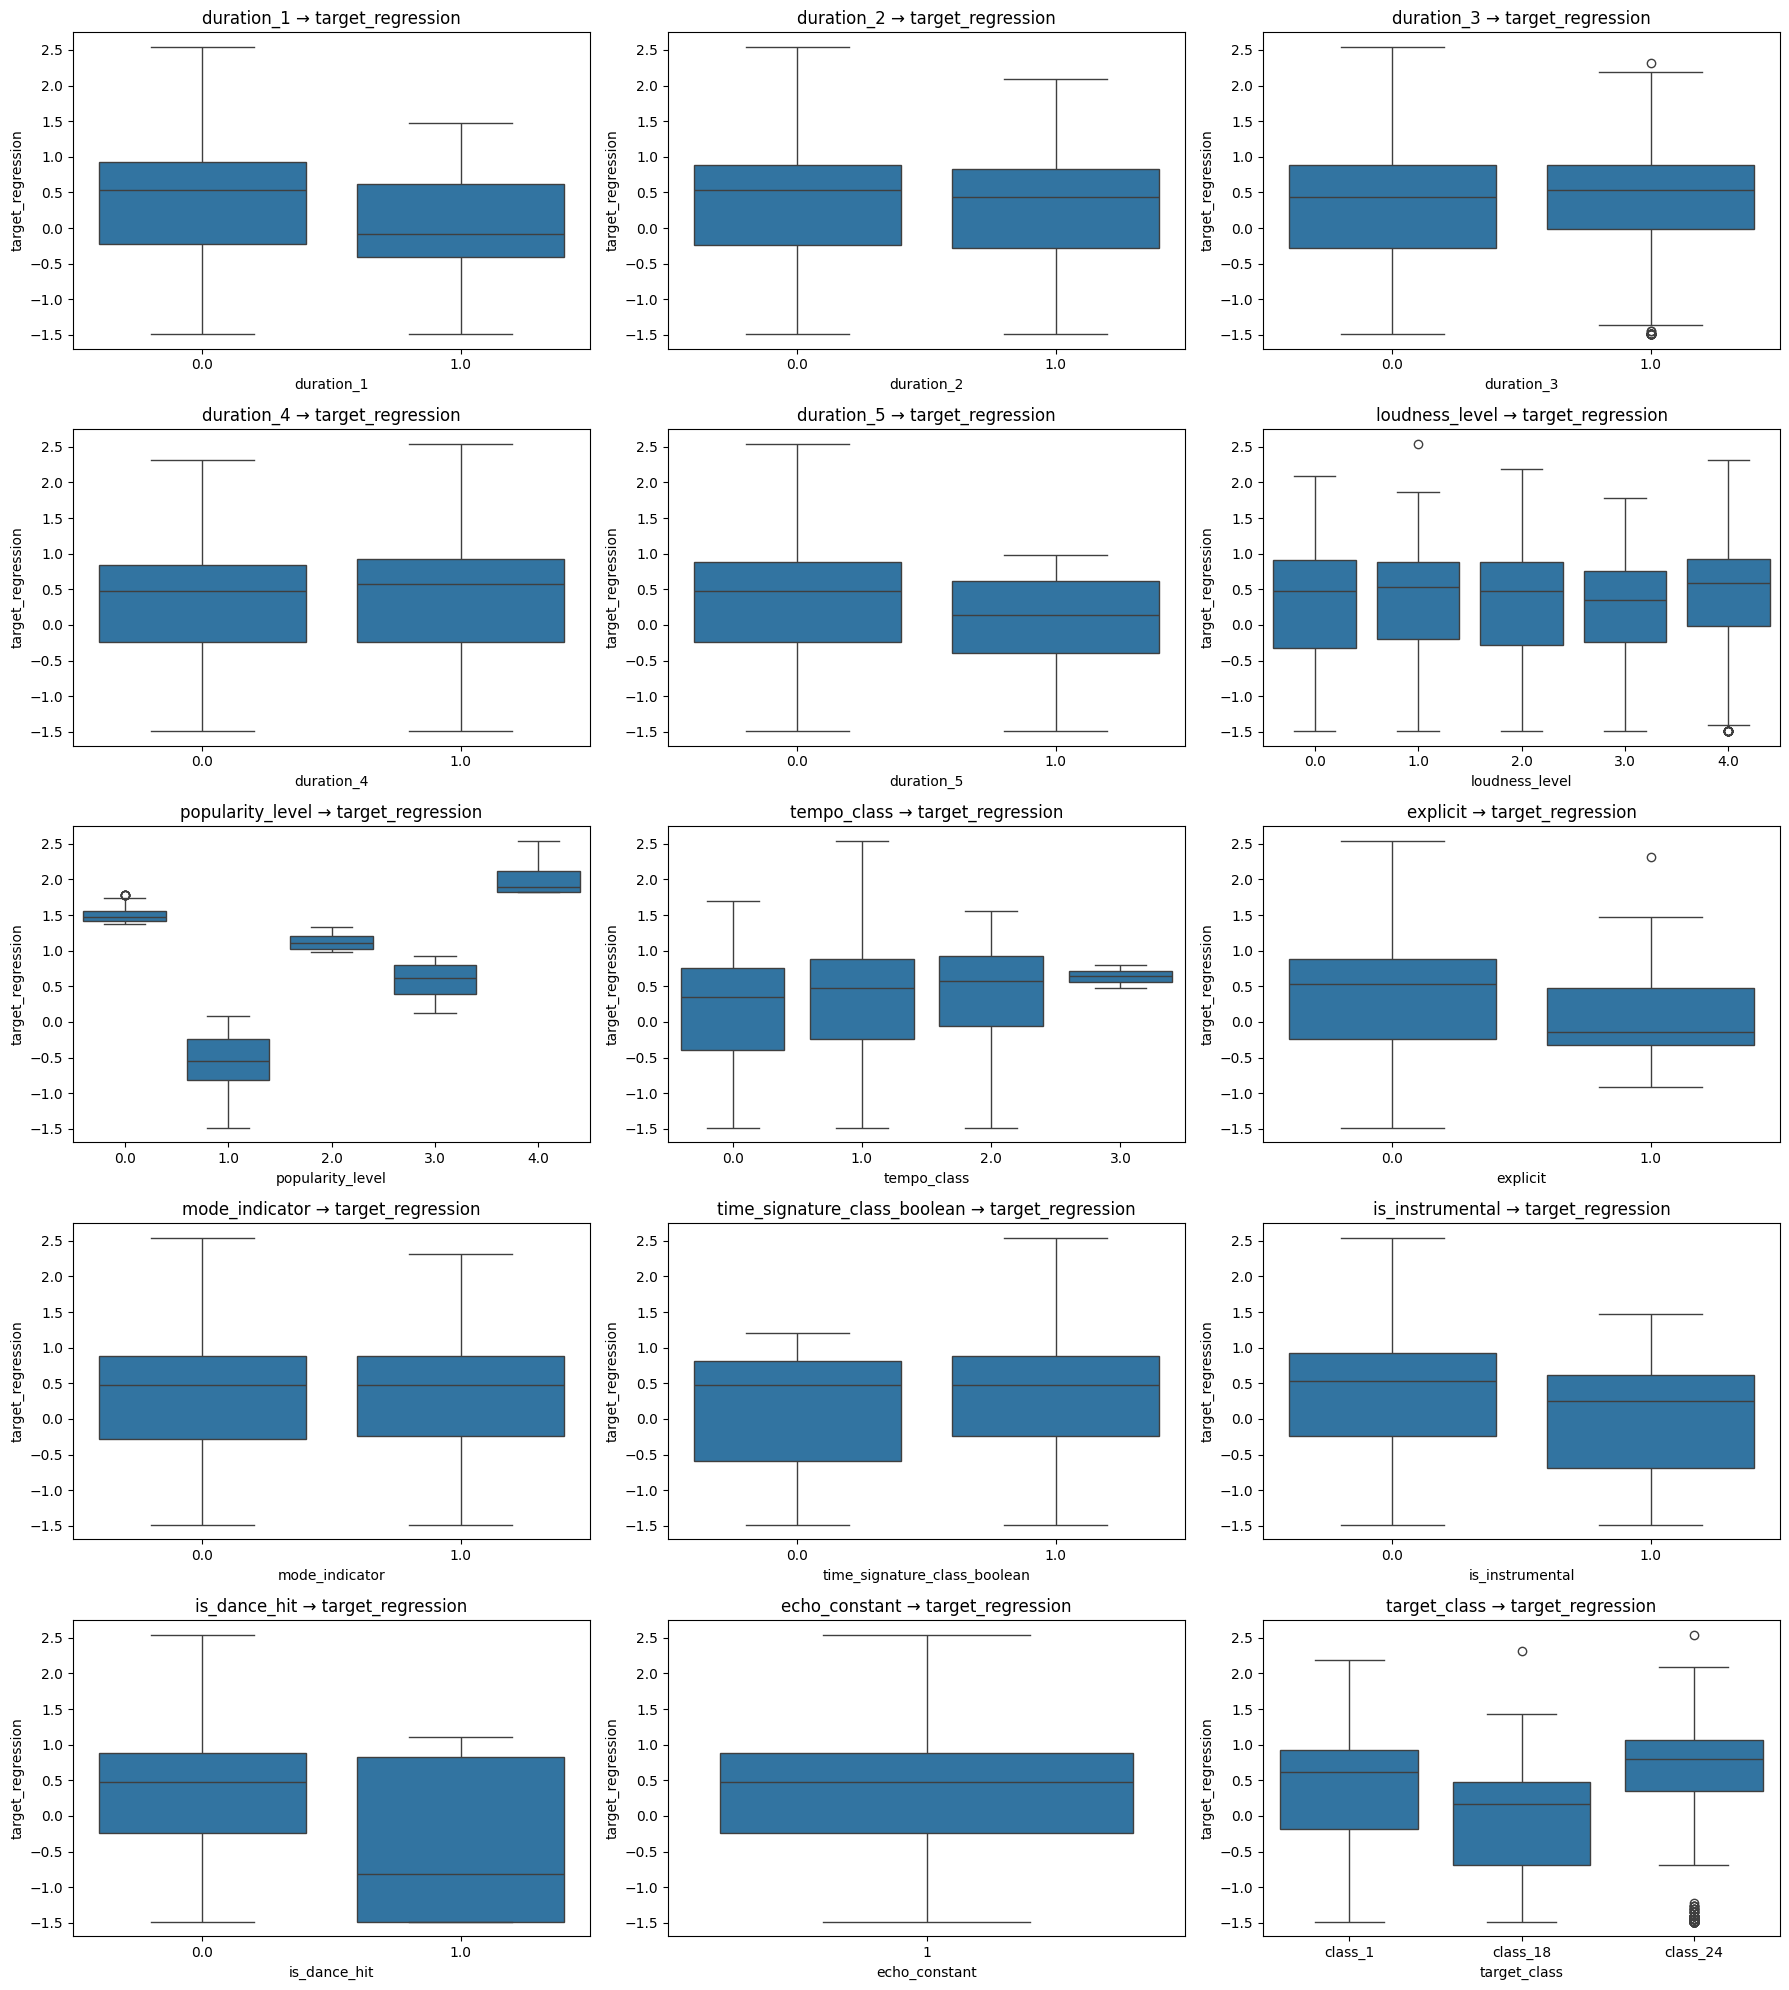

In [40]:
TARGET_REG = "target_regression"

n_cols = 3
n_rows = math.ceil(len(cat_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols`6, n_rows`4))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    # boxplot do target contínuo para cada categoria de X
    sns.boxplot(x=col, y=TARGET_REG, data=df, ax=ax)
    ax.set_title(f"{col} → {TARGET_REG}")
    ax.set_xlabel(col); ax.set_ylabel(TARGET_REG)

# esconder subplots vazios
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


### 1.3.5 key_cos vs key_sin (continua x continua)

`key_cos` e `key_sin` são ``variáveis contínuas`` em `[-1, 1]`. No entanto elas formam, em par, uma codificação circular (cos/sin) do tom musical.
Individualmente, cada coluna perde informação (apenas a projeção no eixo X ou Y) sendo que apenas juntas, revelam a geometria circular:  
- aglomerados angulares indicam chaves mais frequentes;  
- eventuais buracos/assimetria sugerem chaves raras ou preferências estilísticas.


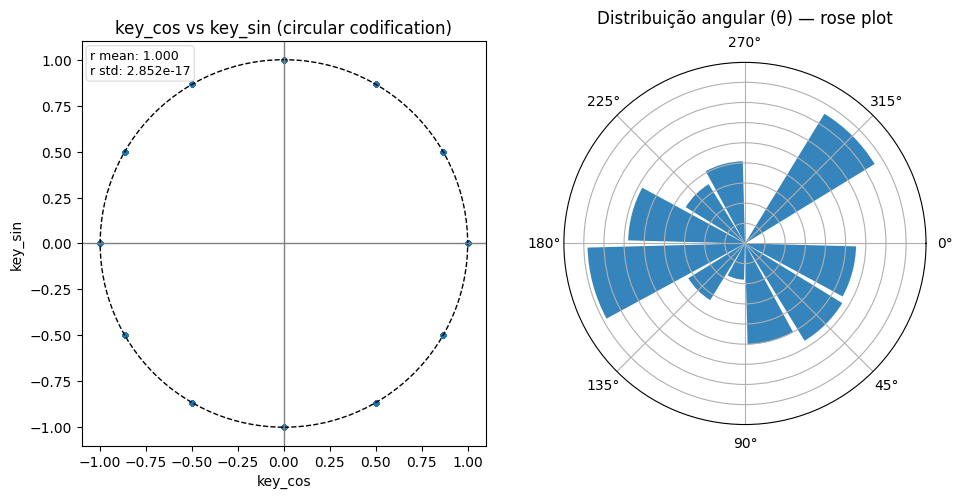

In [41]:
xc = df["key_cos"]
ys = df["key_sin"]

# filtrar pares válidos
m  = xc.notna() & ys.notna()
x, y = xc[m].to_numpy(), ys[m].to_numpy()

# Converter para coordenadas polares
theta = np.arctan2(y, x) # ângulo em rad [-π, π]
r = np.hypot(x, y) # raio (deverá ser ~1)

# Preparar bins (12 classes)
B = 12
bins = np.linspace(-np.pi, np.pi, B+1)
hist, edges = np.histogram(theta, bins=bins)
pct = hist / hist.sum() ` 100
centers = (edges[:-1] + edges[1:]) / 2

# Figura com 2 subplots (scatter + rose)
fig = plt.figure(figsize=(10, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[1.3, 1])

# Scatter no plano (cos,sin) com círculo unitário
ax1 = fig.add_subplot(gs[0, 0])
ax1.scatter(x, y, s=10, alpha=0.35) # pontos (cos, sin)
ax1.add_patch(plt.Circle((0,0), 1, fill=False, ls="--", lw=1))  # círculo referência
ax1.axhline(0, color="gray", lw=1); ax1.axvline(0, color="gray", lw=1)
ax1.set_aspect("equal", adjustable="box")
ax1.set_title("key_cos vs key_sin (circular codification)")
ax1.set_xlabel("key_cos"); ax1.set_ylabel("key_sin")

# mini-estatísticas do raio (confirma r≈1)
ax1.text(0.02, 0.98, f"r mean: {np.nanmean(r):.3f}\nr std: {np.nanstd(r):.3e}",
         transform=ax1.transAxes, ha="left", va="top",
         bbox=dict(boxstyle="round", fc="white", ec="#ddd", alpha=0.9), fontsize=9)

# Rose plot (histograma polar do ângulo)
ax2 = fig.add_subplot(gs[0, 1], projection="polar")
ax2.bar(centers, pct, width=(2`np.pi/B)`0.9, align="center", alpha=0.9)
ax2.set_title("Distribuição angular (θ) — rose plot", pad=28)   # pad afasta o título
ax2.set_theta_zero_location("E") # 0° no (1,0), compatível com cos
ax2.set_theta_direction(-1) # sentido horário (comum em música)
ax2.set_yticklabels([]) # esconder labels radiais
ax2.set_ylim(0, max(pct)`1.15)

plt.tight_layout()
plt.show()

- ``Codificação válida:`` raio médio r ≈ 1 e desvio ~0. pontos exatamente no ``círculo unitário`` (sem ruído radial).  
- ``Quantização angular:`` os pontos surgem em ``12 direções discretas`` (pitch classes), como esperado para tonalidades.  
- ``Distribuição não uniforme:`` o “rose plot” mostra picos em ~165° (15.6%), −45° (15.1%) e −165° (11.6%), certas chaves são mais frequentes no dataset. 

## 1.4 Síntese do estudo do dataset

### Análise dos Targets e Implicações de Modelagem

Os ``targets`` apresentam comportamentos distintos conforme o tipo de variável.  
O `target_class` mostra uma distribuição aproximadamente balanceada (cerca de 33% em cada classe).  
Já o `target_regression` é contínuo, com um piso observável próximo de −1.5, o que indica saturação ou limite inferior.

#### Binárias
As variáveis binárias são fortemente desiquilibradas, em especial ``explicit``, ``is_dance_hit`` e ``time_signature_class_boolean``.  
Apesar disso, são úteis como `features`, devendo apenas ser tratadas com atenção caso sejam usadas como alvo ou para estratificação.

#### Ordinais
A variável ``tempo_class`` encontra-se fortemente concentrada na classe 1, revelando baixa variabilidade.  
Por outro lado, ``loudness_level`` e ``popularity_level`` apresentam gradientes plausíveis, coerentes com a escala ordinal.  
As variáveis ``duration_``` (discretas) modificam as proporções entre classes e, por esse motivo, constituem bons candidatos para tarefas de classificação.

#### Contínuas (Forma da Distribuição)
Algumas variáveis contínuas seguem distribuições quase normais, como ``duration_log_z``, ``temp_zscore`` e ``mood_pca``.  
Outras são multimodais, como ``artists_avg_popularity``, ``mood_cluster``, ``acoustic_valence_mood_cluster`` e ``key_mode``.  
Há ainda variáveis com caudas longas e presença de `outliers`, nomeadamente ``verbal_density``, ``focus_factor``, ``intensity_level``, ``loudness_yeo`` e ``time_signature``.  
A variável ``energy_rank_pct`` apresenta distribuição aproximadamente uniforme.  
Por fim, ``key_sin`` e ``key_cos`` situam-se no círculo unitário, e um `rose plot` sugere a existência de chaves musicais preferenciais.

#### Relações Bivariadas com os Targets
Na ``regressão``, observa-se relação mais clara em ``artists_avg_popularity``, onde o aumento da popularidade média dos artistas tende a elevar o valor do alvo.  
As restantes variáveis mostram relações mais fracas ou não lineares.  
Na ``classificação``, verificam-se diferenças entre classes em ``energy_rank_pct``, ``mood_pca``, ``signal_power``, ``focus_factor`` e nas variáveis de ``durations``.


# 2 Aplicação de Métodos - Regressão

Nesta fase são aplicados ``métodos de regressão`` com a finalidade de prever a variável ``"target_regression"`` presente no dataset fornecido.
Assim, o principal foco desta secção é encontrar uma ``função`` que descreva, com a ``menor margem de erro possivel``, a ``relação`` entre essas variáveis, de maneira a conseguir fazer uma ``estimativa de valores futuros ou desconhecidos`` da variável que se pretende analisar.

Para avaliar o ``desempenho dos modelos``, foi utilizada a técnica ``hold-out``, que consiste em dividir o conjunto de dados em duas partes:

- ``Treino (80%)`` – utilizado para ajustar o modelo;

- ``Teste (20%)`` – utilizado para avaliar o desempenho do modelo em dados não observados.

Posteriormente, o ``desempenho dos modelos`` será medida através das métricas:
- ``RSS``: Soma dos quadrados dos resíduos. Quanto menor o RSS, melhor o ajuste do modelo aos dados.
- ``R²``: Coeficiente da variabilidade do modelo (preferencialmente, este valor deve aproximar-se o máximo possível de 1);
- ``MAE``: Erro médio absoluto. É utilizado para medir o erro médio entre os valores reais e os valores previstos;
- ``RMSE``: Usada no sentido de verificar o quão longe, em média, estão as previsões obtidas em relação aos valores reais.

In [42]:
# Librarias utilizadas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


## 2.1 Regressão Linear Simples
Na sequência do que foi indicado anteriormente, irá ser realizada uma ``Regressão Linear Simples``.
Esta tem como objetivo ``encontrar a relação entre uma variável dependente e uma única variável independente``.
Assim sendo, pretendemos ``prever a variável "target_regression"``, partindo de ``uma das variáveis independentes`` (features) do dataset fornecido.
Para isto, é utilizada a seguinte ``expressão`` para demonstrar a ``relação linear`` entre as variáveis utilizadas:
\\[
Y=β0​+β1​X+ε
\\]

onde:

- Y representa a ``variável dependente`` (target_regression),
- X representa a ``variável independente`` (feature do dataset),
- β0 é o ``intercepto`` (valor de Y quando X = 0),
- β1 é o ``coeficiente angular/inclinação da reta`` (influência de X sobre Y),
- ε é o ``erro aleatório`` (diferença entre valores reais e previstos).

### 2.1.1 Testar um modelo utilizando uma única feature
Numa primeira fase, é realizado um ``modelo de regressão linear simples`` utilizando ``uma única variável independente``.
Escolhemos, por exemplo, a variável ``"tempo_vs_genre"``.
Esta escolha trata-se apenas de um exemplo. Posteriormente, serão testadas ``todas as variáveis`` com o objetivo de ``observar a força da relação entre cada uma dessas features e a variável "target_regression"``.

In [43]:
# Definir variável independente (X) e dependente (y)
X = df[['tempo_vs_genre']]
y = df['target_regression']

# Método Hold-out: Divisão entre amostras de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criação do modelo
model = LinearRegression()

# Treinar o modelo
model.fit(X_train, y_train)

# Realizar previsões
y_pred = model.predict(X_test)

# Avaliar o modelo com 4 casas décimais (utilizado posteriormente para comparação e discussão de resultados) 
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R²: 0.0030
MAE: 0.6336
RMSE: 0.7653


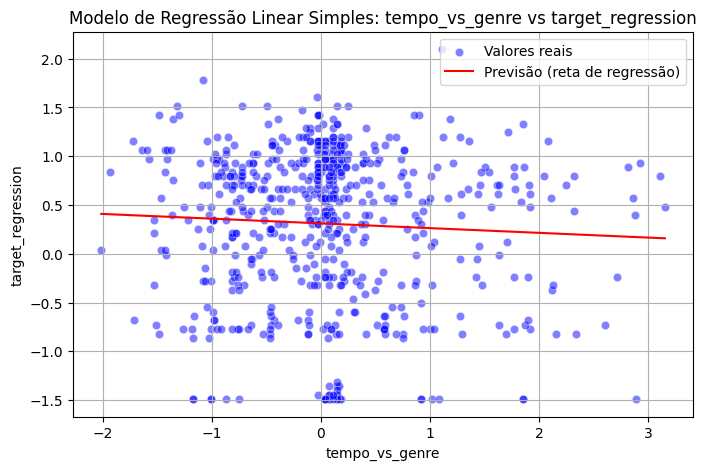

In [44]:
# Relação linear entre tempo_vs_genre e target_regression:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_test['tempo_vs_genre'], y=y_test, color='blue', alpha=0.5, label='Valores reais')
sns.lineplot(x=X_test['tempo_vs_genre'], y=y_pred, color='red', label='Previsão (reta de regressão)')
plt.xlabel('tempo_vs_genre')
plt.ylabel('target_regression')
plt.title('Modelo de Regressão Linear Simples: tempo_vs_genre vs target_regression')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
# Coeficientes da regressão linear
intercept = model.intercept_
inc = model.coef_[0]

print(f"Intercepto (β₀): {intercept:.4f}")
print(f"Inclinação (β₁): {inc:.4f}")

print(f"Fórmula de Relação Linear: target_regression = {intercept:.4f} + ({inc:.4f} x tempo_vs_genre)")


Intercepto (β₀): 0.3115
Inclinação (β₁): -0.0484
Fórmula de Relação Linear: target_regression = 0.3115 + (-0.0484 x tempo_vs_genre)


Para ``avaliar o desempenho dos modelos de regressão linear simples``, foi utilizado o ``RSS (Residual Sum of Squares)``, que ``mede o erro total`` entre os ``valores reais`` e as ``previsões``.
Este método tem a vantagem de ser simples e baseado diretamente nos ``resíduos do modelo``, sem depender de métricas normalizadas como ``R²``, ``MAE`` ou ``RMSE``.
É também de notar que: ``Valores mais baixos de RSS`` indicam um modelo com ``melhor ajuste aos dados``.

In [46]:
# Calcular resíduos do modelo
res = y_test - y_pred

# Calcular RSS
RSS = np.sum(res `` 2)
print(f"Valor de RSS: {RSS:.2f}")

Valor de RSS: 351.42


Um valor de ``RSS elevado``, neste caso ``351.42``, ``sugere`` que a variável ``tempo_vs_genre não tem uma boa correlação com a variável target_regression``.
No entanto, este valor apenas fará sentido quando comparado ao ``RSS obtido por outras features``.

### 2.1.2 Testar um modelo utilizando diferentes features
Procedemos à ``avaliação de diferentes variáveis independentes`` com a finalidade de ``identificar`` qual delas representa o ``melhor desempenho`` na ``previsão da variável dependente "target_regression"``.
Para isto, são testadas ``várias features`` do dataset fornecido, identificando um ``modelo de regressão linear`` para cada uma delas e avaliando o seu respetivo ``desempenho`` através da ``métrica RSS``, permitindo que, no final, consigamos selecionar a ``variável independente`` que possua uma ``maior correlação`` com a ``variável dependente "target_regression"``.

Como visto na ``análise do dataset``, existem ``features`` que ``não`` são do ``tipo numérico``:

In [47]:
# Mostrar tipo de dados para cada coluna
print("Tipos de dados por coluna:\n")
for col, dtype in df.dtypes.items():
    print(f"{col}: {dtype}")


Tipos de dados por coluna:

duration_1: float64
duration_2: float64
duration_3: float64
duration_4: float64
duration_5: float64
loudness_level: float64
popularity_level: float64
tempo_class: float64
time_signature: float64
key_mode: float64
artist_song_count: float64
album_freq: float64
movement_index: float64
intensity_level: float64
verbal_density: float64
purity_score: float64
positivity_index: float64
activity_rate: float64
loudness_intensity: float64
happy_dance: float64
acoustics_instrumental: float64
artists_avg_popularity: float64
tempo_vs_genre: float64
energy_rank_pct: float64
loud_energy_ratio: float64
mood_pca: float64
mood_cluster: float64
acoustic_valence_mood_cluster: float64
explicit: float64
signal_strength: float64
mode_indicator: float64
focus_factor: float64
ambient_level: float64
key_sin: float64
key_cos: float64
duration_log: float64
duration_log_z: float64
time_signature_class_boolean: float64
loudness_yeo: float64
is_instrumental: float64
is_dance_hit: float64
t

Não foi possível ajustar a variável ``"target_class"`` para o ``tipo numérico`` e, por isso, decidimos ``filtrar os dados`` para ``percorrer apenas`` as ``colunas`` cujo tipo ``não`` fosse ``"object"``, ``excluindo assim a "target_class" de variável independente`` para o estudo dos modelos de regressão linear.  

In [48]:
    # Separar variável dependente ('target_regression')
    target = 'target_regression'
    features = [col for col in df.columns if col != target and df[col].dtype != 'object']

    # Dicionário para guardar os resultados
    results = []

    # Dividir dados em treino e teste (hold-out 80/20)
    X_train_full, X_test_full, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
    
    # Testar cada feature individualmente
    for feature in features:
        X_train = X_train_full[[feature]]
        X_test = X_test_full[[feature]]
        
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
  
        # Calcular métricas para cada feature
        rss = np.sum((y_test - y_pred) `` 2)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        # Guardar resultados das métricas calculadas
        results.append({
            'Feature': feature,
            'RSS': rss,
            'R²': r2,
            'MAE': mae,
            'RMSE': rmse
        })

Após a realização de ``todos os modelos de regressão linear simples``, tendo como ``variável dependente a "target_regression"`` e utilizando ``todas as restantes features individualmente como variáveis independentes``, foi possível criar uma ``tabela`` com os 10 melhores resultados obtidos.

In [49]:
# Converter para DataFrame e ordenar pelo menor RSS
results_df = pd.DataFrame(results).sort_values(by='RSS', ascending=True)

# Mostrar top 10 variáveis com melhor desempenho
print("Top 10 variáveis com menor RSS:")
display(results_df.head(10))

# Melhor variável segundo o RSS
best_feature = results_df.iloc[0]['Feature']
print(f"\nA variável com melhor desempenho (menor RSS) é: '{best_feature}'")

Top 10 variáveis com menor RSS:


Feature         RSS        R²       MAE      RMSE
21  artists_avg_popularity   98.547228  0.720417  0.228093  0.405272
6         popularity_level  263.744649  0.251745  0.489415  0.663004
11              album_freq  290.003842  0.177246  0.584032  0.695226
14          verbal_density  338.104446  0.040783  0.614358  0.750671
31            focus_factor  343.045141  0.026766  0.623345  0.756136
23         energy_rank_pct  343.209043  0.026301  0.618261  0.756317
29         signal_strength  343.357270  0.025880  0.617924  0.756480
46            signal_power  343.357270  0.025880  0.617924  0.756480
15            purity_score  344.742006  0.021952  0.621166  0.758004
39         is_instrumental  345.483345  0.019849  0.626055  0.758819


A variável com melhor desempenho (menor RSS) é: 'artists_avg_popularity'


Da análise desses resultados, verificou-se que a variável ``"artists_avg_popularity"`` apresentou o ``melhor desempenho global``, registando o ``menor valor de RSS (98.547228)`` comparativamente com as restantes variáveis, concluindo-se então que ``“artists_avg_popularity” é a variável independente mais adequada para representar o modelo de Regressão Linear Simples``, entre todas as analisadas.
Finalmente, foi possível calcular a ``equação do modelo escolhido``, sendo então representada por:

In [50]:
# Treinar o modelo com a melhor feature
best_feature = 'artists_avg_popularity'

X = df[[best_feature]]
y = df['target_regression']

model = LinearRegression()
model.fit(X, y)

# Obter coeficientes
intercept = model.intercept_
coef = model.coef_[0]

print(f"target_regression = {intercept:.4f} + ({coef:.4f} × artists_avg_popularity)")


target_regression = 0.0207 + (0.8273 × artists_avg_popularity)


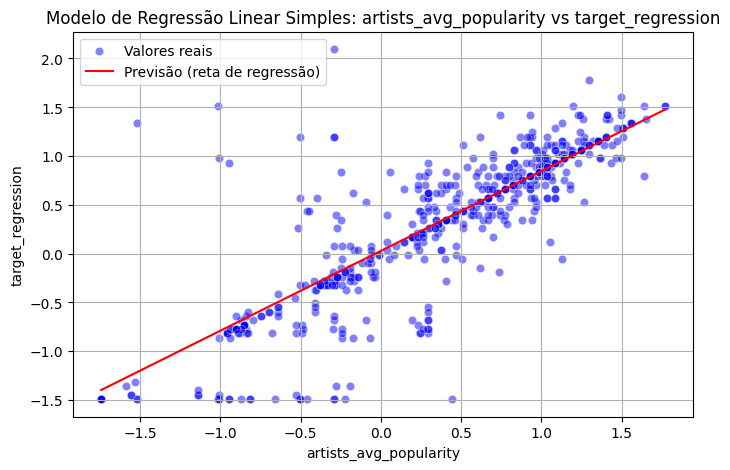

In [51]:
# Divisão treino/teste (para consistência no gráfico)
X_train, X_test, y_train, y_test = train_test_split(df[[best_feature]], df['target_regression'], test_size=0.2, random_state=42)

# Criar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Relação linear entre artists_avg_popularity e target_regression
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=X_test['artists_avg_popularity'], 
    y=y_test, 
    color='blue', 
    alpha=0.5, 
    label='Valores reais'
)
sns.lineplot(
    x=X_test['artists_avg_popularity'], 
    y=y_pred, 
    color='red', 
    label='Previsão (reta de regressão)'
)
plt.xlabel('artists_avg_popularity')
plt.ylabel('target_regression')
plt.title('Modelo de Regressão Linear Simples: artists_avg_popularity vs target_regression')
plt.legend()
plt.grid(True)
plt.show()

## 2.2 Regressão Linear Múltipla
Quando se fala em ``Regressão Linear Múltipla``, refere-se uma ``extensão da Regressão Linear Simples``, onde é possível analisar a ``relação`` entre ``uma variável dependente``, neste caso ``"target_regression"``, e ``duas ou mais variáveis independentes``.
O objetivo deste método é ``avaliar`` como a ``junção de várias features`` poderá possivelmente ``explicar o comportamento da variável dependente`` que está a ser analisada e, ao mesmo tempo, que ``influência (positiva ou negativa)`` poderá existir no ``desempenho do modelo`` com a ``inclusão de mais variáveis independentes``.
Para isto, é utilizada a seguinte ``expressão para demonstrar a relação entre as variáveis utilizadas``:

\\[
y^​=β0​+β1​X1​+β2​X2​+...+βn​Xn​
\\]

onde:

- y é o ``valor previsto`` da variável dependente,
- β0 é o termo de ``interceção``,
- βn é o ``coeficiente`` atribuído a cada variável independente Xn.

### 2.2.1 Testar um modelo utilizando várias features de áudio
Numa primeira fase, selecionam-se ``várias variáveis independentes aleatórias`` como, por exemplo:
- ``"tempo_vs_genre"``
- ``"energy_rank_pct"``
- ``"positivity_index"``
- ``"acoustics_instrumental"``
- ``"focus_factor"``

Permitindo, assim, construir um modelo de ``Regressão Linear Múltipla``, tendo como objetivo ``avaliar a relação conjunta`` destas features com a ``variável dependente "target_regression"``, verificando se a ``combinação de múltiplas características`` de áudio melhora a ``capacidade preditiva`` do modelo em comparação com a ``regressão linear simples`` anteriormente analisada.


In [52]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Features selecionadas para o modelo
features = [
    'tempo_vs_genre',
    'energy_rank_pct',
    'positivity_index',
    'acoustics_instrumental',
    'focus_factor'
]

# Criar fórmula para regressão
formula = 'target_regression ~ tempo_vs_genre + energy_rank_pct + positivity_index + acoustics_instrumental + focus_factor'

# Ajustar o modelo
est = smf.ols(formula=formula, data=df).fit()

Após a realização do modelo de ``Regressão Linear Múltipla``, para as variáveis enunciadas anteriormente, obteve-se os seguintes resultados:

In [53]:
# Resumo do modelo
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      target_regression   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     20.46
Date:                Sun, 02 Nov 2025   Prob (F-statistic):           3.90e-20
Time:                        15:05:10   Log-Likelihood:                -3430.7
No. Observations:                3000   AIC:                             6873.
Df Residuals:                    2994   BIC:                             6909.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.3767      0.019     19.558      0.000       0.339       0.414
tempo_vs_genre            -0.0374      0.017     -2.236      0.025      -0.070      -0.005
energy_rank_pct           -0.0408      0.017     -2.441      0.015      -0.074      -0.008
positivity_index          -0.0672      0.016     -4.107      0.000      -0.099      -0.035
acoustics_instrumental     0.0417      0.028      1.500      0.134      -0.013       0.096
focus_factor              -0.3626      0.052     -6.928      0.000      -0.465      -0.260
==============================================================================
Omnibus:                      174.599   Durbin-Watson:                   0.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.419
Skew:                          -0.635   Prob(JB):                     4.08e-45
Kurtosis:                       2.849   Cond. No.                         4.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Para garantir ainda que as variáveis ``não possuiam fortes correlações`` entre elas, criou-se a ``matriz de correlação`` das mesmas, obtendo-se os seguintes resultados:

In [54]:
# Matriz de correlação entre as variáveis independentes
corr_matrix = df[features].corr()

print("Correlação entre as variáveis independentes:")
display(corr_matrix)


Correlação entre as variáveis independentes:


tempo_vs_genre  energy_rank_pct  positivity_index  \
tempo_vs_genre                1.000000         0.075141          0.062610   
energy_rank_pct               0.075141         1.000000          0.171906   
positivity_index              0.062610         0.171906          1.000000   
acoustics_instrumental       -0.028407        -0.150147         -0.074605   
focus_factor                  0.013809         0.277719         -0.241805   

                        acoustics_instrumental  focus_factor  
tempo_vs_genre                       -0.028407      0.013809  
energy_rank_pct                      -0.150147      0.277719  
positivity_index                     -0.074605     -0.241805  
acoustics_instrumental                1.000000      0.406774  
focus_factor                          0.406774      1.000000

Após observar a matriz criada, é possível entender-se que:
- ``Não há correlações fortes`` entre as variáveis independentes (nenhum valor próximo de 0.8);

- Apenas a relação entre ``acoustics_instrumental`` e ``focus_factor`` (0.41) mostra alguma associação moderada;

Assim sendo, isto significa que não existe um grande ``fator de correlação`` entre as features, o que é ótimo para o modelo de ``regressão linear múltipla``.

No entanto, apesar de tudo isto e segundo a análise que foi possível realizar aos resultados obtidos na tabela de resultados do modelo de ``Regressão Linear Múltipla (OLS)``, o modelo é ``estatisticamente significativo``, mas com ``baixo poder de previsão (R² = 0.033)``.

### 2.2.2 Testar um modelo utilizando diferentes conjuntos de features
Com o objetivo de encontrar o melhor modelo possível, decidimos testar diferentes ``combinações de variáveis independentes`` de modo a identificar o ``grupo`` que ``melhor se relaciona`` com a variável dependente ``"target_regression"``.
Para esta finalidade, vamos usar as ``10 melhores variáveis`` que foram encontradas na ``regressão linear simples`` analisada anteriormente.

Para testar todas estas combinações e não sobrecarregar o processo de escolha, focamo-nos apenas em combinações de 2 a 8 elementos dentro deste conjunto de dados.

In [55]:
#Libraria para facilitar combinações de elementos
from itertools import combinations

# Variável dependente
target = 'target_regression'

# Top 10 melhores features da regressão simples (ordem que referiste)
best_features = [
    'artists_avg_popularity',
    'popularity_level',
    'album_freq',
    'verbal_density',
    'focus_factor',
    'energy_rank_pct',
    'positivity_index',
    'intensity_level',
    'tempo_vs_genre',
    'acoustics_instrumental'
]

# Divisão treino/teste
from sklearn.model_selection import train_test_split
X_train_full, X_test_full, y_train, y_test = train_test_split(df[best_features], df[target], test_size=0.2, random_state=42)

# Guardar resultados
results = []

# Testar combinações de 2 a 8 variáveis
for k in range(2, 9):
    for combo in combinations(best_features, k):
        X_train = X_train_full[list(combo)]
        X_test = X_test_full[list(combo)]

        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        rss = np.sum((y_test - y_pred)``2)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        results.append({
            'Features': combo,
            'RSS': rss,
            'R²': r2,
            'MAE': mae,
            'RMSE': rmse
        })

# Converter para DataFrame e ordenar por R²
results_dfm = pd.DataFrame(results).sort_values(by='R²', ascending=False)

#Aumentar a largura da coluna para se poder observar todas as features utilizadas
pd.set_option('display.max_colwidth', None)

# Mostrar as melhores combinações
print("Combinações com melhor desempenho:")
display(results_dfm.head())


Combinações com melhor desempenho:


Features  \
959  (artists_avg_popularity, popularity_level, album_freq, verbal_density, focus_factor, energy_rank_pct, positivity_index, acoustics_instrumental)   
964  (artists_avg_popularity, popularity_level, album_freq, verbal_density, focus_factor, positivity_index, intensity_level, acoustics_instrumental)   
628                                           (artists_avg_popularity, popularity_level, album_freq, verbal_density, focus_factor, positivity_index)   
843                   (artists_avg_popularity, popularity_level, album_freq, verbal_density, focus_factor, positivity_index, acoustics_instrumental)   
837                          (artists_avg_popularity, popularity_level, album_freq, verbal_density, focus_factor, energy_rank_pct, positivity_index)   

           RSS        R²       MAE      RMSE  
959  80.983187  0.770247  0.234085  0.367385  
964  80.987302  0.770235  0.234221  0.367395  
628  80.989106  0.770230  0.234259  0.367399  
843  80.990383  0.770227  0.234256  0.367402  
837  80.990953  0.770225  0.234083  0.367403

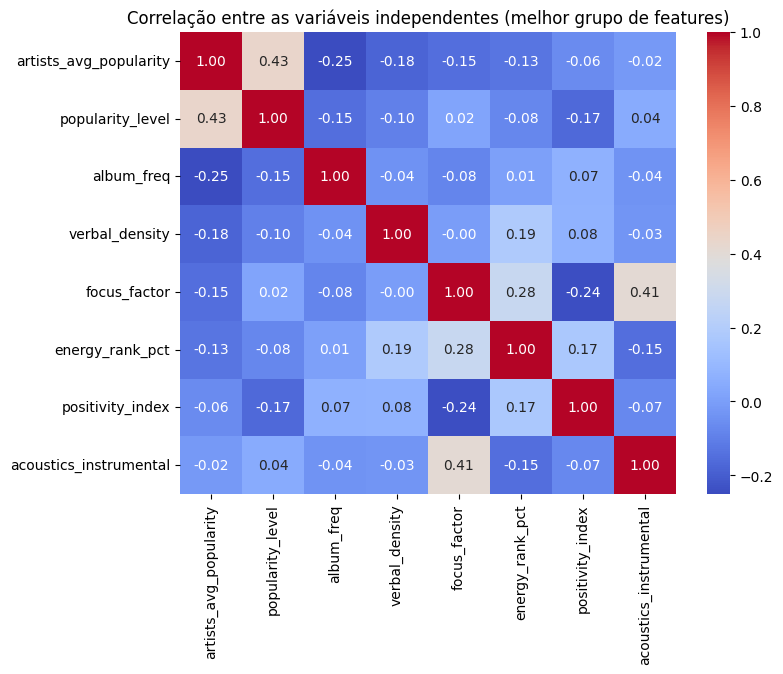

In [56]:
best_features = [
    'artists_avg_popularity', 
    'popularity_level', 
    'album_freq', 
    'verbal_density', 
    'focus_factor', 
    'energy_rank_pct',
    'positivity_index', 
    'acoustics_instrumental'
]

# Matriz de correlação das variáveis independentes
corr_matrix = df[best_features].corr()

# Visualização com das coorelações com heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlação entre as variáveis independentes (melhor grupo de features)")
plt.show()


Após todas as combinações testadas, o modelo que inclui o ``grupo de variáveis (artists_avg_popularity, popularity_level, album_freq, verbal_density, focus_factor, energy_rank_pct, positivity_index, acoustics_instrumental)``, apresentou o ``melhor desempenho``, com ``RSS = 80.983187``, sendo este o mais ``baixo`` entre todos os outros valores. 
Verificou-se também que a ``matriz de correlação`` mostra que ``não existem correlações elevadas`` entre as variáveis independentes, o que é benéfico para a ``estabilidade`` e ``fiabilidade`` do modelo de regressão linear múltipla.

Este resultado demonstra que estas variáveis, em conjunto, possuem o maior poder de previsão sobre a variável dependente "target_regression", sendo a ``combinação mais adequada`` para o modelo final de ``Regressão Linear Múltipla``.

# 3 Comparação e Discussão de Resultados

## 3.1 Avaliação e Comparação dos Modelos
Os modelos foram avaliados, primeiramente, através da métrica ``RSS (Residual Sum of Squares)``.
No entanto, à medida que fomos obtendo os resultados, fomos também anotando os valores de ``outras métricas relevantes``, tais como: ``R² (Coeficiente de Determinação)``, ``MAE (Mean Absolute Error)`` e ``RMSE (Root Mean Squared Error)``.
Estas ``métricas`` permitem compreender o ``desempenho dos modelos`` em termos de ``ajustes`` e ``erros de previsão``.

In [63]:
from IPython.display import display

# Melhores resultados
simple_best = {
    'Modelo': 'Linear Simples',
    'Features': 'artists_avg_popularity',
    'RSS': 98.547,
    'R²': 0.720,
    'MAE': 0.228,
    'RMSE': 0.405
}

multiple_best = {
    'Modelo': 'Linear Múltipla',
    'Features': 'artists_avg_popularity, popularity_level, album_freq, verbal_density, focus_factor, energy_rank_pct, positivity_index, acoustics_instrumental',
    'RSS': 80.983,
    'R²': 0.770,
    'MAE': 0.234,
    'RMSE': 0.367
}

# Criar DataFrame lado a lado
model_comparison = pd.DataFrame({
    'Métrica': ['Features', 'RSS', 'R²', 'MAE', 'RMSE'],
    'Linear Simples': [
        simple_best['Features'],
        simple_best['RSS'],
        simple_best['R²'],
        simple_best['MAE'],
        simple_best['RMSE']
    ],
    'Linear Múltipla': [
        multiple_best['Features'],
        multiple_best['RSS'],
        multiple_best['R²'],
        multiple_best['MAE'],
        multiple_best['RMSE']
    ]
})

# Mostrar
print("Regressão Linear Simples vs Múltipla")
display(model_comparison)


Regressão Linear Simples vs Múltipla


Métrica          Linear Simples  \
0  Features  artists_avg_popularity   
1       RSS                  98.547   
2        R²                    0.72   
3       MAE                   0.228   
4      RMSE                   0.405   

                                                                                                                                 Linear Múltipla  
0  artists_avg_popularity, popularity_level, album_freq, verbal_density, focus_factor, energy_rank_pct, positivity_index, acoustics_instrumental  
1                                                                                                                                         80.983  
2                                                                                                                                           0.77  
3                                                                                                                                          0.234  
4                                                                                                                                          0.367

Após a recolha dos dois melhores modelos, é possível retirar que:
- O modelo de ``Regressão Linear Múltipla`` apresenta um ``R² superior (0.77)`` em relação à ``regressão simples (0.72)``, o que indica uma ``melhor`` capacidade de ``explicação da variabilidade`` da variável dependente ``"target_regression"``.

- O ``RSS`` e o ``RMSE`` são mais ``baixos`` no modelo de ``regressão linear múltipla``, o que confirma um ``melhor ajuste global`` e ``previsões mais precisas``.

- Contrariamente, o ``MAE`` é ``ligeiramente inferior no modelo simples (0.228 vs 0.234)``, sugerindo que, ``em média``, o ``erro absoluto`` é um pouco ``menor`` quando ``apenas`` a variável ``artists_avg_popularity`` é usada.

## 3.2 Discussão de Resultados
Após toda a análise dos resultados obtidos, o modelo de Regressão Linear Múltipla apresenta ser mais adequado pois: 
- O ``R² aumenta de 0.72 para 0.77``, indicando que a ``regressão múltipla explica uma maior proporção da variabilidade da variável dependente "target_regression"``;
- Os valores de ``RSS`` e ``RMSE são mais baixos na regressão múltipla``, reforçando a ``melhoria do ajuste global do modelo``.
- O ``MAE`` é ``ligeiramente inferior no modelo simples (0.228 vs 0.234)``, porém essa diferença é ``pouco significativa`` quando comparada com o ``ganho em predicabilidade e robustez do modelo múltiplo``.
- Combina ``várias variáveis independentes relevantes``, permitindo uma ``previsão mais precisa`` e ``completa`` em relação à variável dependente.


# 4. Classification LR, LDA e QDA

## 4.1 Preparação dos dados (X, y) e features
Escolher target_class e as features.  
Remover colunas sem variância.  

In [89]:
# Configurações básicas
features = [
    'duration_1','duration_2','duration_3','duration_4','duration_5',
    'loudness_level','popularity_level','tempo_class','time_signature',
    'key_mode','artist_song_count','album_freq','movement_index',
    'intensity_level','verbal_density','purity_score','positivity_index',
    'activity_rate','loudness_intensity','happy_dance','acoustics_instrumental',
    'artists_avg_popularity','tempo_vs_genre','energy_rank_pct','loud_energy_ratio',
    'mood_pca','mood_cluster','acoustic_valence_mood_cluster','explicit',
    'signal_strength','mode_indicator','focus_factor','ambient_level','key_sin',
    'key_cos','duration_log','duration_log_z','time_signature_class_boolean',
    'loudness_yeo','is_instrumental','is_dance_hit','temp_zscore','resonance_factor',
    'timbre_index','echo_constant','distorted_movement','signal_power'
]
target_column = "target_class"
use_cols = [c for c in features if c in df.columns]

# X e y
X = df[use_cols].copy()
y = df[target_column].copy()

# Codificar y se for categórico textual
from sklearn.preprocessing import LabelEncoder
import numpy as np, pandas as pd


# Remover linhas com NaN e colunas constantes
mask = X.notna().all(axis=1)
X, y = X.loc[mask].copy(), np.asarray(y)[mask]
const_cols = [c for c in X.columns if X[c].nunique(dropna=True) <= 1]
if const_cols:
    X = X.drop(columns=const_cols)
    print("Removidas por ausência de variância:", const_cols)

print("X:", X.shape, "| y:", y.shape)


Removidas por ausência de variância: ['echo_constant']
X: (3000, 46) | y: (3000,)


## 4.2 Modelos e Pipelines
Usar StandardScaler dentro do Pipeline para evitar data leakage.  
QDA com reg_param pequeno para estabilidade

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

models = {
    "LogReg": Pipeline([("scaler", StandardScaler()),
                        ("clf", LogisticRegression(max_iter=2000))]),
    "LDA":    Pipeline([("scaler", StandardScaler()),
                        ("clf", LDA())]),
    "QDA":    Pipeline([("scaler", StandardScaler()),
                        ("clf", QDA(reg_param=0.01))]),
}


## 4.3 Holdout (20% teste estratificado)
Primeira fotografia fora da amostra.  
Guardar Accuracy e F1-macro, imprimir matriz de confusão.

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

holdout_rows = []
for name, pipe in models.items():
    pipe.fit(X_tr, y_tr)
    y_pred = pipe.predict(X_te)
    acc = accuracy_score(y_te, y_pred)
    f1m = f1_score(y_te, y_pred, average="macro")
    holdout_rows.append([name, acc, f1m])

    print(f"\n=== {name} (Holdout) ===")
    print(f"Accuracy: {acc:.3f} | F1-macro: {f1m:.3f}")
    print("Confusion matrix:\n", confusion_matrix(y_te, y_pred))
    print(classification_report(y_te, y_pred, digits=3))

import pandas as pd
holdout_df = pd.DataFrame(holdout_rows, columns=["Model","Accuracy","F1_macro"])
holdout_df



=== LogReg (Holdout) ===
Accuracy: 0.883 | F1-macro: 0.884
Confusion matrix:
 [[182   3  15]
 [  6 175  19]
 [  9  18 173]]
              precision    recall  f1-score   support

     class_1      0.924     0.910     0.917       200
    class_18      0.893     0.875     0.884       200
    class_24      0.836     0.865     0.850       200

    accuracy                          0.883       600
   macro avg      0.884     0.883     0.884       600
weighted avg      0.884     0.883     0.884       600


=== LDA (Holdout) ===
Accuracy: 0.772 | F1-macro: 0.771
Confusion matrix:
 [[163  13  24]
 [ 26 133  41]
 [  6  27 167]]
              precision    recall  f1-score   support

     class_1      0.836     0.815     0.825       200
    class_18      0.769     0.665     0.713       200
    class_24      0.720     0.835     0.773       200

    accuracy                          0.772       600
   macro avg      0.775     0.772     0.771       600
weighted avg      0.775     0.772     0.771   

Model  Accuracy  F1_macro
0  LogReg  0.883333  0.883613
1     LDA  0.771667  0.770534
2     QDA  0.805000  0.801061

## 4.4 Cross-Validation (k=5 e k=10)
Estimativa mais estável do desempenho.  
Reportar média ± desvio-padrão para Accuracy e F1-macro.

In [92]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

def cv_summary(model, X, y, k):
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    acc = cross_val_score(model, X, y, cv=cv, scoring="accuracy", n_jobs=-1)
    f1m = cross_val_score(model, X, y, cv=cv, scoring="f1_macro", n_jobs=-1)
    return acc.mean(), acc.std(ddof=1), f1m.mean(), f1m.std(ddof=1)

rows = []
for k in (5, 10):
    for name, pipe in models.items():
        acc_m, acc_s, f1_m, f1_s = cv_summary(pipe, X, y, k)
        rows.append([f"CV{k}", name, acc_m, acc_s, f1_m, f1_s])

cv_df = pd.DataFrame(rows, columns=["Method","Model","Acc_mean","Acc_std","F1m_mean","F1m_std"])
cv_df


Method   Model  Acc_mean   Acc_std  F1m_mean   F1m_std
0    CV5  LogReg  0.910333  0.006169  0.910396  0.006331
1    CV5     LDA  0.795000  0.010865  0.794284  0.010515
2    CV5     QDA  0.782667  0.015074  0.774252  0.016376
3   CV10  LogReg  0.917667  0.007706  0.917743  0.007708
4   CV10     LDA  0.795000  0.014845  0.794046  0.015543
5   CV10     QDA  0.784333  0.015951  0.776447  0.017424

## 4.5 LOOCV (Leave-One-Out)
Muito caro computacionalmente (≈N fits).  
Útil para analisar viés/variância, mas pode ter alta variância.

In [93]:
# AVISO: pode demorar muito.
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
rows = []
for name, pipe in models.items():
     acc = cross_val_score(pipe, X, y, cv=loo, scoring="accuracy", n_jobs=-1)
     f1m = cross_val_score(pipe, X, y, cv=loo, scoring="f1_macro", n_jobs=-1)
     rows.append(["LOOCV", name, acc.mean(), acc.std(ddof=1), f1m.mean(), f1m.std(ddof=1)])
loocv_df = pd.DataFrame(rows, columns=["Method","Model","Acc_mean","Acc_std","F1m_mean","F1m_std"])
loocv_df


Method   Model  Acc_mean   Acc_std  F1m_mean   F1m_std
0  LOOCV  LogReg  0.918667  0.273392  0.918667  0.273392
1  LOOCV     LDA  0.793333  0.404982  0.793333  0.404982
2  LOOCV     QDA  0.783000  0.412271  0.783000  0.412271

## 4.6 Bootstrap (B reamostragens, OOB para teste)

Dá distribuição empírica do desempenho (média/DP).  
Bom para comparar incerteza entre modelos.

In [94]:
rng = np.random.default_rng(42)
B = 200  # 200 costuma ser suficiente
boot_rows = []

for name, pipe in models.items():
    acc_list, f1_list = [], []
    for b in range(B):
        idx = rng.integers(0, len(X), size=len(X))  # amostra com reposição
        oob = np.ones(len(X), dtype=bool); oob[idx] = False
        if oob.sum() == 0:  # todas amostradas -> não há OOB
            continue
        pipe.fit(X.iloc[idx], y[idx])
        y_pred = pipe.predict(X.iloc[oob])
        y_true = y[oob]
        acc_list.append(accuracy_score(y_true, y_pred))
        f1_list.append(f1_score(y_true, y_pred, average="macro"))
    boot_rows.append(["Bootstrap", name,
                      np.mean(acc_list), np.std(acc_list, ddof=1),
                      np.mean(f1_list), np.std(f1_list, ddof=1)])

boot_df = pd.DataFrame(boot_rows, columns=["Method","Model","Acc_mean","Acc_std","F1m_mean","F1m_std"])
boot_df


Method   Model  Acc_mean   Acc_std  F1m_mean   F1m_std
0  Bootstrap  LogReg  0.913696  0.009980  0.913754  0.009946
1  Bootstrap     LDA  0.792367  0.010508  0.791576  0.010523
2  Bootstrap     QDA  0.788283  0.013748  0.781326  0.015008

## 4.7 Tabela-resumo conjunta
Juntar Holdout, CV, (opcional) LOOCV e Bootstrap.  
Ordenar por Accuracy ou F1-macro.

In [95]:
tables = [
    holdout_df.assign(Method="Holdout")
              .rename(columns={"Accuracy":"Acc_mean","F1_macro":"F1m_mean"})
              .assign(Acc_std=np.nan, F1m_std=np.nan)[["Method","Model","Acc_mean","Acc_std","F1m_mean","F1m_std"]],
    cv_df,
    # loocv_df,  # se tiveres corrido
    boot_df
]

summary = pd.concat(tables, ignore_index=True)
summary.sort_values(["Method","Acc_mean"], ascending=[True, False])


Method   Model  Acc_mean   Acc_std  F1m_mean   F1m_std
9   Bootstrap  LogReg  0.913696  0.009980  0.913754  0.009946
10  Bootstrap     LDA  0.792367  0.010508  0.791576  0.010523
11  Bootstrap     QDA  0.788283  0.013748  0.781326  0.015008
6        CV10  LogReg  0.917667  0.007706  0.917743  0.007708
7        CV10     LDA  0.795000  0.014845  0.794046  0.015543
8        CV10     QDA  0.784333  0.015951  0.776447  0.017424
3         CV5  LogReg  0.910333  0.006169  0.910396  0.006331
4         CV5     LDA  0.795000  0.010865  0.794284  0.010515
5         CV5     QDA  0.782667  0.015074  0.774252  0.016376
0     Holdout  LogReg  0.883333       NaN  0.883613       NaN
2     Holdout     QDA  0.805000       NaN  0.801061       NaN
1     Holdout     LDA  0.771667       NaN  0.770534       NaN

## 3.8 Discussão: qual método e porquê?
``Melhor desempenho médio``

Accuracy / F1-macro (média):
- LogReg ≈ 0,91 / 0,91
- LDA ≈ 0,79 / 0,79
- QDA ≈ 0,79–0,80 / 0,78  

Em Holdout, CV-5, CV-10 e Bootstrap a Regressão Logística foi sistematicamente a melhor.

``Menor variância (mais estável)``
Desvios-padrão (Acc/F1) da LogReg são os mais baixos (≈ 0,009–0,014), inferiores aos de LDA/QDA.  
Em LOOCV a variância sobe para todos (característica do método), mas a LogReg continua superior em média.  

``Suposições do modelo``

- LDA/QDA assumem normalidade por classe, o nosso conjunto tem muitas variáveis binárias e contínuas não-normais, o que viola as premissas e explica o pior desempenho/maior variância (QDA sofre mais por estimar covariâncias por classe).
- LogReg não exige normalidade, lida bem com mistura de preditores e usa regularização, reduzindo sobre-ajuste.

``Classes equilibradas``
As três classes estão ~33,3% cada; Accuracy e F1-macro são métricas apropriadas. A LogReg lidera em ambas.

### Efeito dos métodos de reamostragem (resumo)

``Holdout``: estimativa mais ruidosa; resultados da LogReg já são altos (~0,91), mas com maior incerteza que CV/Bootstrap.  
``CV-5 vs CV-10``: CV-10 reduz ligeiramente a variância; médias praticamente iguais (LogReg ~0,912 Acc).  
``LOOCV``: maior variância (std elevado) — esperado pelo alto número de “fits” com treino muito pequeno.  
``Bootstrap``: médias muito próximas das de CV e os menores desvios-padrão (LogReg ≈ 0,009–0,010), indicando boa estabilidade.

### Conclusão
Escolhemos a ``Regressão Logística`` como método principal: melhor Accuracy/F1-macro de forma consistente e com menor variância em quase todos os esquemas de reamostragem, além de premissas mais adequadas aos dados e boa interpretabilidade (coeficientes/probabilidades).

## 4.9 Análise de erros
Matriz de confusão normalizada do modelo de Regressão Logistica

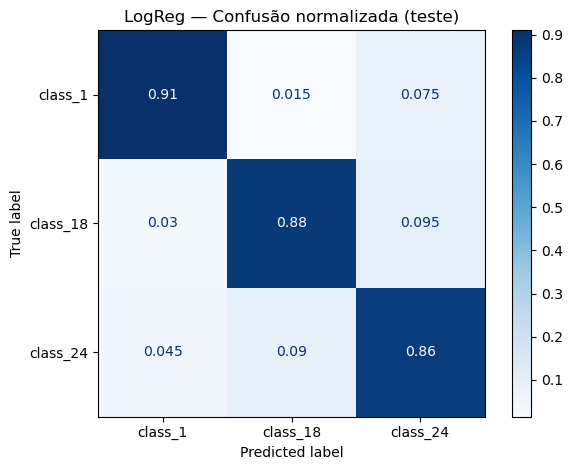

In [96]:
best_name = "LogReg" 
pipe = models[best_name].fit(X_tr, y_tr)
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = pipe.predict(X_te)
disp = ConfusionMatrixDisplay.from_predictions(y_te, y_pred, normalize="true", cmap="Blues")
plt.title(f"{best_name} — Confusão normalizada (teste)")
plt.tight_layout(); plt.show()


# 5 Seleção de Característica Ridge (L2) vs Lasso (L1)

## 5.1 Preparação do dataset

In [106]:
# Define a coluna-alvo e separa features (X) e target (y)
TARGET = "target_class"
X = df.drop(columns=[TARGET]).copy()
y = df[TARGET].copy()

from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import numpy as np, pandas as pd

# Faz CV estratificada e devolve médias e desvios de Accuracy e F1 Macro
def cv_scores(model, X, y, k=5):
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    acc = cross_val_score(model, X, y, cv=cv, scoring="accuracy", n_jobs=-1)
    f1m = cross_val_score(model, X, y, cv=cv, scoring="f1_macro", n_jobs=-1)
    return acc.mean(), acc.std(ddof=1), f1m.mean(), f1m.std(ddof=1)

# Executa cv_scores para diferentes k e agrega em linhas para um DataFrame final
def summarize(nome, modelo, X, y, ks=(5,10)):
    rows = []
    for k in ks:
        acc_m, acc_s, f1_m, f1_s = cv_scores(modelo, X, y, k=k)
        rows.append([nome, f"CV{k}", acc_m, acc_s, f1_m, f1_s])
    return rows

results = []


## 5.2 Baseline Ridge (L2) - Todas as características
L2 reduz variância, não faz seleção.

In [107]:
# Pipeline para Regressão Logística com L2 (Ridge):
# StandardScaler → LogisticRegression (penalização L2). O scaler evita que a regularização favoreça features maiores.
pipe_l2 = Pipeline([
    ("scaler", StandardScaler()), 
    ("clf", LogisticRegression(max_iter=2000, penalty="l2", solver="lbfgs"))
])

# Grade de C (força de regularização): C menor = mais regularização
param_l2 = {"clf__C": np.logspace(-3, 2, 8)}

# GridSearchCV otimiza C com CV estratificada e métrica F1 Macro
gs_l2 = GridSearchCV(pipe_l2, param_l2, 
                     cv=StratifiedKFold(5, shuffle=True, random_state=42),
                     scoring="f1_macro", n_jobs=-1)
gs_l2.fit(X, y)

# Guarda desempenho do melhor estimador L2 em CV de 5 e 10 folds
results += summarize("LogReg - Ridge (L2)", gs_l2.best_estimator_, X, y)



## 5.3 Lasso (L1) — modelo esparso
L1 zera coeficientes redundantes resultando em menos features.

In [108]:
# Pipeline para Regressão Logística com L1 (Lasso):
# Usa solver 'saga' (necessário para L1); max_iter maior para garantir convergência
pipe_l1 = Pipeline([
    ("scaler", StandardScaler()), 
    ("clf", LogisticRegression(max_iter=10000, penalty="l1", solver="saga"))
])
# Mesma grade de C para L1
param_l1 = {"clf__C": np.logspace(-3, 2, 8)}

# GridSearch para L1 com F1 Macro
gs_l1 = GridSearchCV(pipe_l1, param_l1,
                     cv=StratifiedKFold(5, shuffle=True, random_state=42),
                     scoring="f1_macro", n_jobs=-1)
gs_l1.fit(X, y)

# Guarda desempenho do melhor estimador L1
results += summarize("LogReg - Lasso (L1)", gs_l1.best_estimator_, X, y)

# Contabiliza features "ativas" no modelo L1 (coeficientes != 0 após treino)
scaler = gs_l1.best_estimator_.named_steps["scaler"]
clf_l1  = gs_l1.best_estimator_.named_steps["clf"]
X_scaled = scaler.fit_transform(X) # ajuste do scaler (coerente com pipeline)
n_ativos = (np.abs(clf_l1.coef_) > 1e-8).sum(axis=1).mean()  # média por classe
print(f"[L1] features ativas (média por classe): {n_ativos:.1f} / {X.shape[1]}")


[L1] features ativas (média por classe): 46.7 / 49


## 5.4 Tabela final

In [109]:
# DataFrame final com métricas agregadas e ordenado por F1 Macro e Accuracy
res_df = pd.DataFrame(results, columns=["Modelo","Método","Acc_mean","Acc_std","F1m_mean","F1m_std"])\
           .sort_values(["F1m_mean","Acc_mean"], ascending=False)\
           .reset_index(drop=True)
res_df

Modelo Método  Acc_mean   Acc_std  F1m_mean   F1m_std
0  LogReg - Ridge (L2)    CV5  0.996333  0.004625  0.996333  0.004625
1  LogReg - Ridge (L2)   CV10  0.996333  0.004289  0.996332  0.004290
2  LogReg - Lasso (L1)   CV10  0.988333  0.005720  0.988337  0.005715
3  LogReg - Lasso (L1)    CV5  0.987000  0.006912  0.987004  0.006905

## 5.5 Conclusão
### Resultados (médias em CV5/CV10):
- Ridge (L2): Acc ≈ 0,9963, F1-macro ≈ 0,9963, baixa variância (std ≈ 0,004–0,005).
- Lasso (L1): Acc ≈ 0,988–0,986, F1-macro ≈ 0,988–0,986, variância ligeiramente maior.

``Ridge (L2)`` é o melhor método neste conjunto de dados, maior acurácia/F1 e mais estável (menor desvio-padrão).
``O Lasso (L1)`` faz seleção de variáveis, mas nesta tarefa a eliminação de coeficientes retirou sinais úteis (muitas features parecem contribuir, várias correlacionadas), causando perda de desempenho.

O desempenho de L2 sugere que:
- Há múltiplas features informativas
- Multicolinearidade existe, mas L2 lida bem penalizando sem zerar coeficientes
- Overfitting está controlado (baixa variância em CV).

### Resposta à hipótese “menos features conseguem melhor resultado?”

Neste caso, não. O L1 (modelo esparso) não supera o L2.  

``Modelo final``: Regressão Logística com Ridge (L2) e C ajustado via CV estratificada.

# APRAU PARTE 2

In [1]:
# Primeiros Imports
import numpy as np
import pandas as pd

# Load data
df = pd.read_csv("Data/group_22.csv")

# Substituir vírgulas por pontos e converter para float
df['focus_factor'] = df['focus_factor'].astype(str).str.replace(',', '.', regex=False)
df['focus_factor'] = df['focus_factor'].astype(float)

# Confirmar a conversão
print("focus_factor é do tipo:", df['focus_factor'].dtype)

feature_cols = [c for c in df.columns if c not in ["target_class", "target_regression"]]
X = df[feature_cols].values
y = df["target_class"].values

focus_factor é do tipo: float64


## 6 Generalized Additive Models (GAM)

In [2]:
# GAM one-vs-rest

# Classes em análise
classes = sorted(df["target_class"].dropna().astype(str).unique().tolist())
print(classes)

['class_1', 'class_18', 'class_24']


In [4]:
#pip install pygam

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

# GAM (pygam)
from pygam import LogisticGAM, s

print("Formato de X:", X.shape)
print("Exemplo de classes:", classes)

# normalizar X antes de passar para a LogisticGAM  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Configuração Cross Validation (default: 5-fold)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

n_features = X.shape[1]

# limitar a um número máximo (ex.: 15) para simplificar e evitar problemas numéricos
# em vez de usar TODAS as features em s()
max_terms = min(15, n_features)

terms = s(0)
for i in range(1, max_terms):  # usar só até max_terms
    terms = terms + s(i)

# lista para guardar resultados
results = []

# loop pelas classes (one vs rest)
for t_class in classes:
    print(f"\n=== GAM for {t_class} vs rest ===")
    
    # Binary target: 1 if this class, 0 otherwise
    y_binary = (y == t_class).astype(int)
    
    fold_accuracies = []
    fold_f1s = []
    fold_aucs = []

    # Cross-validation manual (stratifiedKfold)
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X_scaled, y_binary), start=1):
        X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
        y_train, y_val = y_binary[train_idx], y_binary[val_idx]

        # inside CV loop:
        # lam para controlar a suavização (mais alto = menos overfitting)
        gam = LogisticGAM(terms=terms, lam=1, max_iter=100)
        gam.fit(X_train, y_train)
        
        # Predictions
        proba = gam.predict_proba(X_val)
        y_pred = (proba > 0.5).astype(int)

        # Métricas
        acc = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred, zero_division=0)
        
        # AUC (handle degenerate cases)
        try:
            auc = roc_auc_score(y_val, proba)
        except ValueError:
            auc = np.nan
        
        fold_accuracies.append(acc)
        fold_f1s.append(f1)
        fold_aucs.append(auc)
        
        print(f"Fold {fold}: acc={acc:.3f}, f1={f1:.3f}, auc={auc:.3f}")
    
    # Médias desta classe
    mean_acc = np.nanmean(fold_accuracies)
    mean_f1 = np.nanmean(fold_f1s)
    mean_auc = np.nanmean(fold_aucs)
    
    print(f"Mean CV metrics for {t_class}: "
          f"accuracy={mean_acc:.3f}, F1={mean_f1:.3f}, AUC={mean_auc:.3f}")
    
    results.append({
        "class": t_class,
        "mean_accuracy": mean_acc,
        "mean_f1": mean_f1,
        "mean_auc": mean_auc,
    })

# Converter resultados para DataFrame e apresentar
results_df = pd.DataFrame(results)
print("\nResumo final das 3 hipóteses (classe vs resto):")
print(results_df)


Formato de X: (3000, 47)
Exemplo de classes: ['class_1', 'class_18', 'class_24']

=== GAM for class_1 vs rest ===
Fold 1: acc=0.820, f1=0.726, auc=0.892
Fold 2: acc=0.817, f1=0.719, auc=0.900
Fold 3: acc=0.828, f1=0.727, auc=0.880
Fold 4: acc=0.830, f1=0.724, auc=0.895
Fold 5: acc=0.802, f1=0.663, auc=0.879
Mean CV metrics for class_1: accuracy=0.819, F1=0.712, AUC=0.889

=== GAM for class_18 vs rest ===
Fold 1: acc=0.763, f1=0.572, auc=0.846
Fold 2: acc=0.797, f1=0.665, auc=0.856
Fold 3: acc=0.807, f1=0.674, auc=0.861
Fold 4: acc=0.783, f1=0.626, auc=0.854
Fold 5: acc=0.770, f1=0.601, auc=0.838
Mean CV metrics for class_18: accuracy=0.784, F1=0.628, AUC=0.851

=== GAM for class_24 vs rest ===
Fold 1: acc=0.818, f1=0.727, auc=0.887
Fold 2: acc=0.827, f1=0.740, auc=0.903
Fold 3: acc=0.838, f1=0.757, auc=0.907
Fold 4: acc=0.830, f1=0.734, auc=0.907
Fold 5: acc=0.835, f1=0.746, auc=0.916
Mean CV metrics for class_24: accuracy=0.830, F1=0.741, AUC=0.904

Resumo final das 3 hipóteses (class

In [6]:
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     51.7911
Link Function:                        LogitLink Log Likelihood:                                  -834.3004
Number of Samples:                         2400 AIC:                                              1772.183
                                                AICc:                                            1774.6037
                                                UBRE:                                               2.7557
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.4539
Feature Function                  Lam

C:\Users\mferr\AppData\Local\Temp\ipykernel_41512\3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


### Análise dos resultados do GAM
Foram estimados três modelos Logistic GAM num enquadramento one-vs-rest, considerando as comparações **class_1 vs resto**, **class_18 vs resto** e **class_24 vs resto**, com recurso a validação cruzada estratificada de 5 folds.

As médias das métricas de **accuracy**, **F1** e **AUC** indicam que a configuração **class_24 vs resto** apresenta o desempenho global mais elevado, com valores aproximados de:
- **accuracy** de 0.83
- **F1** de 0.74
- **AUC** de 0.90.

Em segundo lugar surge a configuração class_1 vs resto, enquanto class_18 vs resto revela os resultados mais modestos.

Neste contexto, a hipótese class_24 vs resto é considerada a mais adequada para a modelação do problema com GAM, sugerindo que esta classe se distingue com maior facilidade das restantes.

Adicionalmente, importa referir que a utilização do Logistic GAM neste contexto permite representar relações potencialmente não lineares entre as features selecionadas e a probabilidade de pertença a cada classe.
Em vez de assumir uma fronteira de decisão estritamente linear, o GAM ajusta funções suaves a cada preditor e possibilita assim a captação de padrões mais flexíveis, sem abdicar por completo da interpretabilidade do modelo.

Nesta análise, optou-se por não retirar conclusões com base nos p-values fornecidos pelo método **summary()** da biblioteca pyGAM, uma vez que a própria documentação identifica um bug conhecido que conduz à obtenção de valores excessivamente reduzidos e potencialmente enganadores. 
Por este motivo, a avaliação do modelo foi fundamentada exclusivamente em métricas de desempenho obtidas por validação cruzada, nomeadamente accuracy, F1 e AUC, para cada hipótese do tipo “classe vs resto”, assegurando uma comparação mais robusta entre as três classes consideradas.

Os resultados obtidos indicam que a hipótese **class_24 vs resto apresenta o melhor equilíbrio** entre as diferentes métricas avaliadas, o que sugere que os exemplos associados a esta classe são mais facilmente separáveis no espaço de features quando comparados com os de class_1 e os de class_18.

# 7 Decision Trees e Random Forest

In [8]:
# NOTA: isto ainda não está fechado, é só uma primeira versão com coisas por afinar / completar (ver TODOs)
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# split treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Decision Tree - versão simples (sem tuning)
dt_base = DecisionTreeClassifier(
    random_state=42
    # TODO: experimentar depois criterion="entropy" ou max_depth, etc.
)

dt_base.fit(X_train, y_train)
y_pred_dt_base = dt_base.predict(X_test)

print("Decision Tree - baseline")
print("acc:", accuracy_score(y_test, y_pred_dt_base))
print("F1 weighted:", f1_score(y_test, y_pred_dt_base, average="weighted"))
print(classification_report(y_test, y_pred_dt_base))

# TODO: ver se há overfitting (olhar também para performance em treino)

# Decision Tree - tentar fazer tuning
# a melhorar

param_grid_dt = {
    "max_depth": [None, 5, 10, 15], # TODO: reduzir/aumentar se demorar muito
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "sqrt", "log2"]
}

cv_dt = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

dt_grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    cv=cv_dt,
    scoring="f1_weighted",   # TODO: experimentar trocar para "accuracy"
    n_jobs=-1
)

# TODO: ver se o grid não é demasiado grande (se demorar muito)
dt_grid.fit(X_train, y_train)

print("Decision Tree - melhor modelo (grid)")
print("best params:", dt_grid.best_params_)

dt_best = dt_grid.best_estimator_
y_pred_dt_best = dt_best.predict(X_test)

print("acc (test):", accuracy_score(y_test, y_pred_dt_best))
print("F1 weighted (test):", f1_score(y_test, y_pred_dt_best, average="weighted"))
print(classification_report(y_test, y_pred_dt_best))

# TODO: comparar baseline vs tuned (ex: se reduziu overfitting, se melhorou F1, etc)

# Random Forest - versão simples
# primeiro RF “default” (mais ou menos), só para comparar com a árvore

rf_base = RandomForestClassifier(
    n_estimators=100, # TODO: testar 200, 300 se der
    random_state=42,
    n_jobs=-1
)

rf_base.fit(X_train, y_train)
y_pred_rf_base = rf_base.predict(X_test)

print("Random Forest - baseline")
print("acc:", accuracy_score(y_test, y_pred_rf_base))
print("F1 weighted:", f1_score(y_test, y_pred_rf_base, average="weighted"))
print(classification_report(y_test, y_pred_rf_base))

# Random Forest - tuning rápido
# ainda precisa de ser afinado, isto é só uma primeira grid

param_grid_rf = {
    "n_estimators": [100, 200], # TODO: ver se compensa pôr mais
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2", None]
}

cv_rf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid_rf,
    cv=cv_rf,
    scoring="f1_weighted", # TODO: experimentar trocar para "accuracy"
    n_jobs=-1
)

# TODO: tal como no DT, confirmar se o tempo de execução é doable
rf_grid.fit(X_train, y_train)

print("Random Forest - melhor modelo (grid)")
print("best params:", rf_grid.best_params_)

rf_best = rf_grid.best_estimator_
y_pred_rf_best = rf_best.predict(X_test)

print("acc (test):", accuracy_score(y_test, y_pred_rf_best))
print("F1 weighted (test):", f1_score(y_test, y_pred_rf_best, average="weighted"))
print(classification_report(y_test, y_pred_rf_best))

# TODO: comparar RF baseline vs RF tuned (e vs DT) no relatório

# Importância das features (RF)
# já dá para ver quais são as variáveis mais usadas pelo RF mas tem de se melhorar

feature_importances = rf_best.feature_importances_

rf_importances_df = pd.DataFrame({
    "feature": feature_cols,   # TODO: garantir que feature_cols está definido como antes
    "importance": feature_importances
}).sort_values(by="importance", ascending=False)

print("\nTop features (RF best):")
print(rf_importances_df.head(15))  # TODO: ajustar num de features se for preciso

# TODO:
#  fazer um barplot com as importâncias principais
#  tentar relacionar estas features com Tarefa 2 (EDA) e Tarefa 5 (Ridge / Lasso)
#  escrever conclusões: qual modelo ficou melhor, se há sinais de overfitting, etc.


Decision Tree - baseline
acc: 0.815
F1 weighted: 0.8150004656291211
              precision    recall  f1-score   support

     class_1       0.80      0.81      0.81       200
    class_18       0.83      0.80      0.81       200
    class_24       0.82      0.83      0.82       200

    accuracy                           0.81       600
   macro avg       0.82      0.81      0.82       600
weighted avg       0.82      0.81      0.82       600

Decision Tree - melhor modelo (grid)
best params: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
acc (test): 0.8366666666666667
F1 weighted (test): 0.8366482575728317
              precision    recall  f1-score   support

     class_1       0.82      0.86      0.84       200
    class_18       0.89      0.79      0.84       200
    class_24       0.82      0.86      0.84       200

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg     